In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Fentanyl detection

In [186]:
Kd_F = np.longdouble(152) #muM
S_lim = np.longdouble(0.1)
C0_P = np.longdouble(1) #muM

In [187]:
C_PF = S_lim*C0_P
C_P = C0_P - C_PF
C_F = Kd_F*C_PF/C_P
C0_F = C_PF + C_F
print(f"C_F = {C_F:.3e}")
print(f"C0_F = {C0_F:.3e}")
print(f"C_P = {C_P:.3e}")
print(f"C_PF = {C_PF:.3e}")

C_F = 1.689e+01
C0_F = 1.699e+01
C_P = 9.000e-01
C_PF = 1.000e-01


In a sensor with 1 nM concentration of PCCs, assuming a saturation limit of 10% is enough for detectable color change, the sensor can pick up the presence of fentanyl at a minimum concentration of 16.89 µM.

In [13]:
S_range = np.arange(0.0, 1, 0.001)
C0_P_range = np.asarray([1e-9, 1e-6, 1e-3, 1, 1e3, 1e6], dtype=np.longdouble)

res = {}
for C0_P in C0_P_range:
    C0_F_vals = np.zeros((len(S_range), ))
    for i, S in enumerate(S_range):
        C_PF = S*C0_P
        C_P = C0_P - C_PF
        C_F = Kd_F*C_PF/C_P
        C0_F_vals[i] = C_PF + C_F 
    res[C0_P] = C0_F_vals

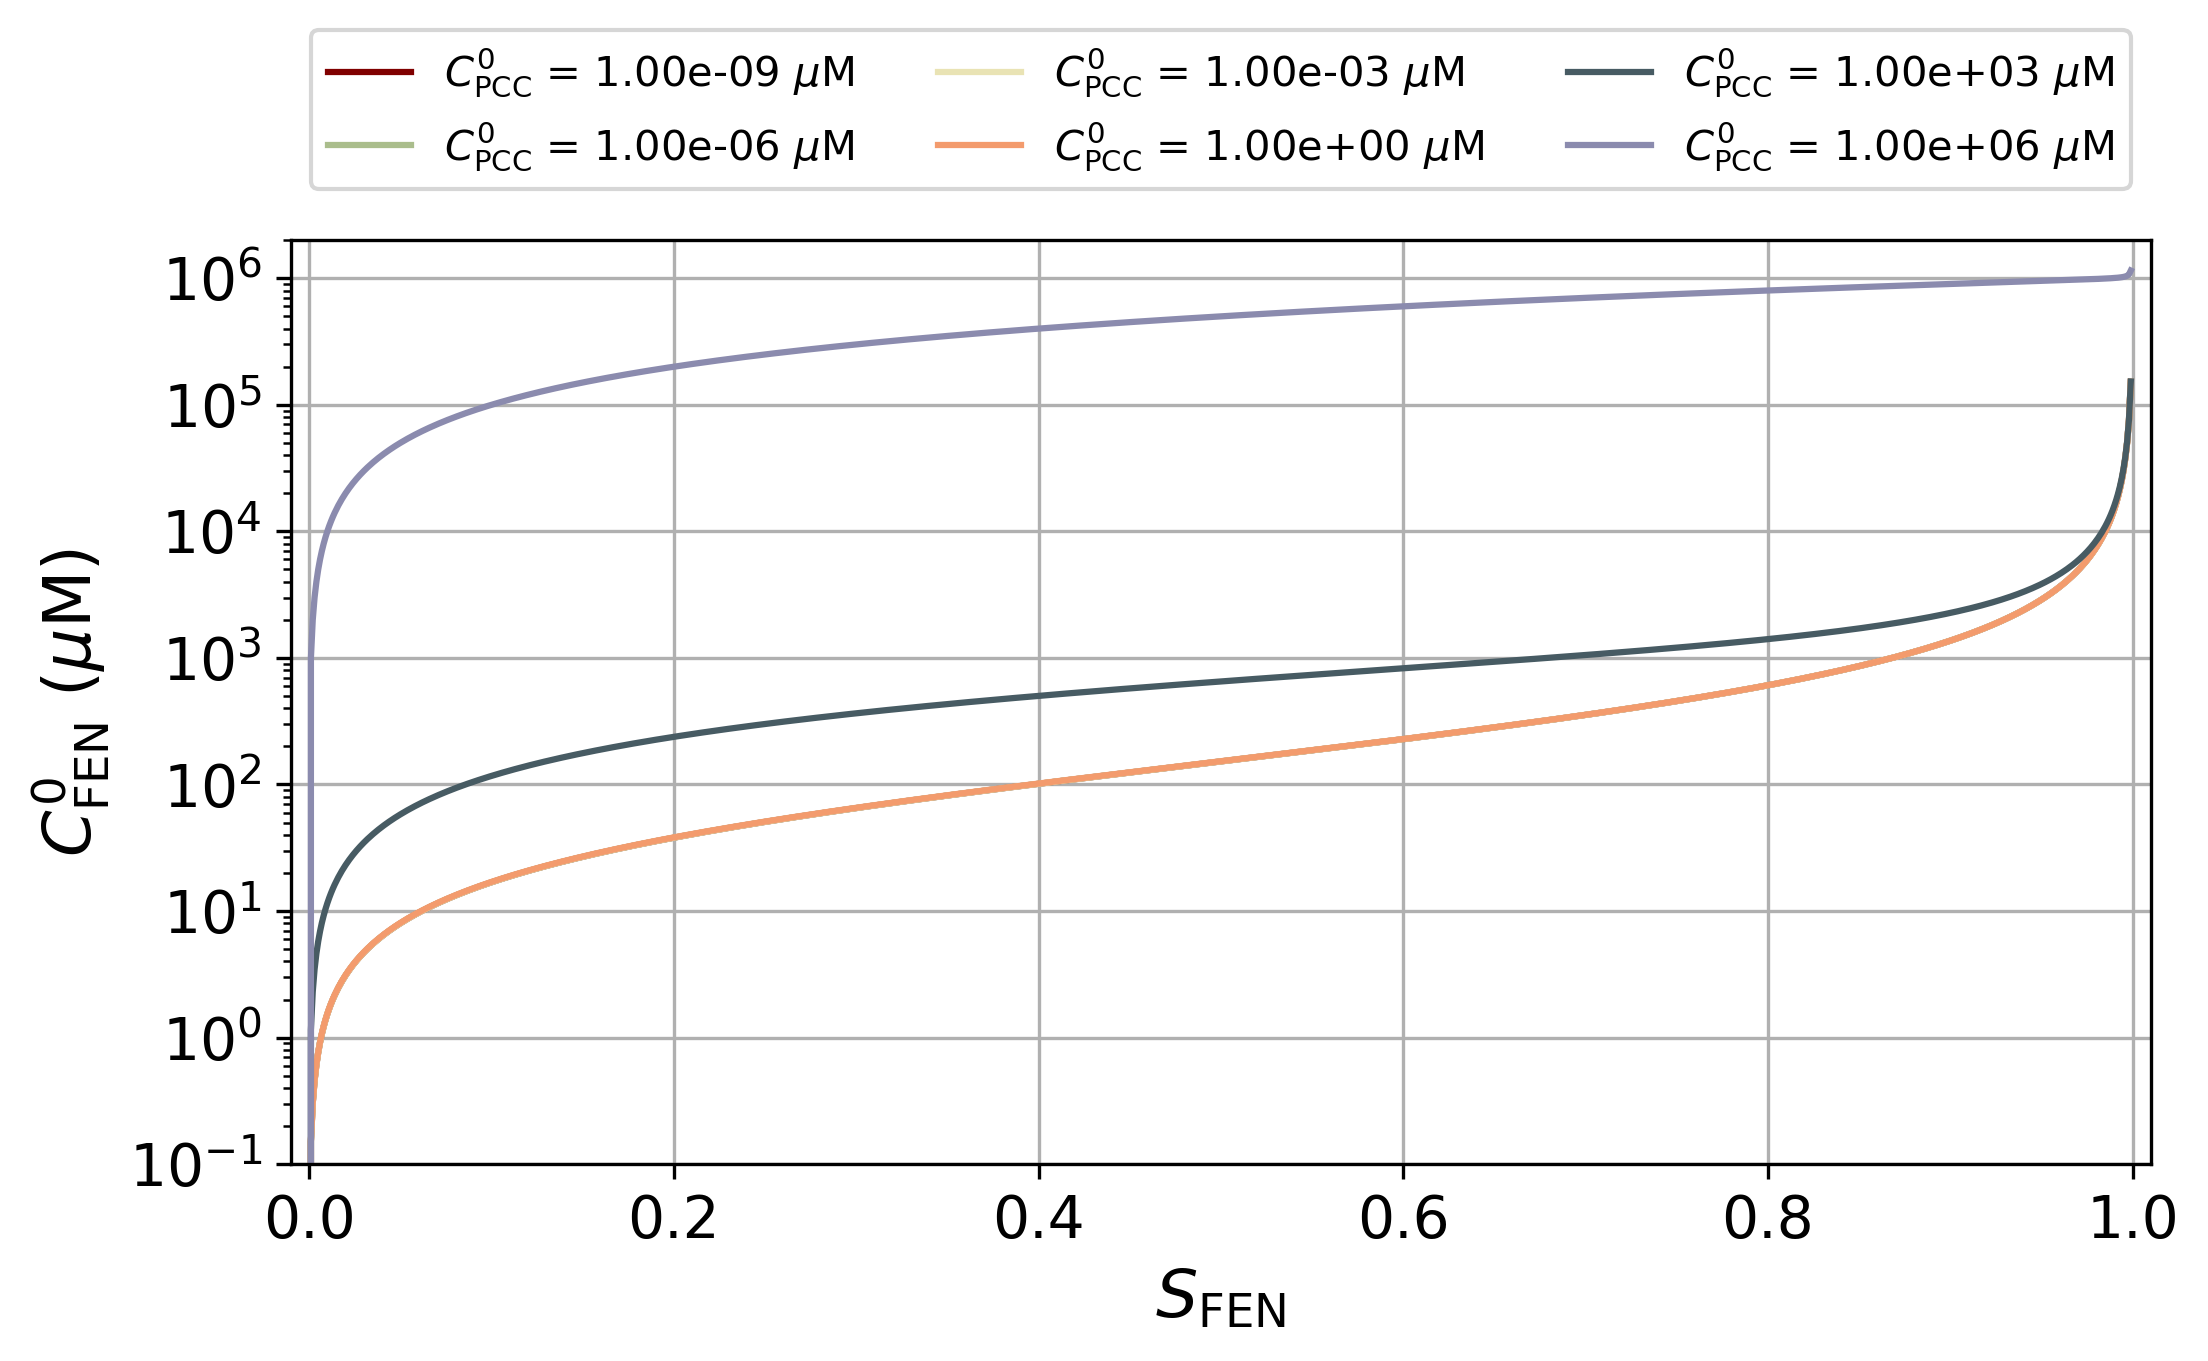

In [33]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 4))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
for i, data in enumerate(res.items()):
    C, vals = data
    ax.plot(S_range, vals, label=(r"$C^0_{\text{PCC}}$" + fr" = {C:.2e} $\mu$M"), c=colors[i])
ax.set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
ax.set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(0.1, 2e6)
ax.tick_params(axis="both", labelsize=14)
ax.grid(which="Major")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

# Acetaminophen Detection

In [17]:
Kd_A = np.longdouble(1008) #muM
S_lim = np.longdouble(0.5)
C0_P = np.longdouble(1) #muM

In [20]:
C_PA = S_lim*C0_P
C_P = C0_P - C_PA
C_A = Kd_A*C_PA/C_P
C0_A = C_PA + C_A
print(f"C_A = {C_A:.3e}")
print(f"C0_A = {C0_A:.3e}")
print(f"C_P = {C_P:.3e}")
print(f"C_PA = {C_PA:.3e}")

C_A = 1.008e+03
C0_A = 1.008e+03
C_P = 5.000e-01
C_PA = 5.000e-01


# Fentanyl Detection in Presence of Acetaminophen

In [62]:
Kd_F = np.longdouble(152) #muM
Kd_A = np.longdouble(1008) #muM
S_lim = np.longdouble(0.5) #S_F
C0_P = np.longdouble(1) #muM
C0_A = np.longdouble(1e6) #muM

In [63]:
C_PF = S_lim*C0_P
C_PA_fun = lambda x: (Kd_A*x)/(C0_A-x) + x - C0_P*(1-S_lim)
sol = root_scalar(C_PA_fun, x0 = C0_A/2)
C_PA = sol.root
C_A = C0_A - C_PA
C_P = C0_P - C_PF - C_PA
C_F = Kd_F*C_PF/C_P
C0_F = C_PF + C_F
S_A = C_PA/C0_P
print(f"C_F = {C_F:.3e}")
print(f"C0_F = {C0_F:.3e}")
print(f"C_A = {C_A:.3e}")
print(f"C_P = {C_P:.3e}")
print(f"C_PF = {C_PF:.3e}")
print(f"C_PA = {C_PA:.3e}")
print(f"S_A = {S_A:.3f}")
print(f"S_A + S_F = {S_A + S_lim:.3f}")

C_F = 1.509e+05
C0_F = 1.509e+05
C_A = 1.000e+06
C_P = 5.035e-04
C_PF = 5.000e-01
C_PA = 4.995e-01
S_A = 0.499
S_A + S_F = 0.999


In [188]:
S_range = np.arange(0.0, 1, 0.01, dtype=np.longdouble)
C0_A_range = np.asarray([1e-3, 1, 1e3], dtype=np.longdouble)#np.logspace(-6, 1, 8) #muM
C0_P_range = np.asarray([1e-3, 1, 1e3], dtype=np.longdouble)

resP = {}
for C0_P in C0_P_range:
    resA = {}
    for C0_A in C0_A_range:
        C0_F_vals = np.zeros((len(S_range), ))
        S_A_vals = np.zeros((len(S_range), ))
        for i, S in enumerate(S_range):
            C_PF = S*C0_P
            C_PA_fun = lambda x: (Kd_A*x)/(C0_A-x) + x - C0_P*(1-S)
            sol = root_scalar(C_PA_fun, x0 = C0_P/2, xtol=1e-15)
            C_PA = sol.root
            C_P = C0_P - C_PF - C_PA
            C_F = Kd_F*C_PF/C_P
            C0_F_vals[i] = C_PF + C_F
            S_A_vals[i] = C_PA/C0_P
        resA[C0_A] = (C0_F_vals, S_A_vals)
    resP[C0_P] = resA

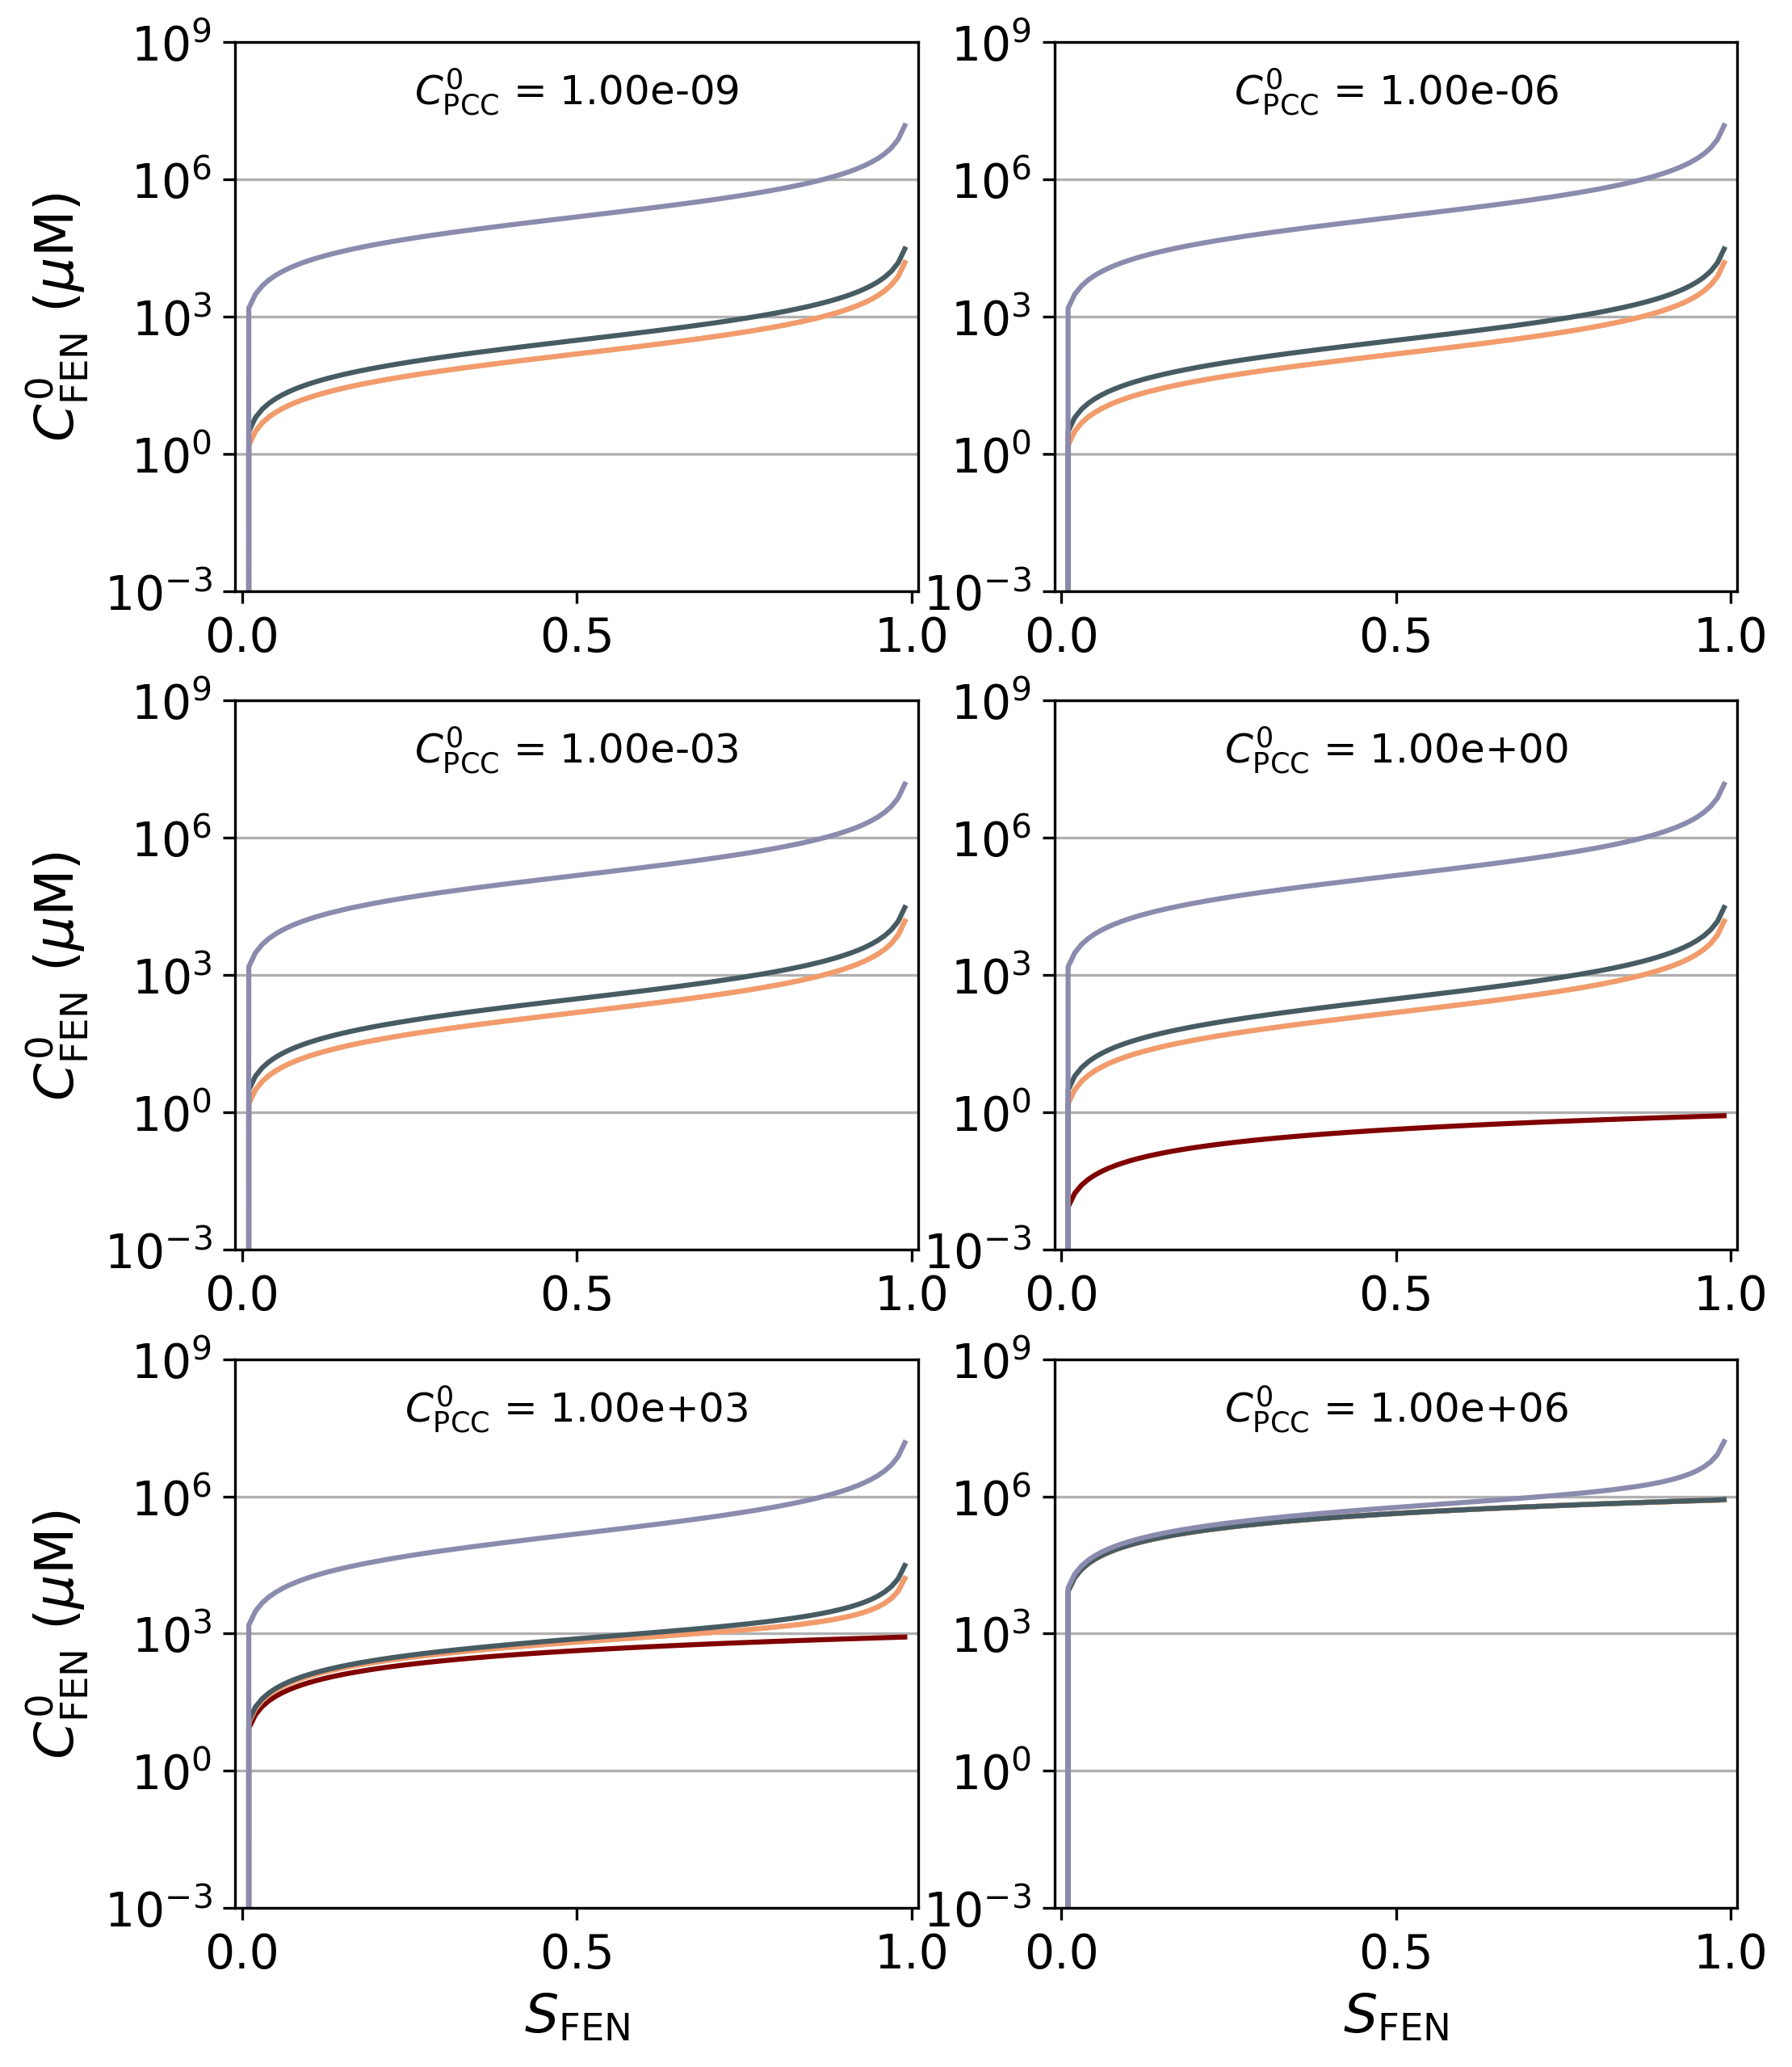

In [69]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(8, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

for i, dataP in enumerate(resP.items()):
    C0_P, resA = dataP
    for j, dataA in enumerate(resA.items()):
        C0_A, (valsC, valsS) = dataA
        axs[i].grid(True, axis="y")
        axs[i].plot(S_range, valsC, c=colors[j])
        axs[i].set_yscale("log")
        axs[i].set_xlim(-0.01, 1.01)
        axs[i].set_ylim(1e-3, 1e9)
        axs[i].tick_params(axis="both", labelsize=14)
        axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

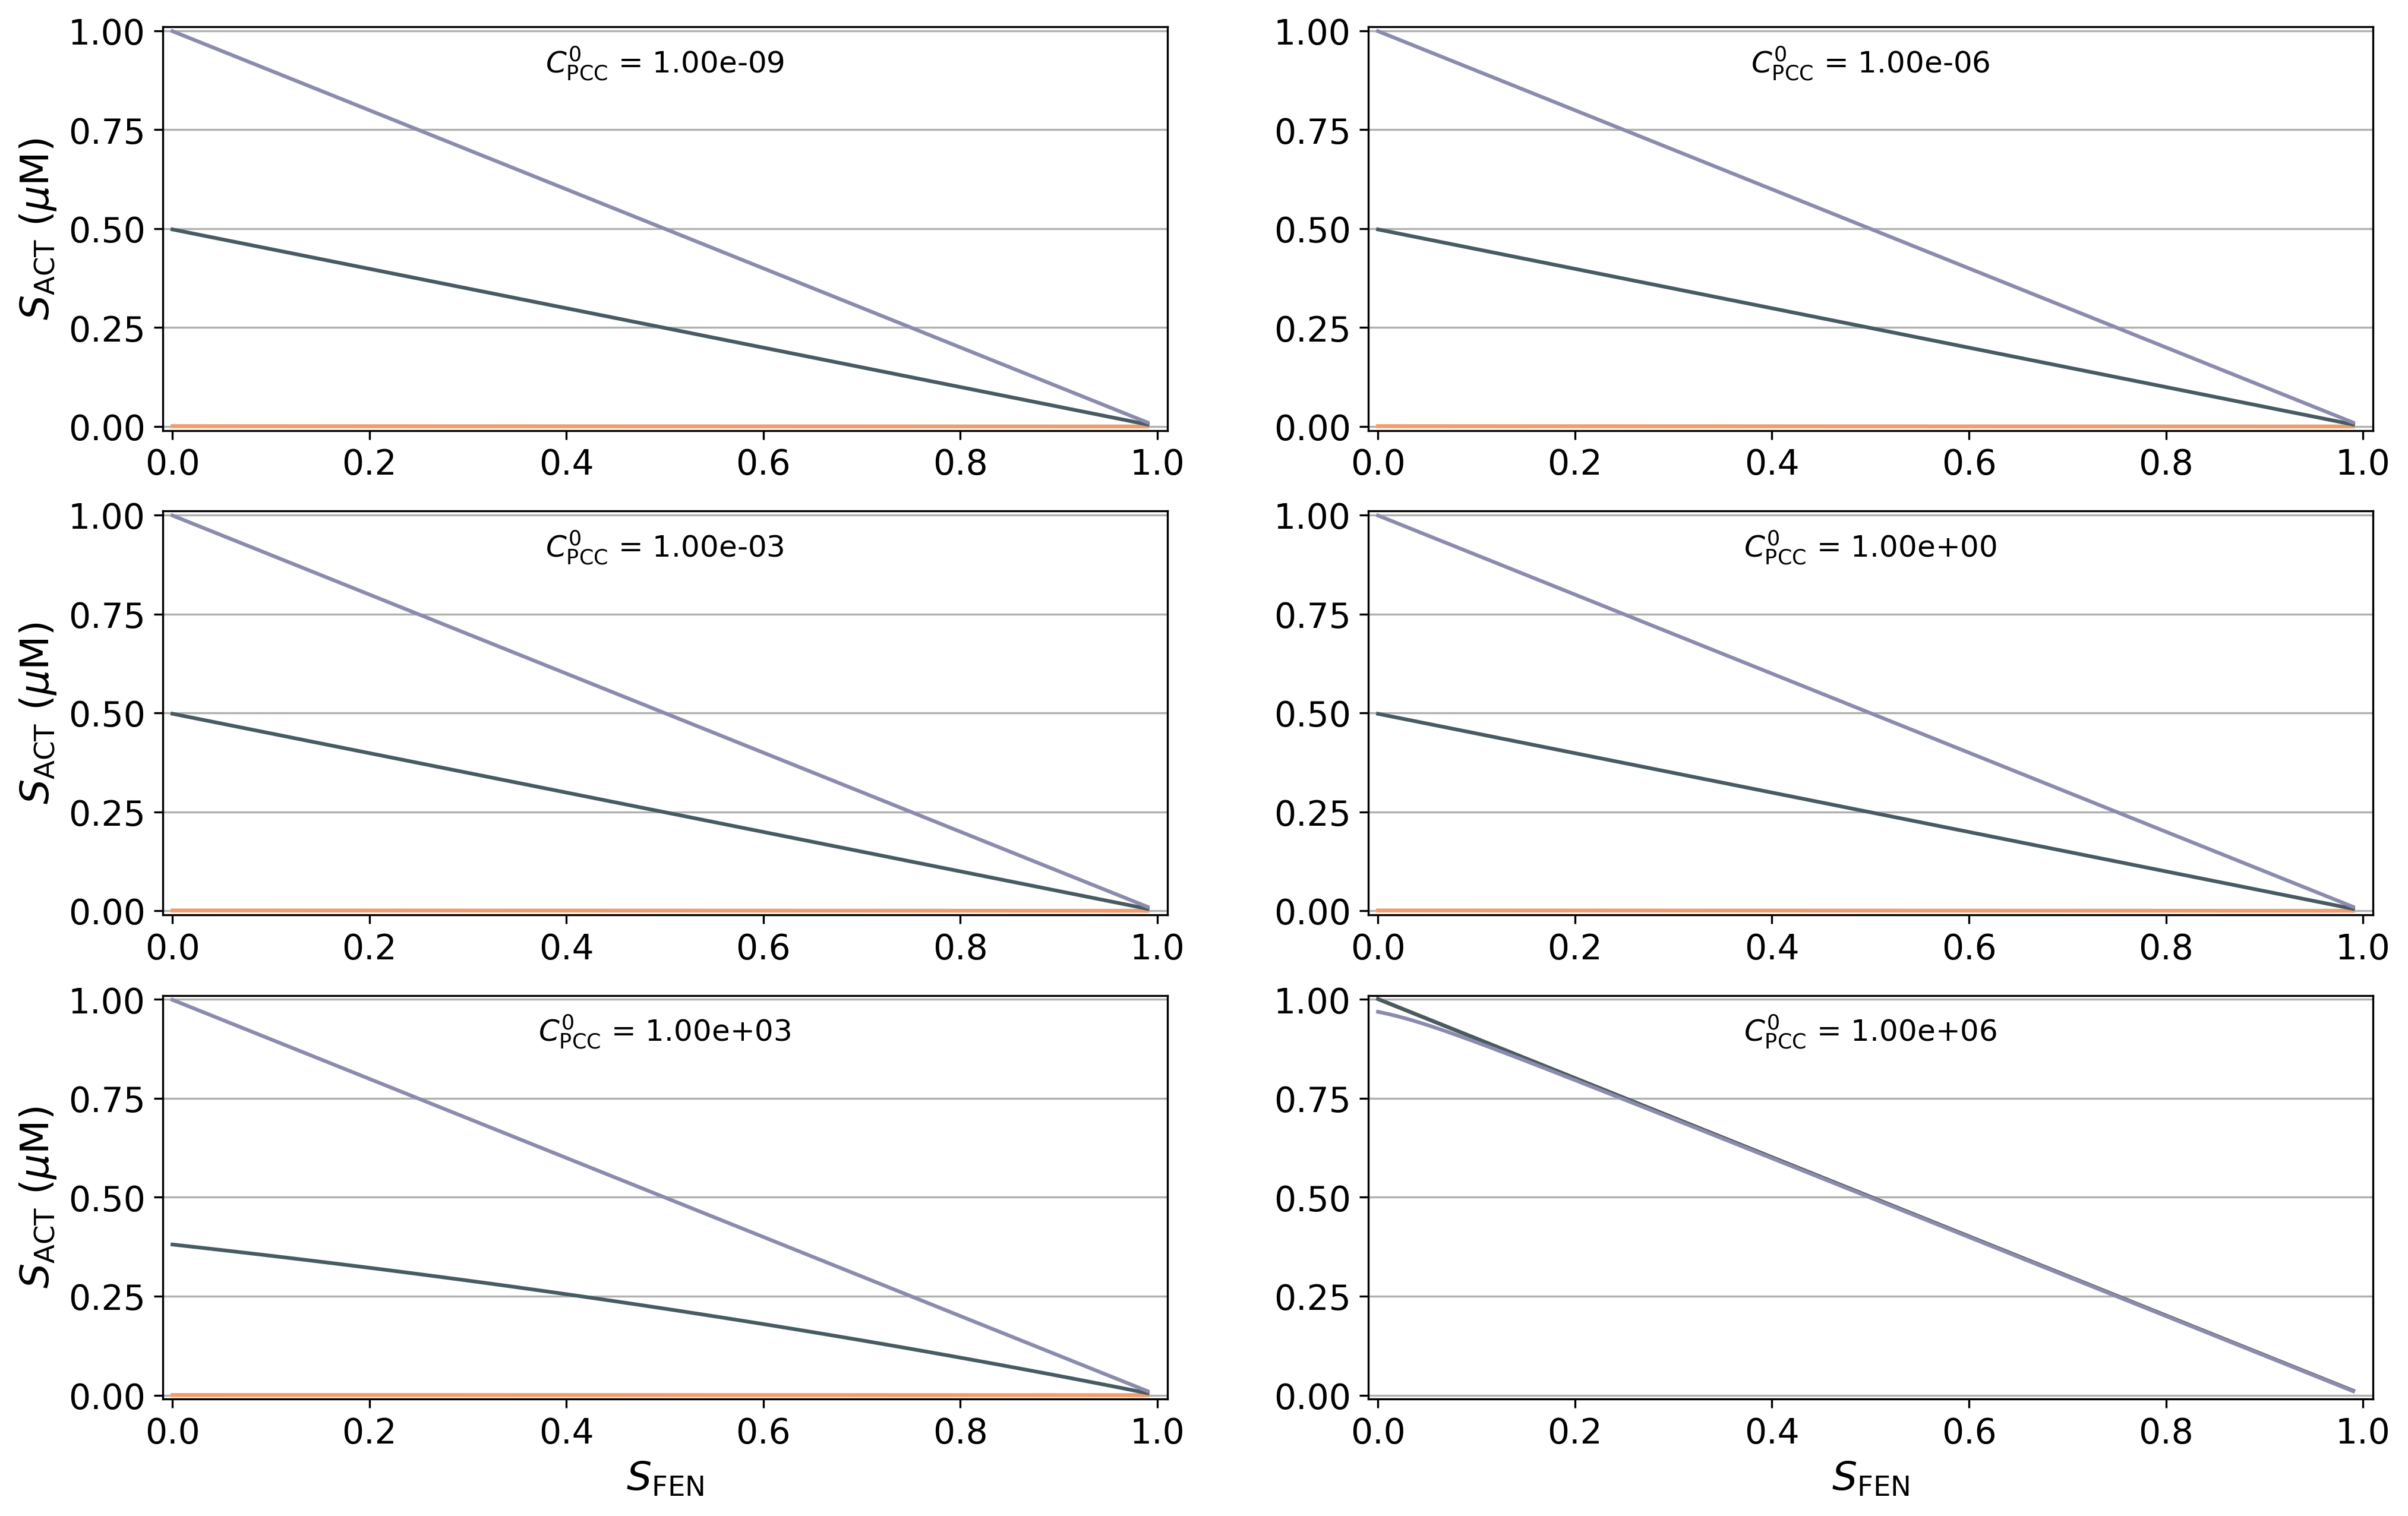

In [79]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(16, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

for i, dataP in enumerate(resP.items()):
    C0_P, resA = dataP
    for j, dataA in enumerate(resA.items()):
        C0_A, (valsC, valsS) = dataA
        axs[i].grid(True, axis="y")
        axs[i].plot(S_range, valsS, c=colors[j])
        axs[i].set_xlim(-0.01, 1.01)
        axs[i].set_ylim(-0.01, 1.01)
        axs[i].tick_params(axis="both", labelsize=14)
        axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

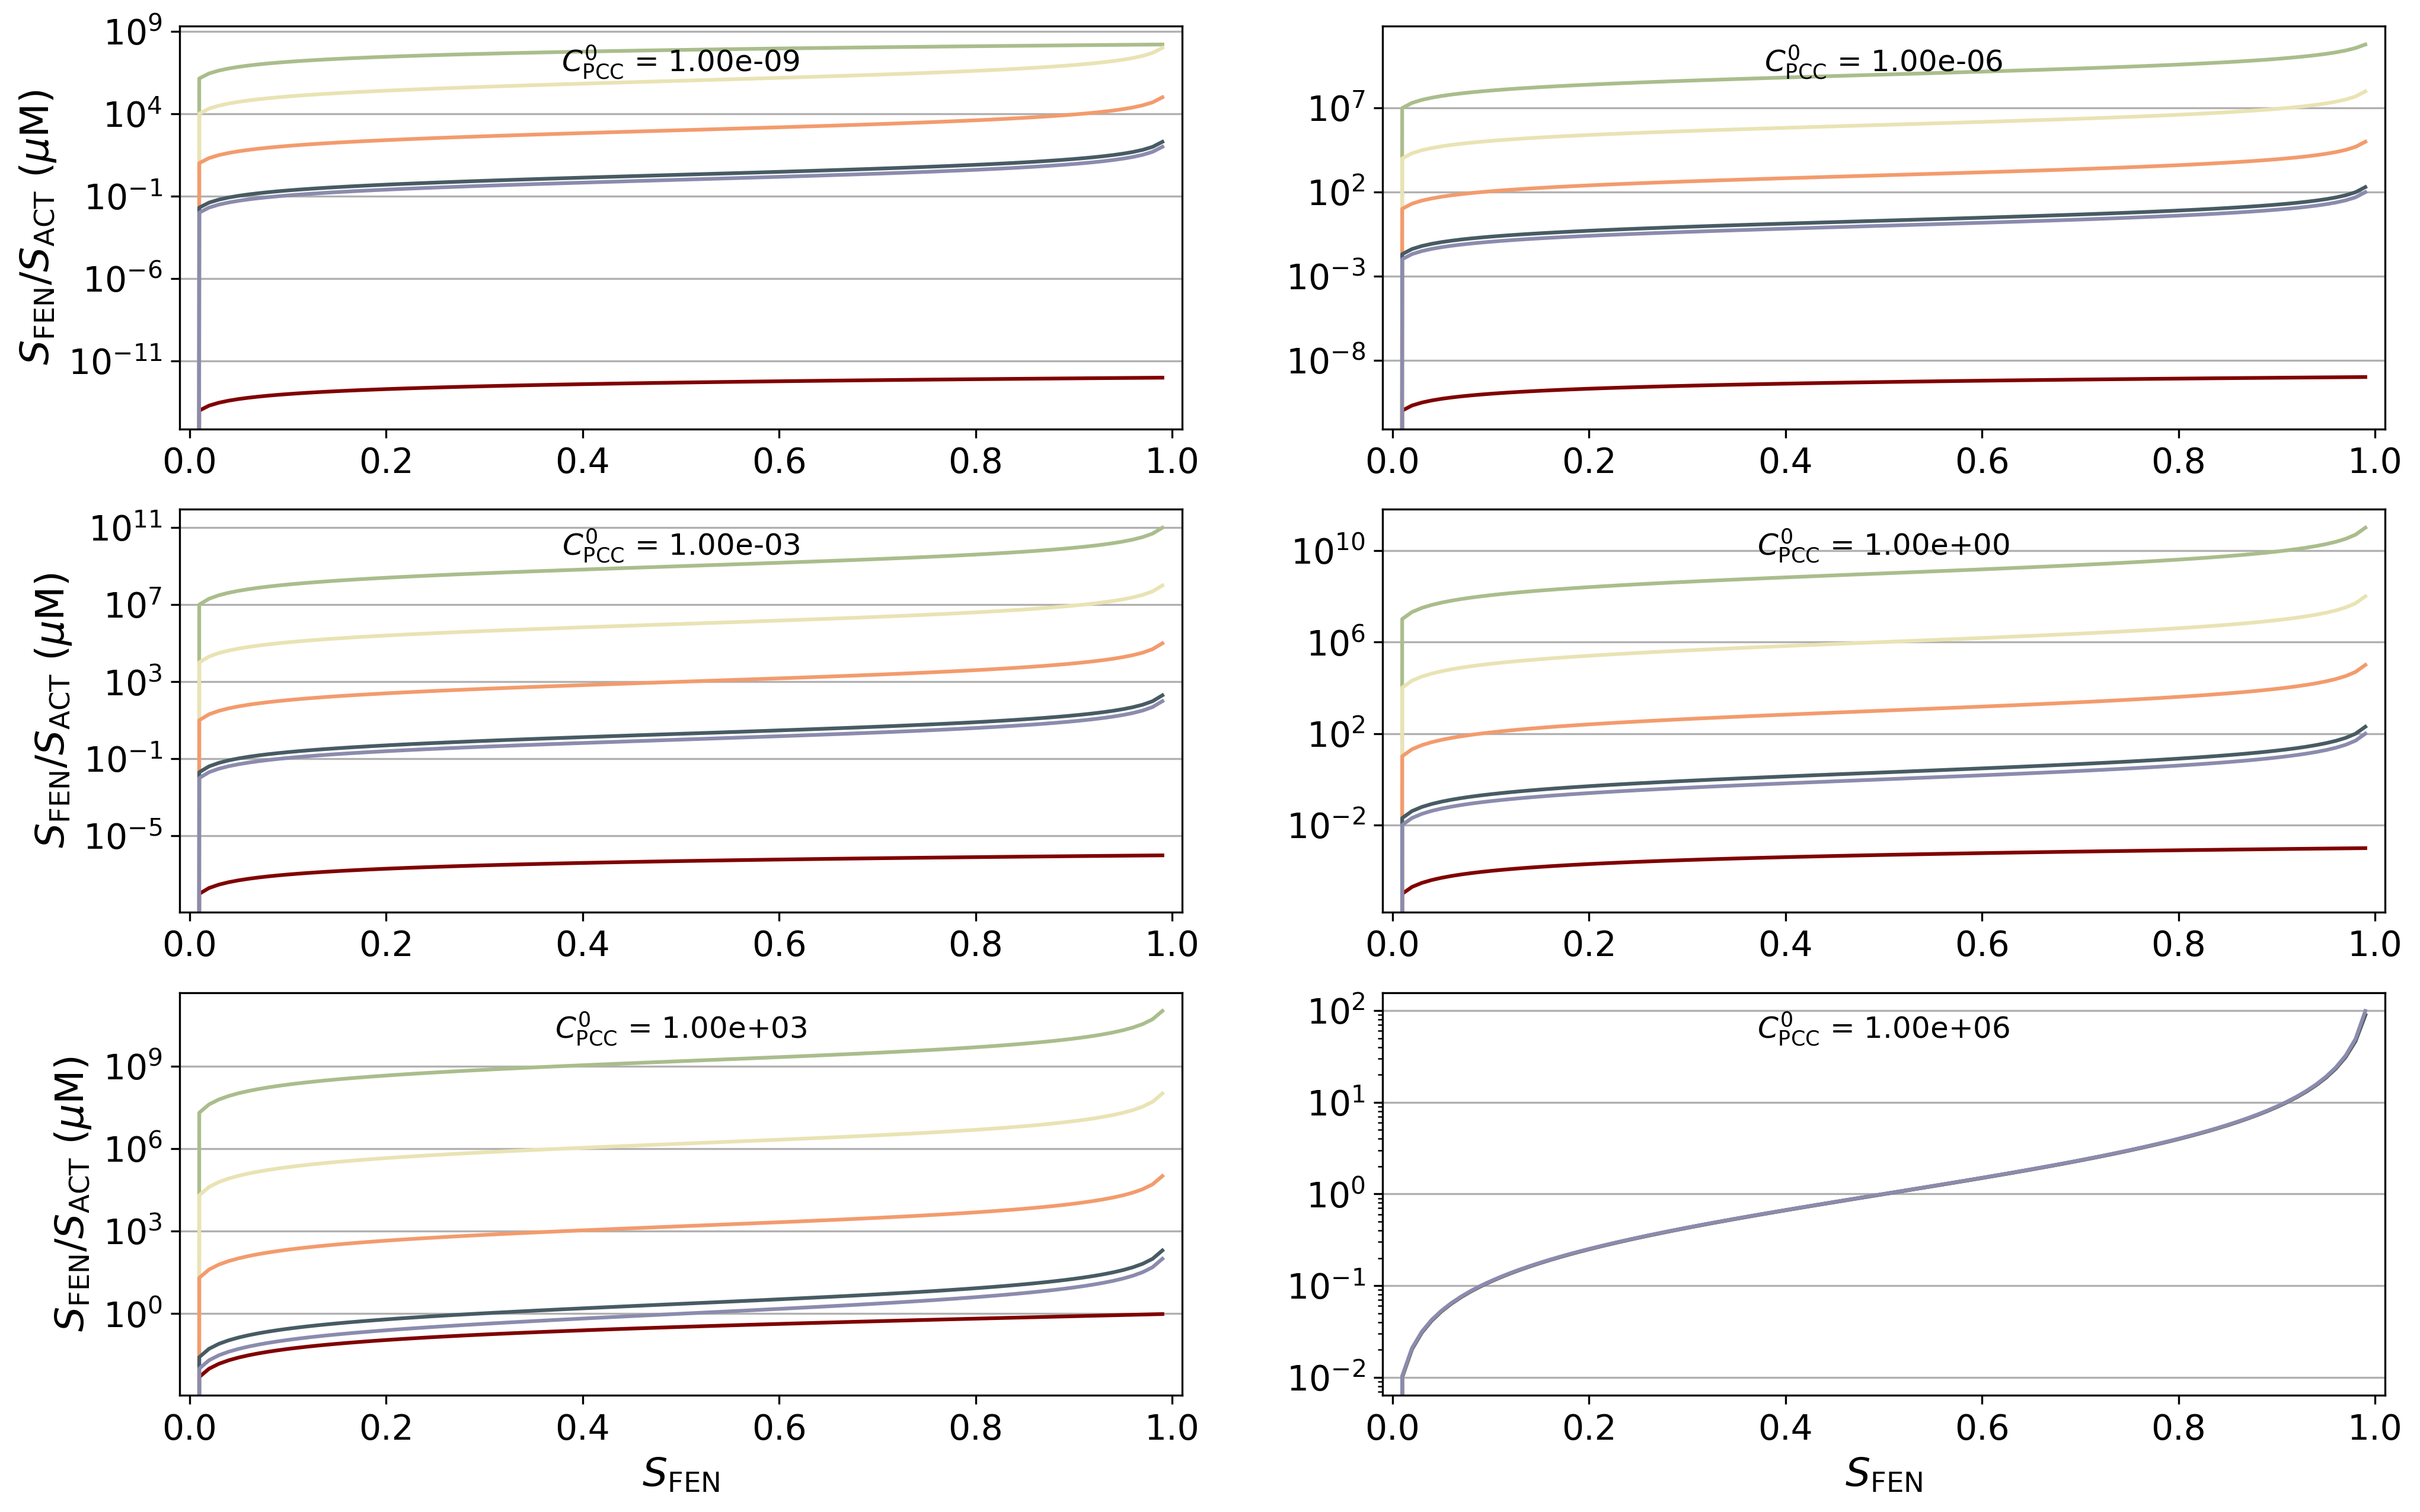

In [78]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(16, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

for i, dataP in enumerate(resP.items()):
    C0_P, resA = dataP
    for j, dataA in enumerate(resA.items()):
        C0_A, (valsC, valsS) = dataA
        axs[i].grid(True, axis="y")
        axs[i].plot(S_range, S_range/valsS, c=colors[j])
        axs[i].set_xlim(-0.01, 1.01)
        axs[i].set_yscale("log")
        #axs[i].set_ylim(-0.01, 1.01)
        axs[i].tick_params(axis="both", labelsize=14)
        axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$S_{\text{FEN}}/S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$S_{\text{FEN}}/S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$S_{\text{FEN}}/S_{\text{ACT}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

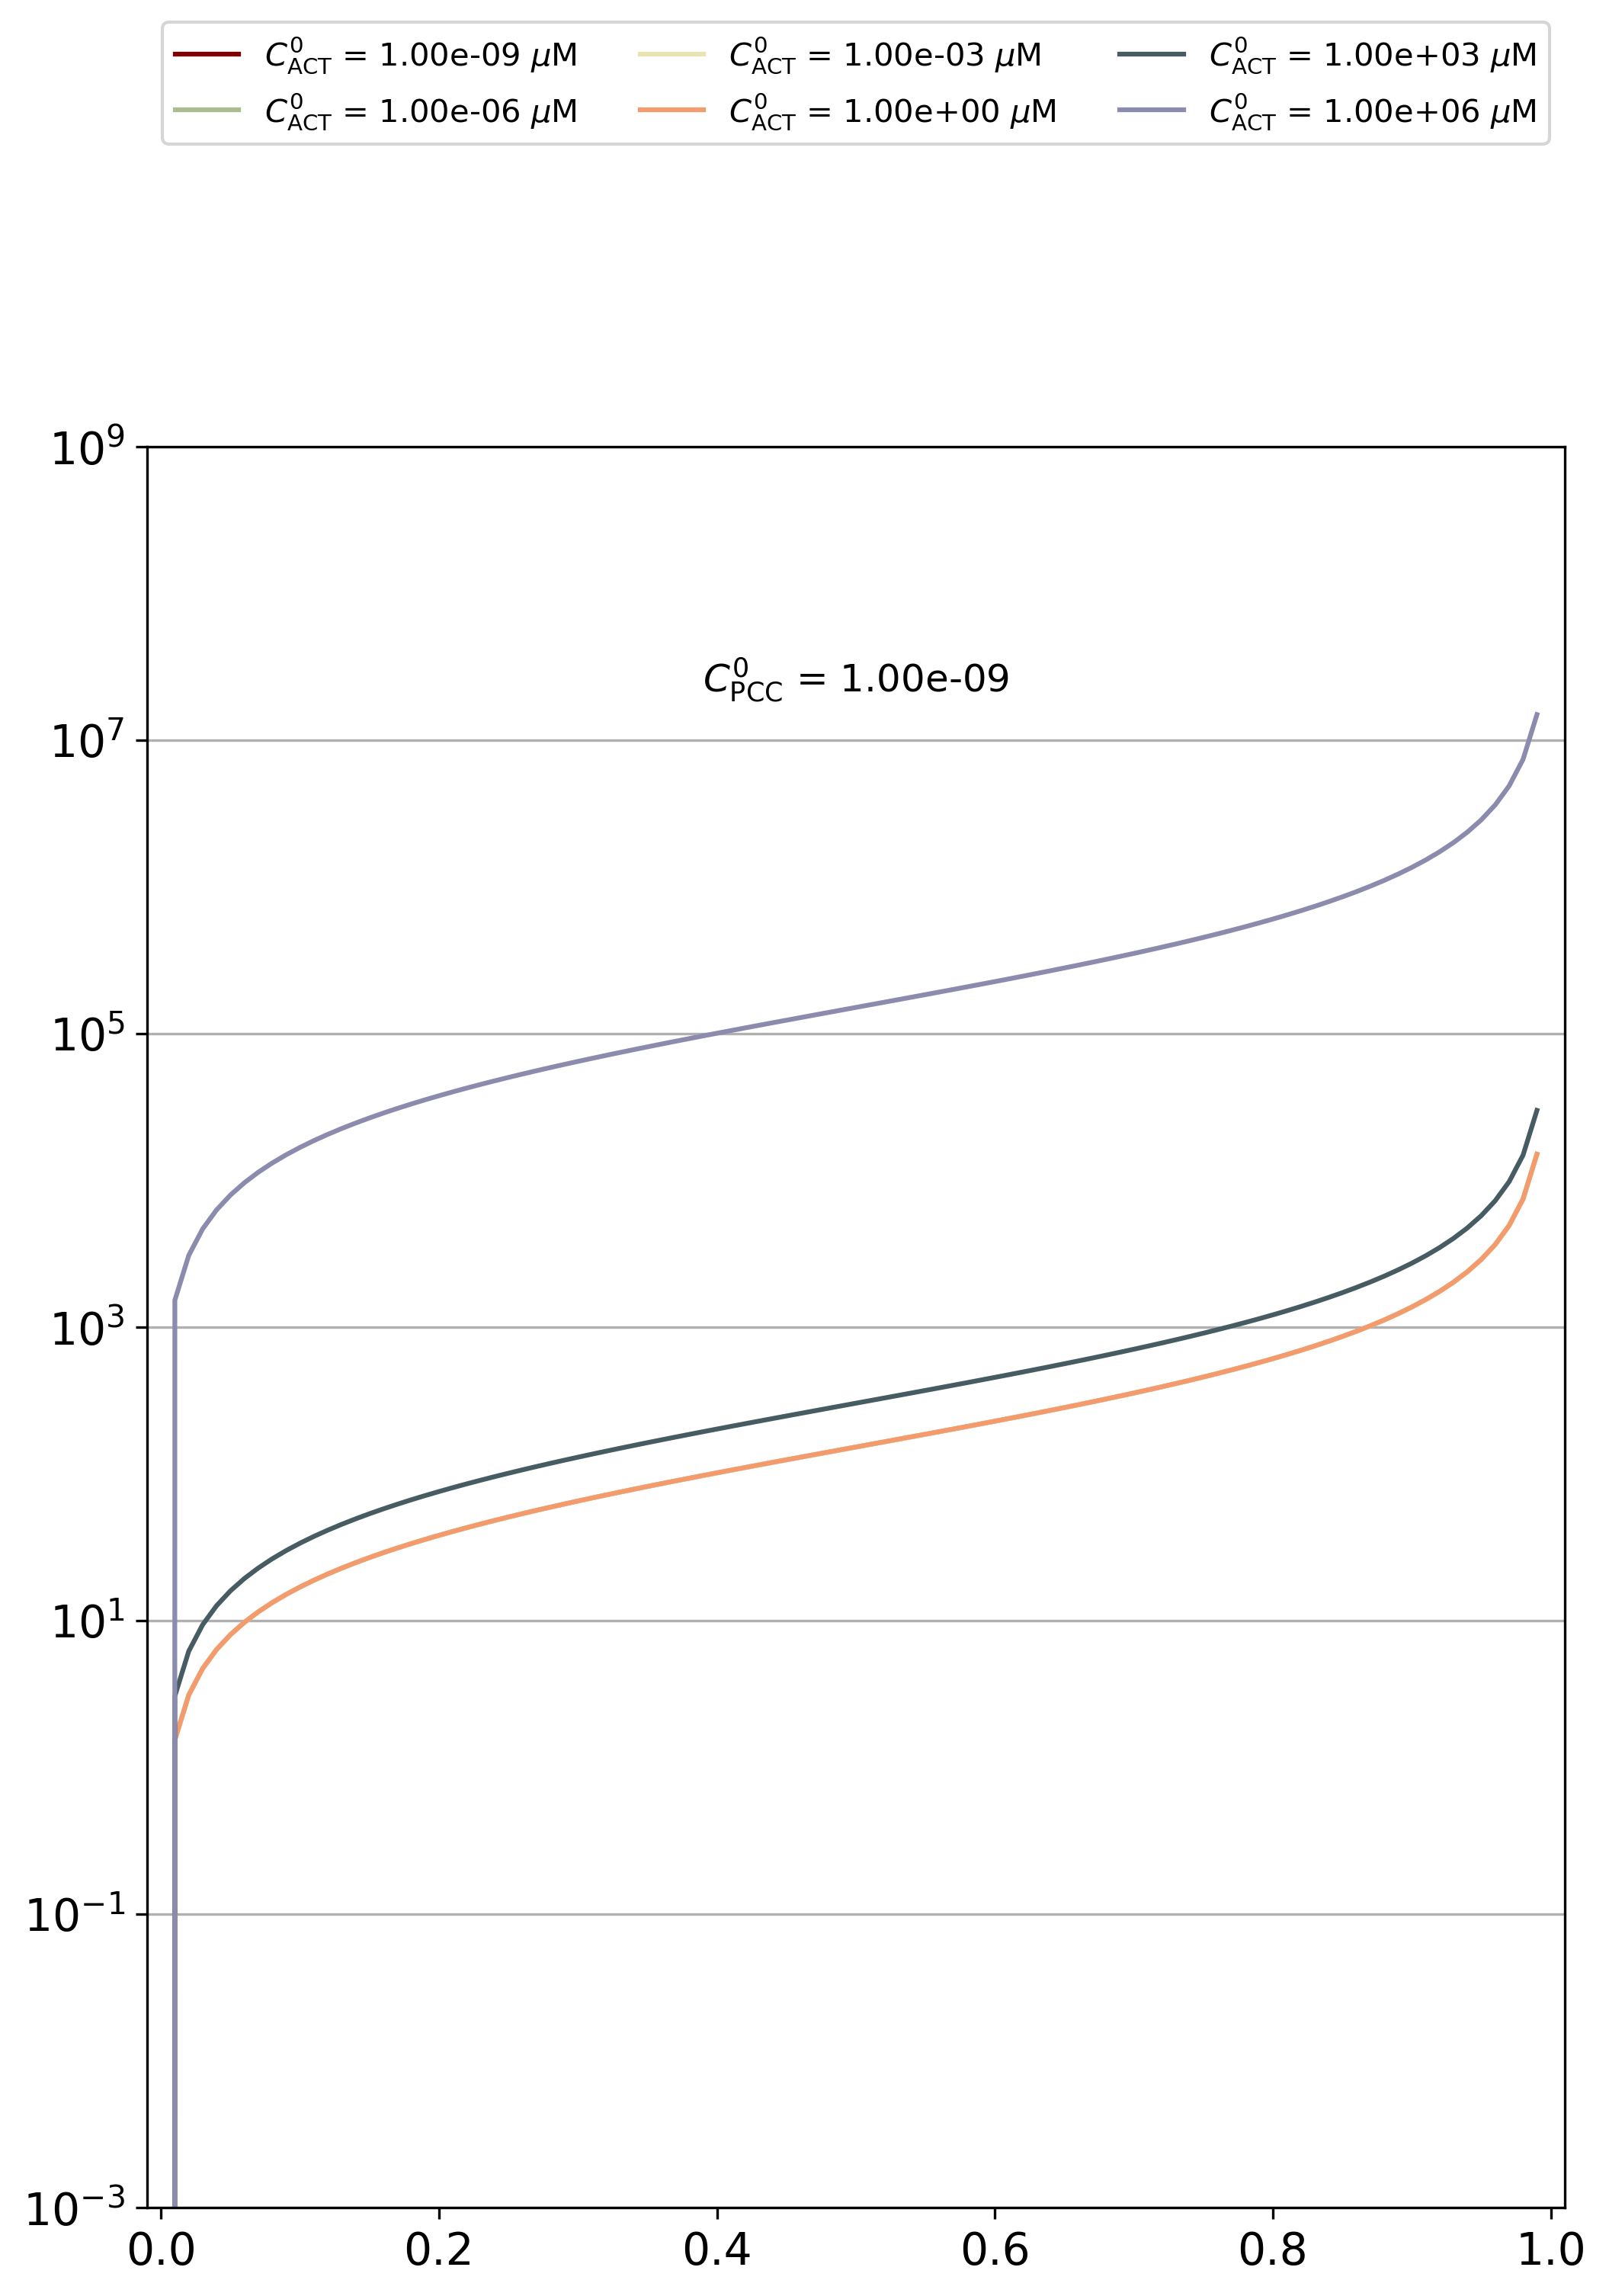

In [12]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']

for i, dataP in enumerate(resP.items()):
    C0_P, resA = dataP
    for j, dataA in enumerate(resA.items()):
        C0_A, vals = dataA
        ax.grid(True, axis="y")
        ax.plot(S_range, vals, c=colors[j], label=(r"$C^0_{\text{ACT}}$" + fr" = {C0_A:.2e} $\mu$M"))
        ax.set_yscale("log")
        ax.set_xlim(-0.01, 1.01)
        ax.set_ylim(1e-3, 1e9)
        ax.tick_params(axis="both", labelsize=14)
        ax.set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    break

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

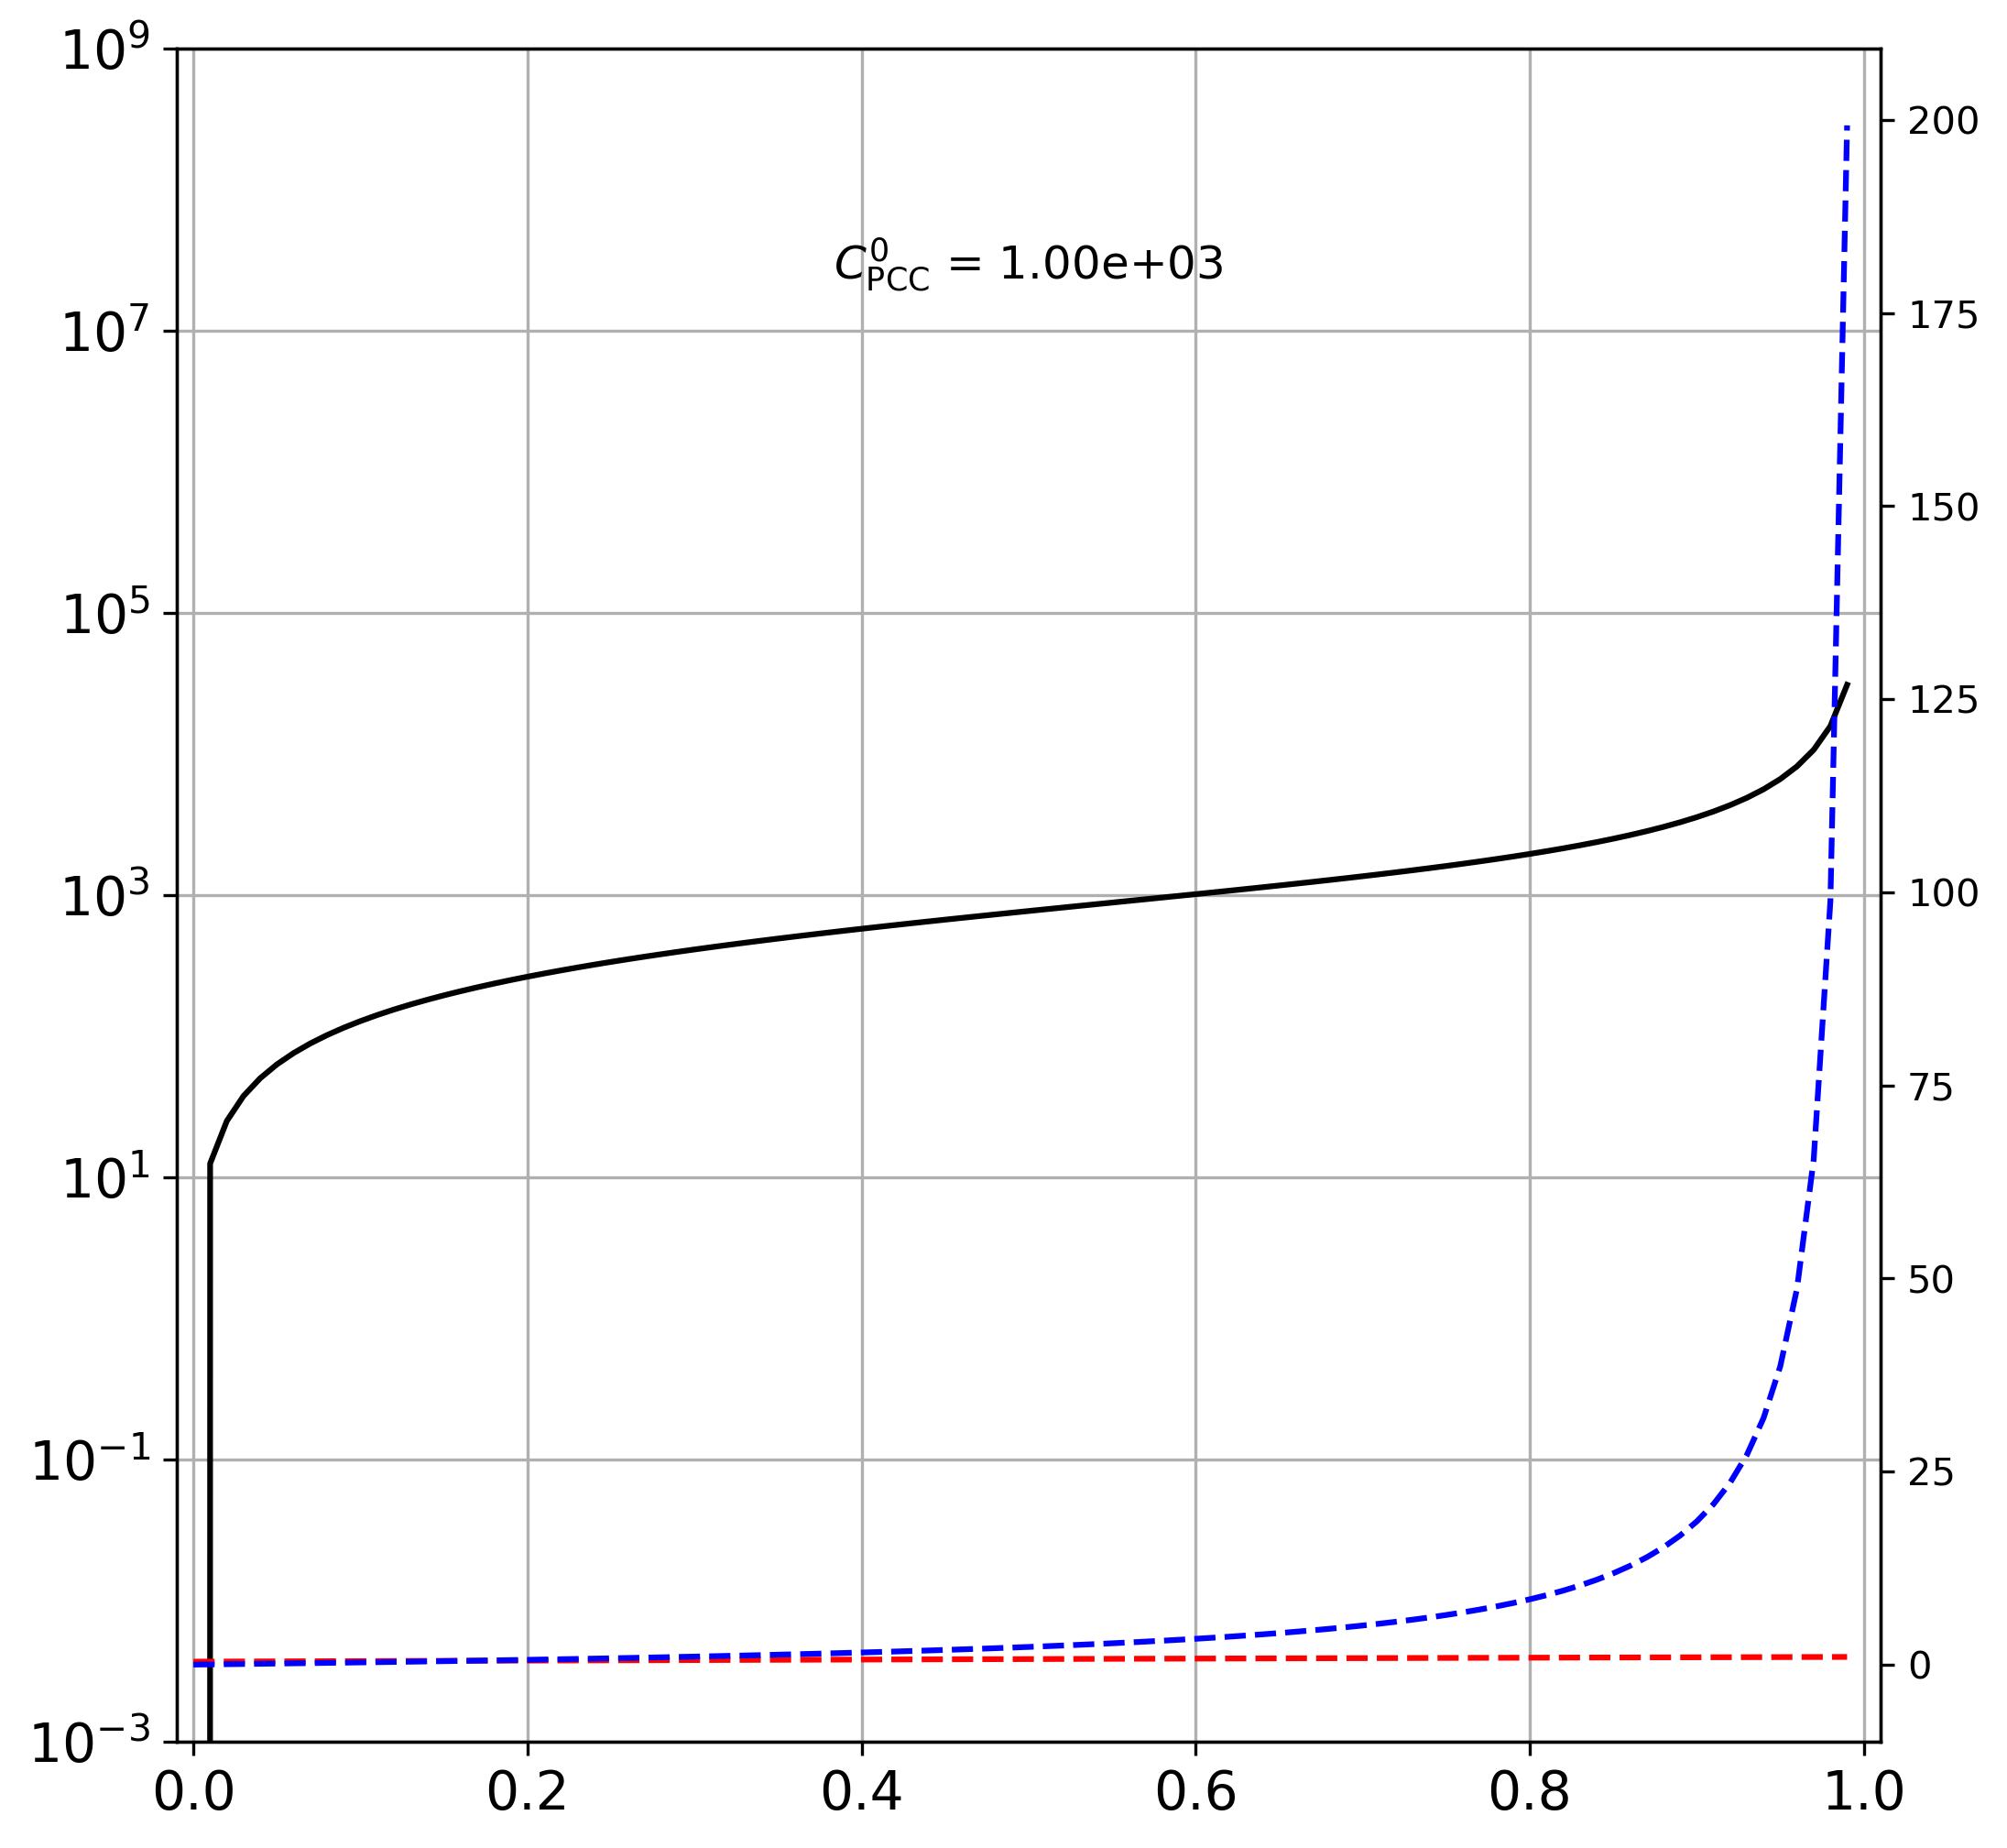

In [98]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 8))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']

dataP = resP[1e03]
dataA = dataP[1e03]
resA = dataP
valsC, valsS = dataA
ax.grid(True, axis="both")
ax.plot(S_range, valsC, c='k')
ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(1e-3, 1e9)
ax.tick_params(axis="both", labelsize=14)
ax.set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
ax2 = ax.twinx()
ax2.plot(S_range, valsS+S_range, 'r--')
ax2.plot(S_range, S_range/valsS, 'b--')

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

# Same thing but in terms of total bound

In [150]:
Kd_F = np.longdouble(152) #muM
Kd_A = np.longdouble(1008) #muM
S_lim = np.longdouble(0.5) #S_F+S_A
C0_P = np.longdouble(1) #muM
C0_A = np.longdouble(1) #muM

In [151]:
C_P = (1-S_lim)*C0_P
C_A = C0_A/(C_P/Kd_A + 1)
C_PA = C0_A - C_A
C_PF = C0_P - C_PA - C_P
C_F = Kd_F*C_PF/C_P
C0_F = C_F + C_PF
S_A = C_PA/C0_P
S_F = C_PF/C0_P
print(f"C_F = {C_F:.3e}")
print(f"C0_F = {C0_F:.3e}")
print(f"C_A = {C_A:.3e}")
print(f"C_P = {C_P:.3e}")
print(f"C_PF = {C_PF:.3e}")
print(f"C_PA = {C_PA:.3e}")
print(f"S_A = {S_A:.3f}")
print(f"S_F = {S_F:.3f}")

C_F = 1.518e+02
C0_F = 1.523e+02
C_A = 9.995e-01
C_P = 5.000e-01
C_PF = 4.995e-01
C_PA = 4.958e-04
S_A = 0.000
S_F = 0.500


In [120]:
S_range = np.arange(0.0, 1, 0.01, dtype=np.longdouble)
C0_A_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM

resP = {}
for C0_P in C0_P_range:
    resA = {}
    for C0_A in C0_A_range:
        C0_F_vals = np.zeros((len(S_range), ))
        S_A_vals = np.zeros((len(S_range), ))
        S_F_vals = np.zeros((len(S_range), ))
        for i, S in enumerate(S_range):
            C_P = (1-S)*C0_P
            C_A = C0_A/(C_P/Kd_A + 1)
            C_PA = C0_A - C_A
            C_PF = C0_P - C_PA - C_P
            C_F = Kd_F*C_PF/C_P
            C0_F_vals[i] = C_F + C_PF
            S_A_vals[i] = C_PA/C0_P
            S_F_vals[i] = C_PF/C0_P
        resA[C0_A] = (C0_F_vals, S_F_vals, S_A_vals)
    resP[C0_P] = resA

In [121]:
C0_P_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

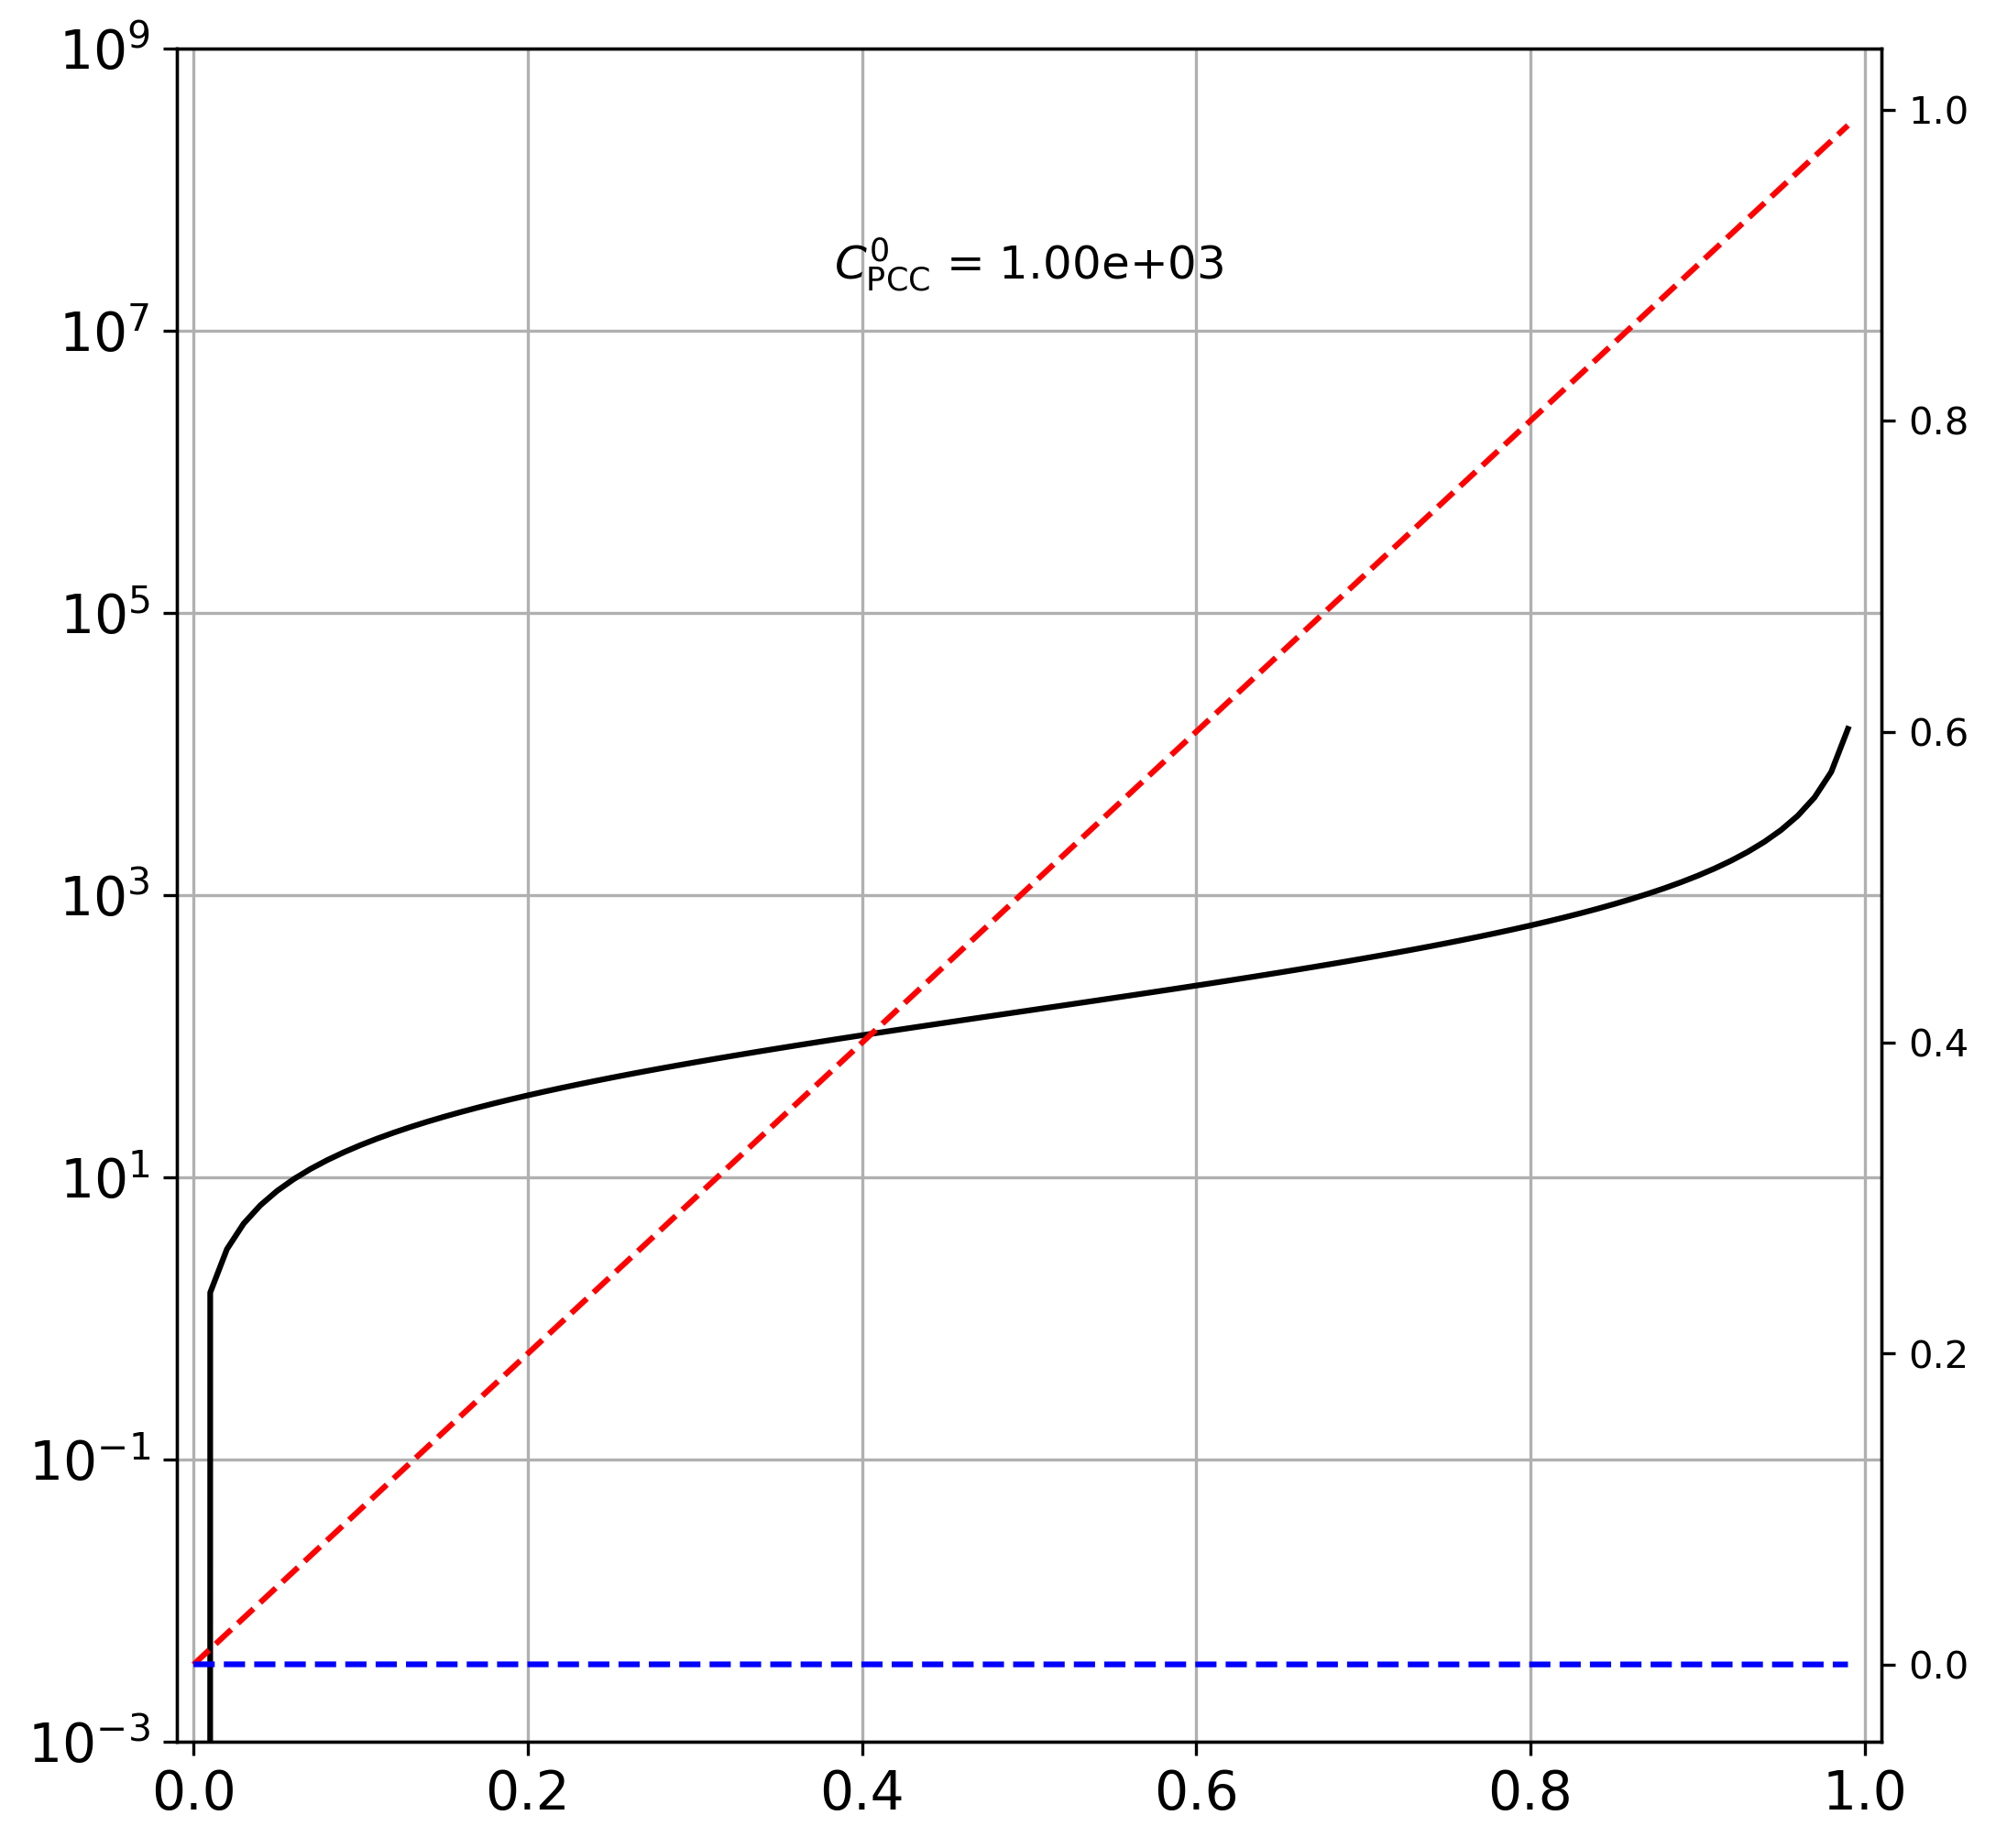

In [119]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 8))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']

dataP = resP[1e-1]
dataA = dataP[1e-1]
resA = dataP
valsC, valsSF, valsSA = dataA
ax.grid(True, axis="both")
ax.plot(S_range, valsC, c='k')
ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(1e-3, 1e9)
ax.tick_params(axis="both", labelsize=14)
ax.set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
ax2 = ax.twinx()
ax2.plot(S_range, valsSF, 'r--')
ax2.plot(S_range, valsSA, 'b--')
#ax2.plot(S_range, valsSF/valsSA, 'g-.')

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

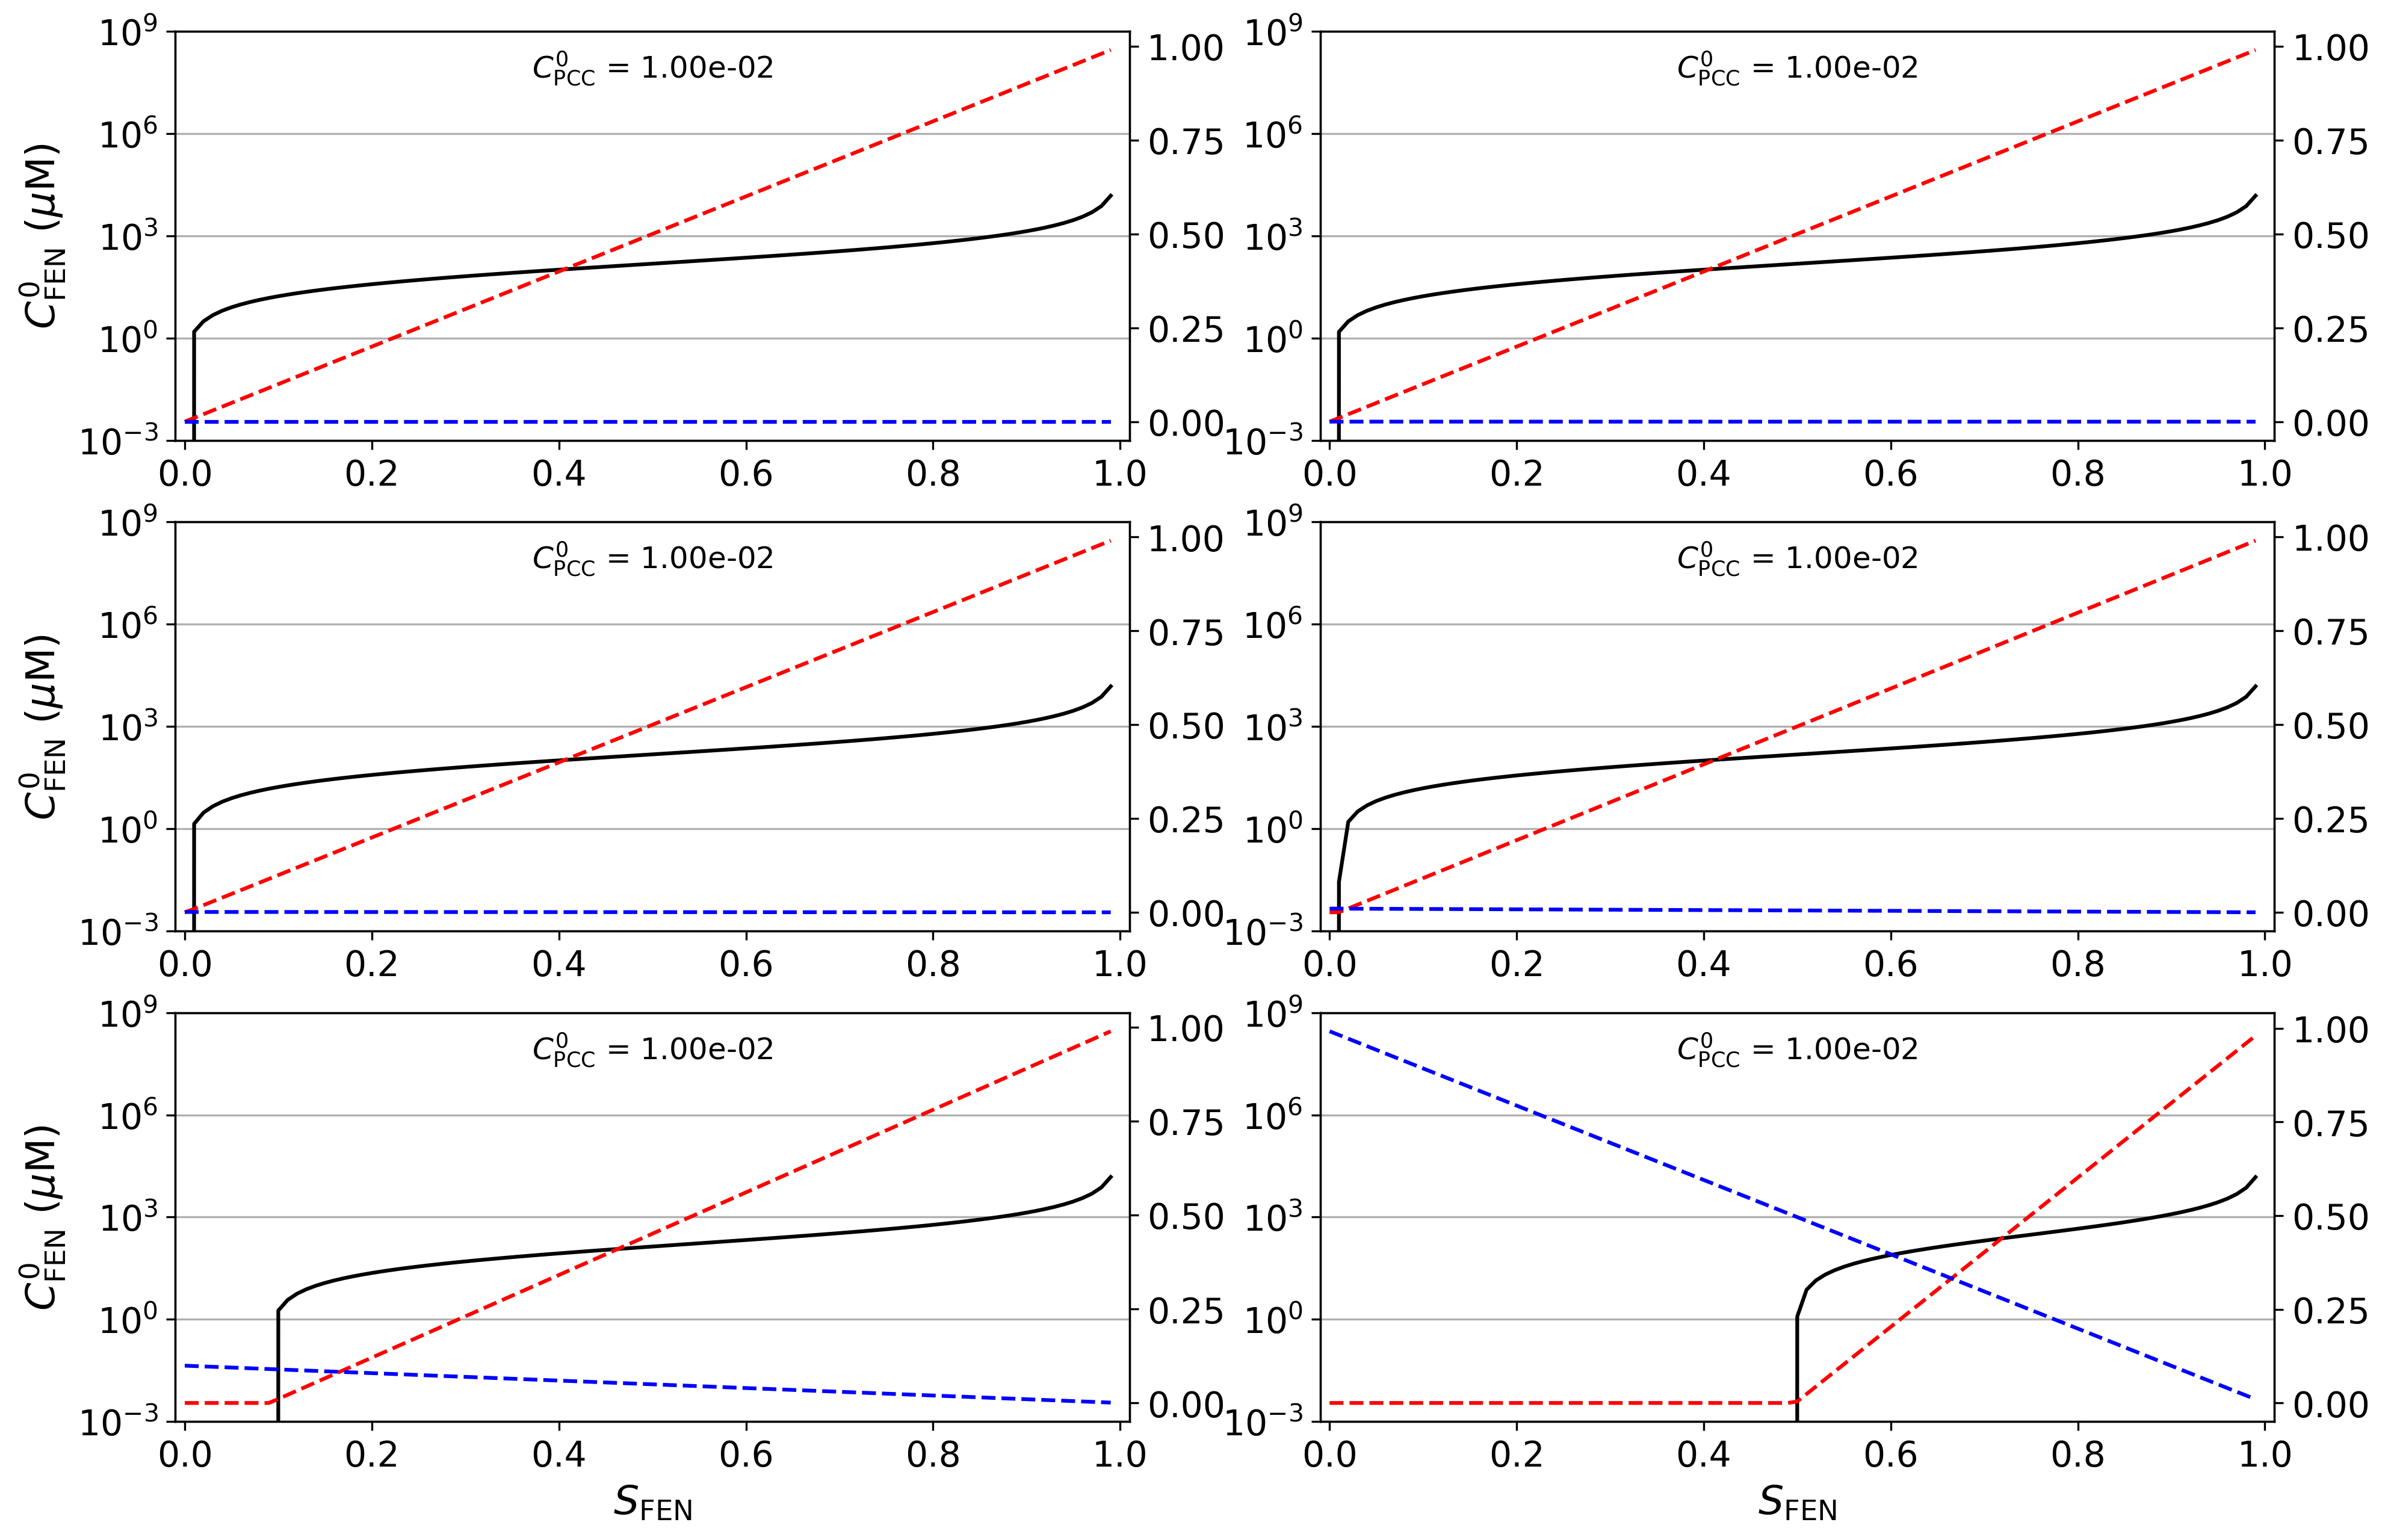

In [138]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e-2
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

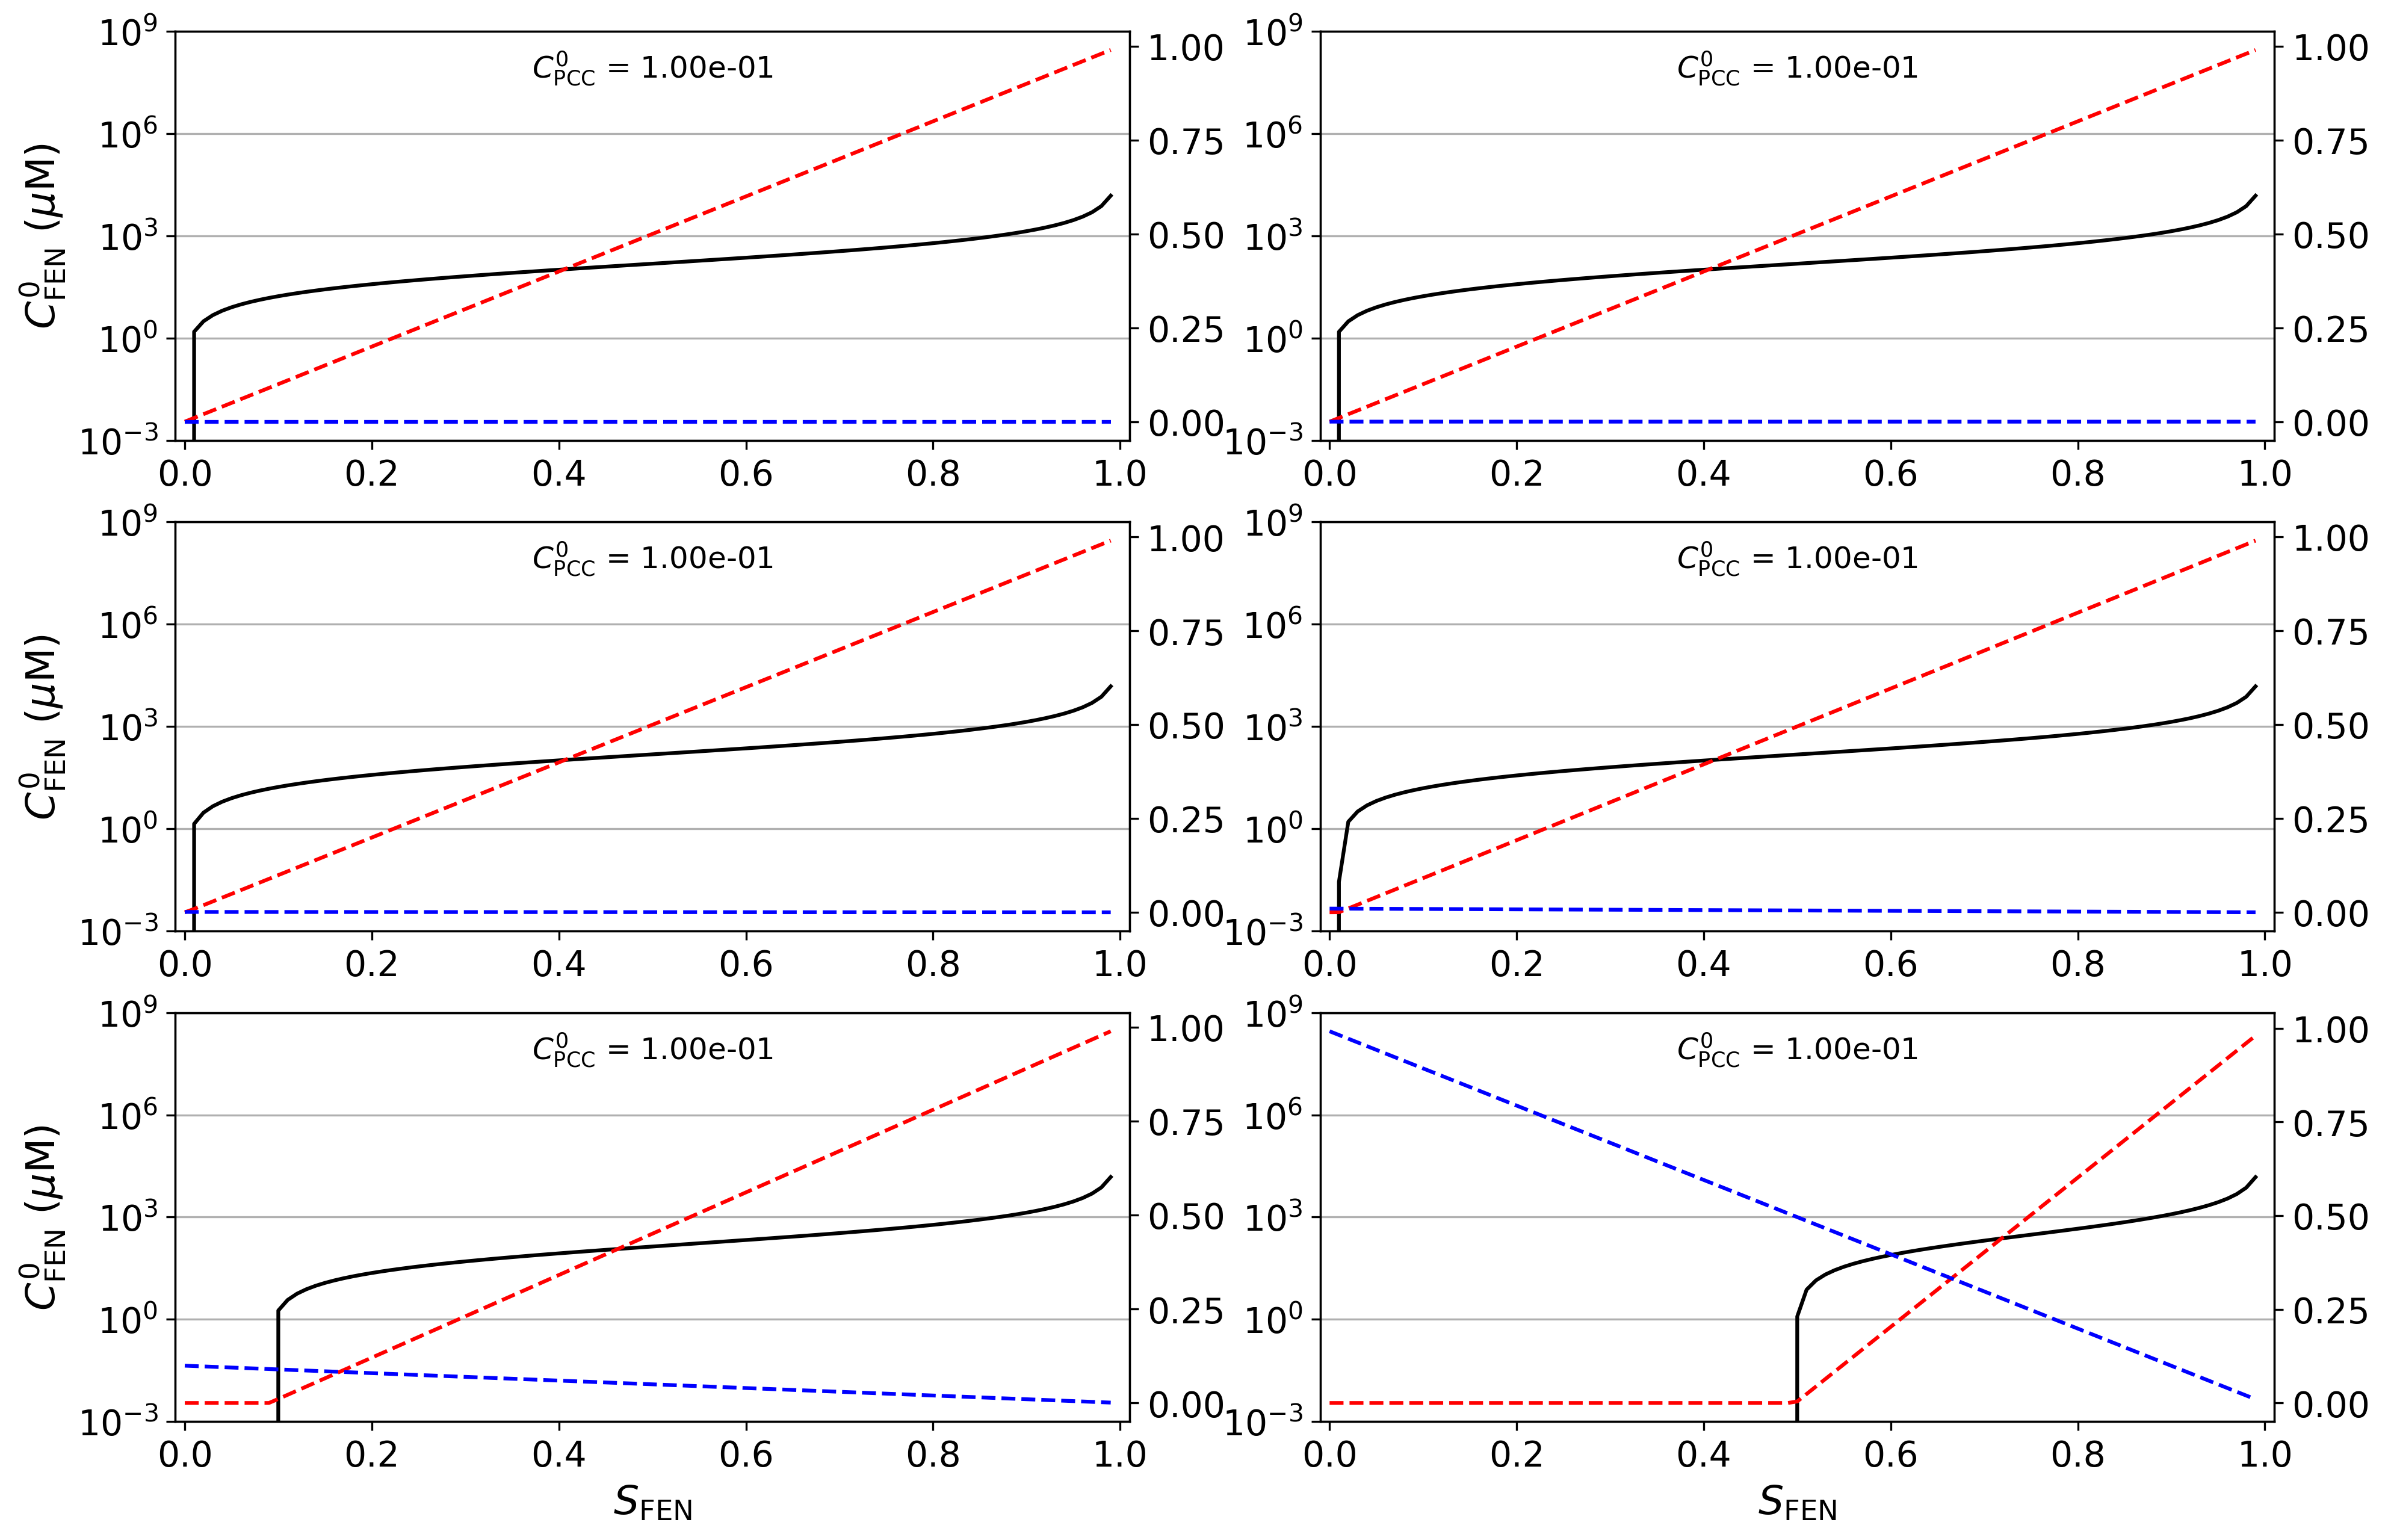

In [139]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e-1
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

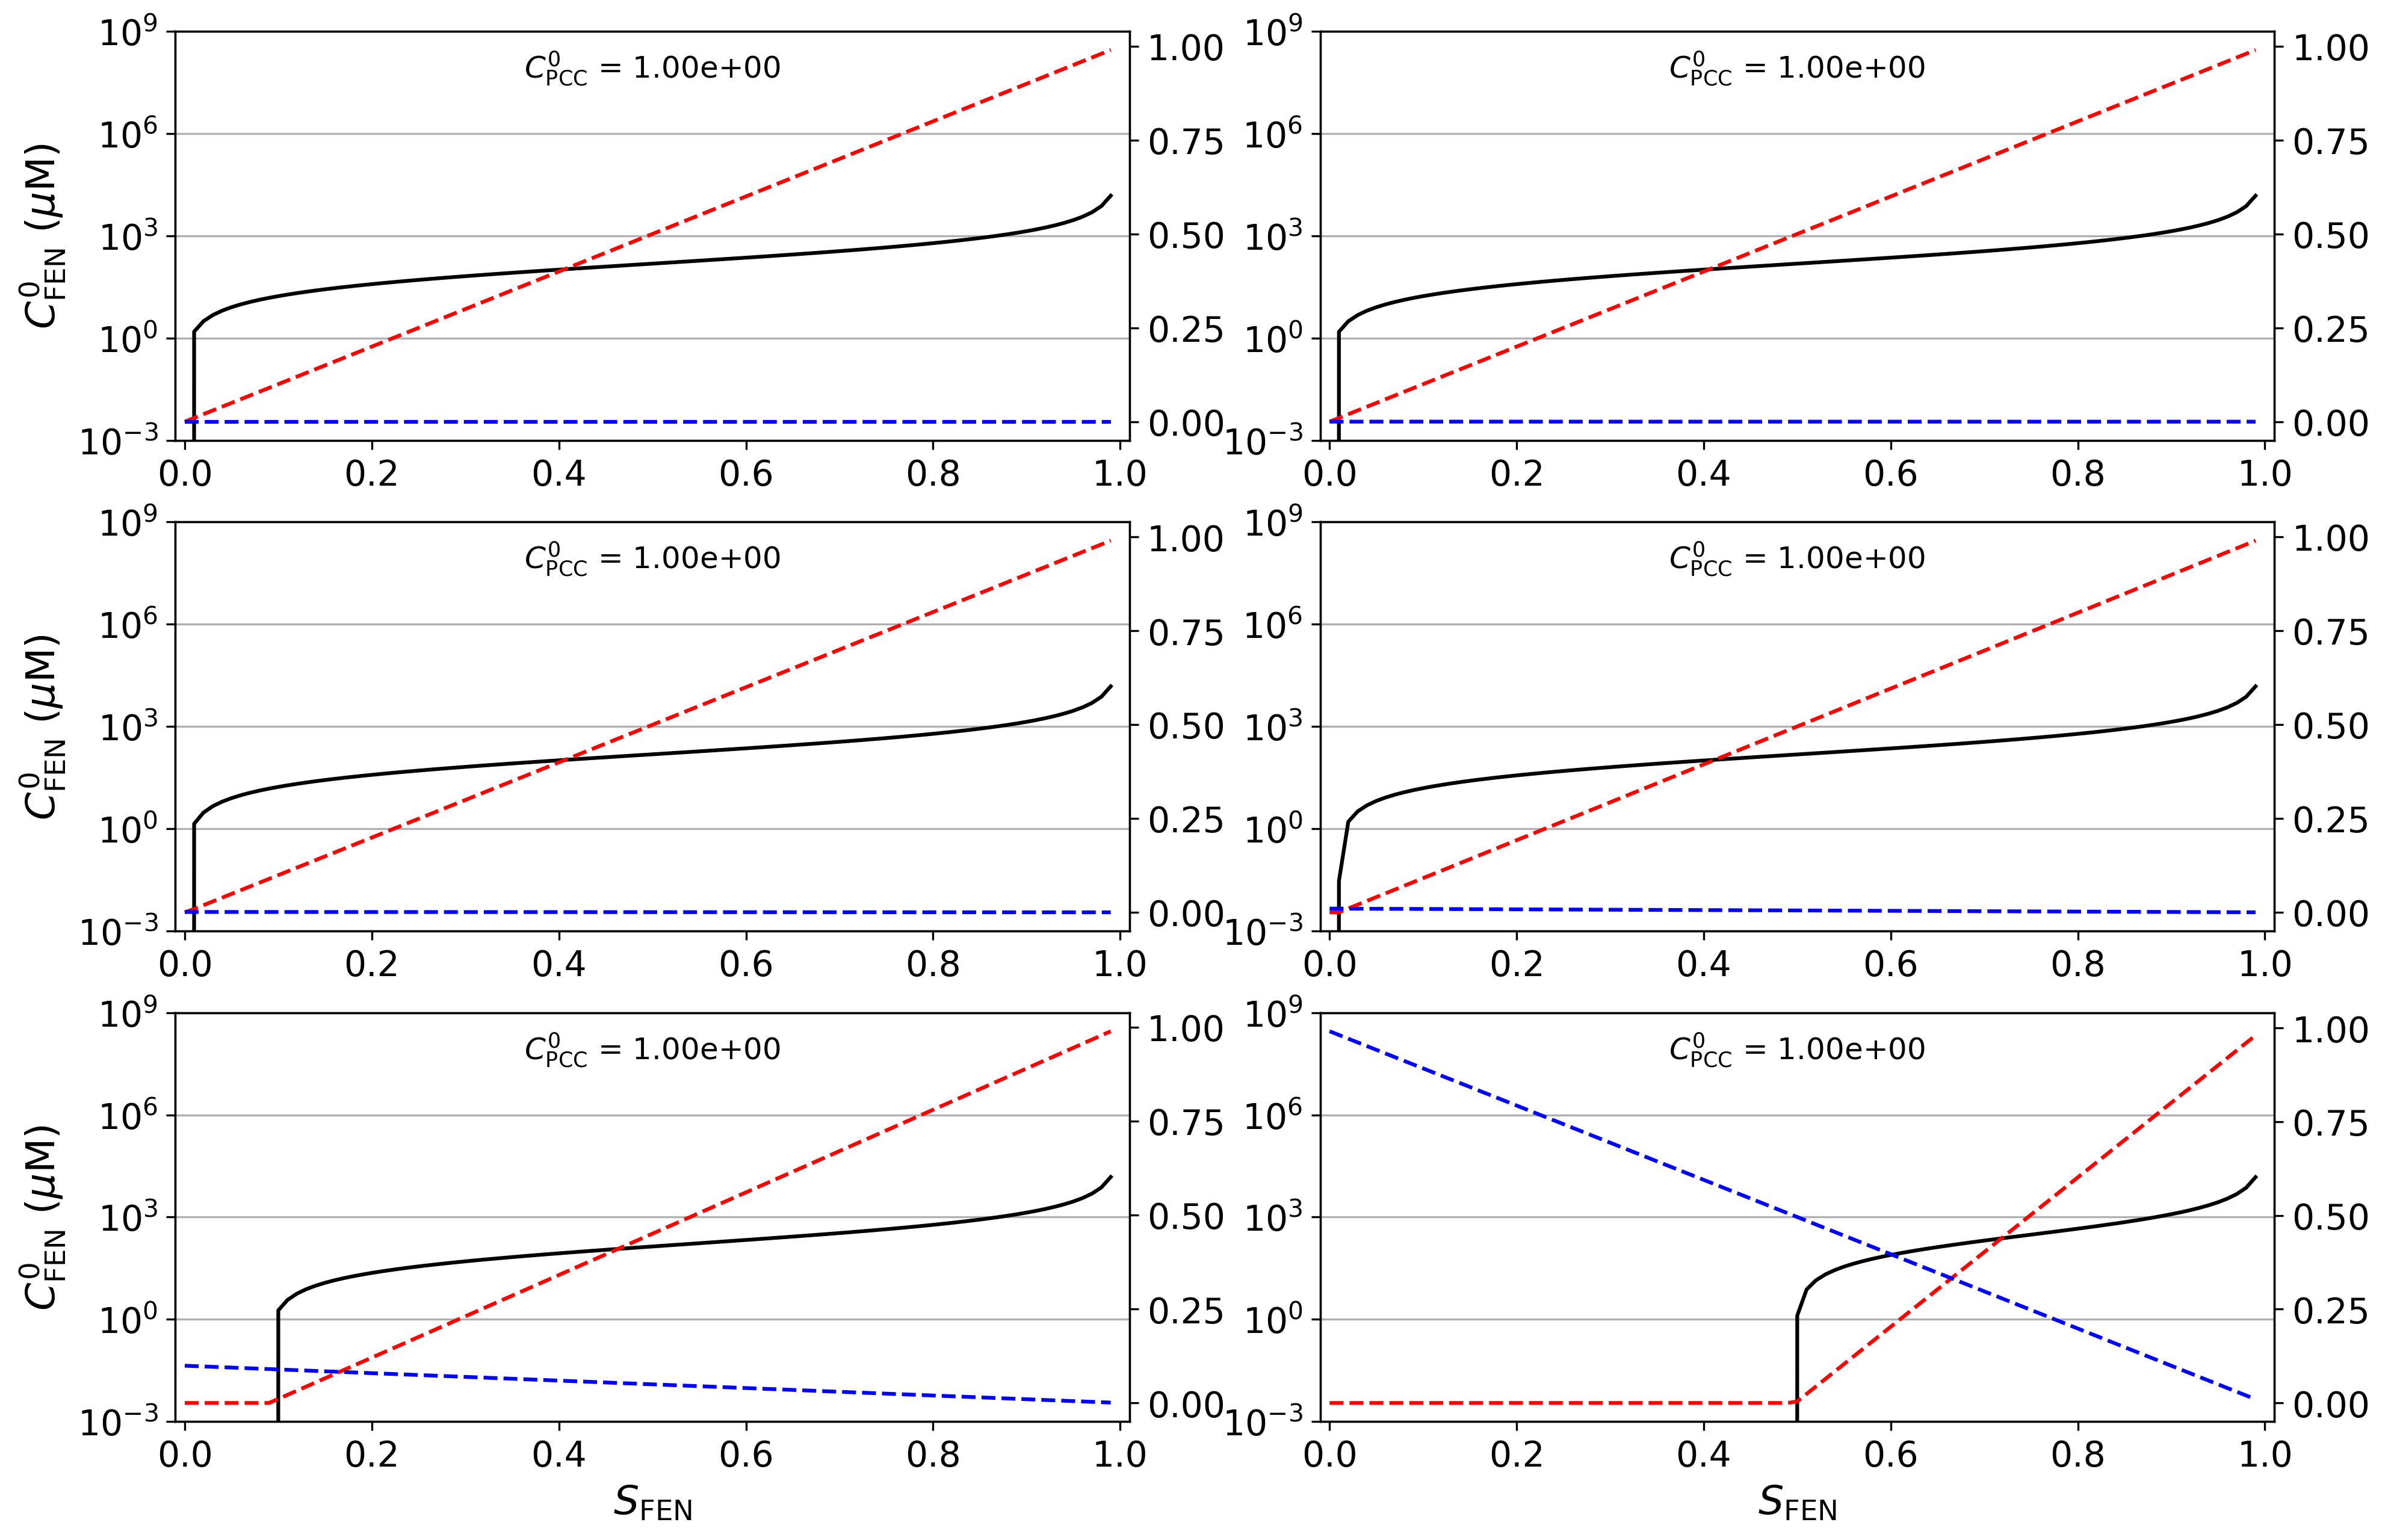

In [140]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e-0
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

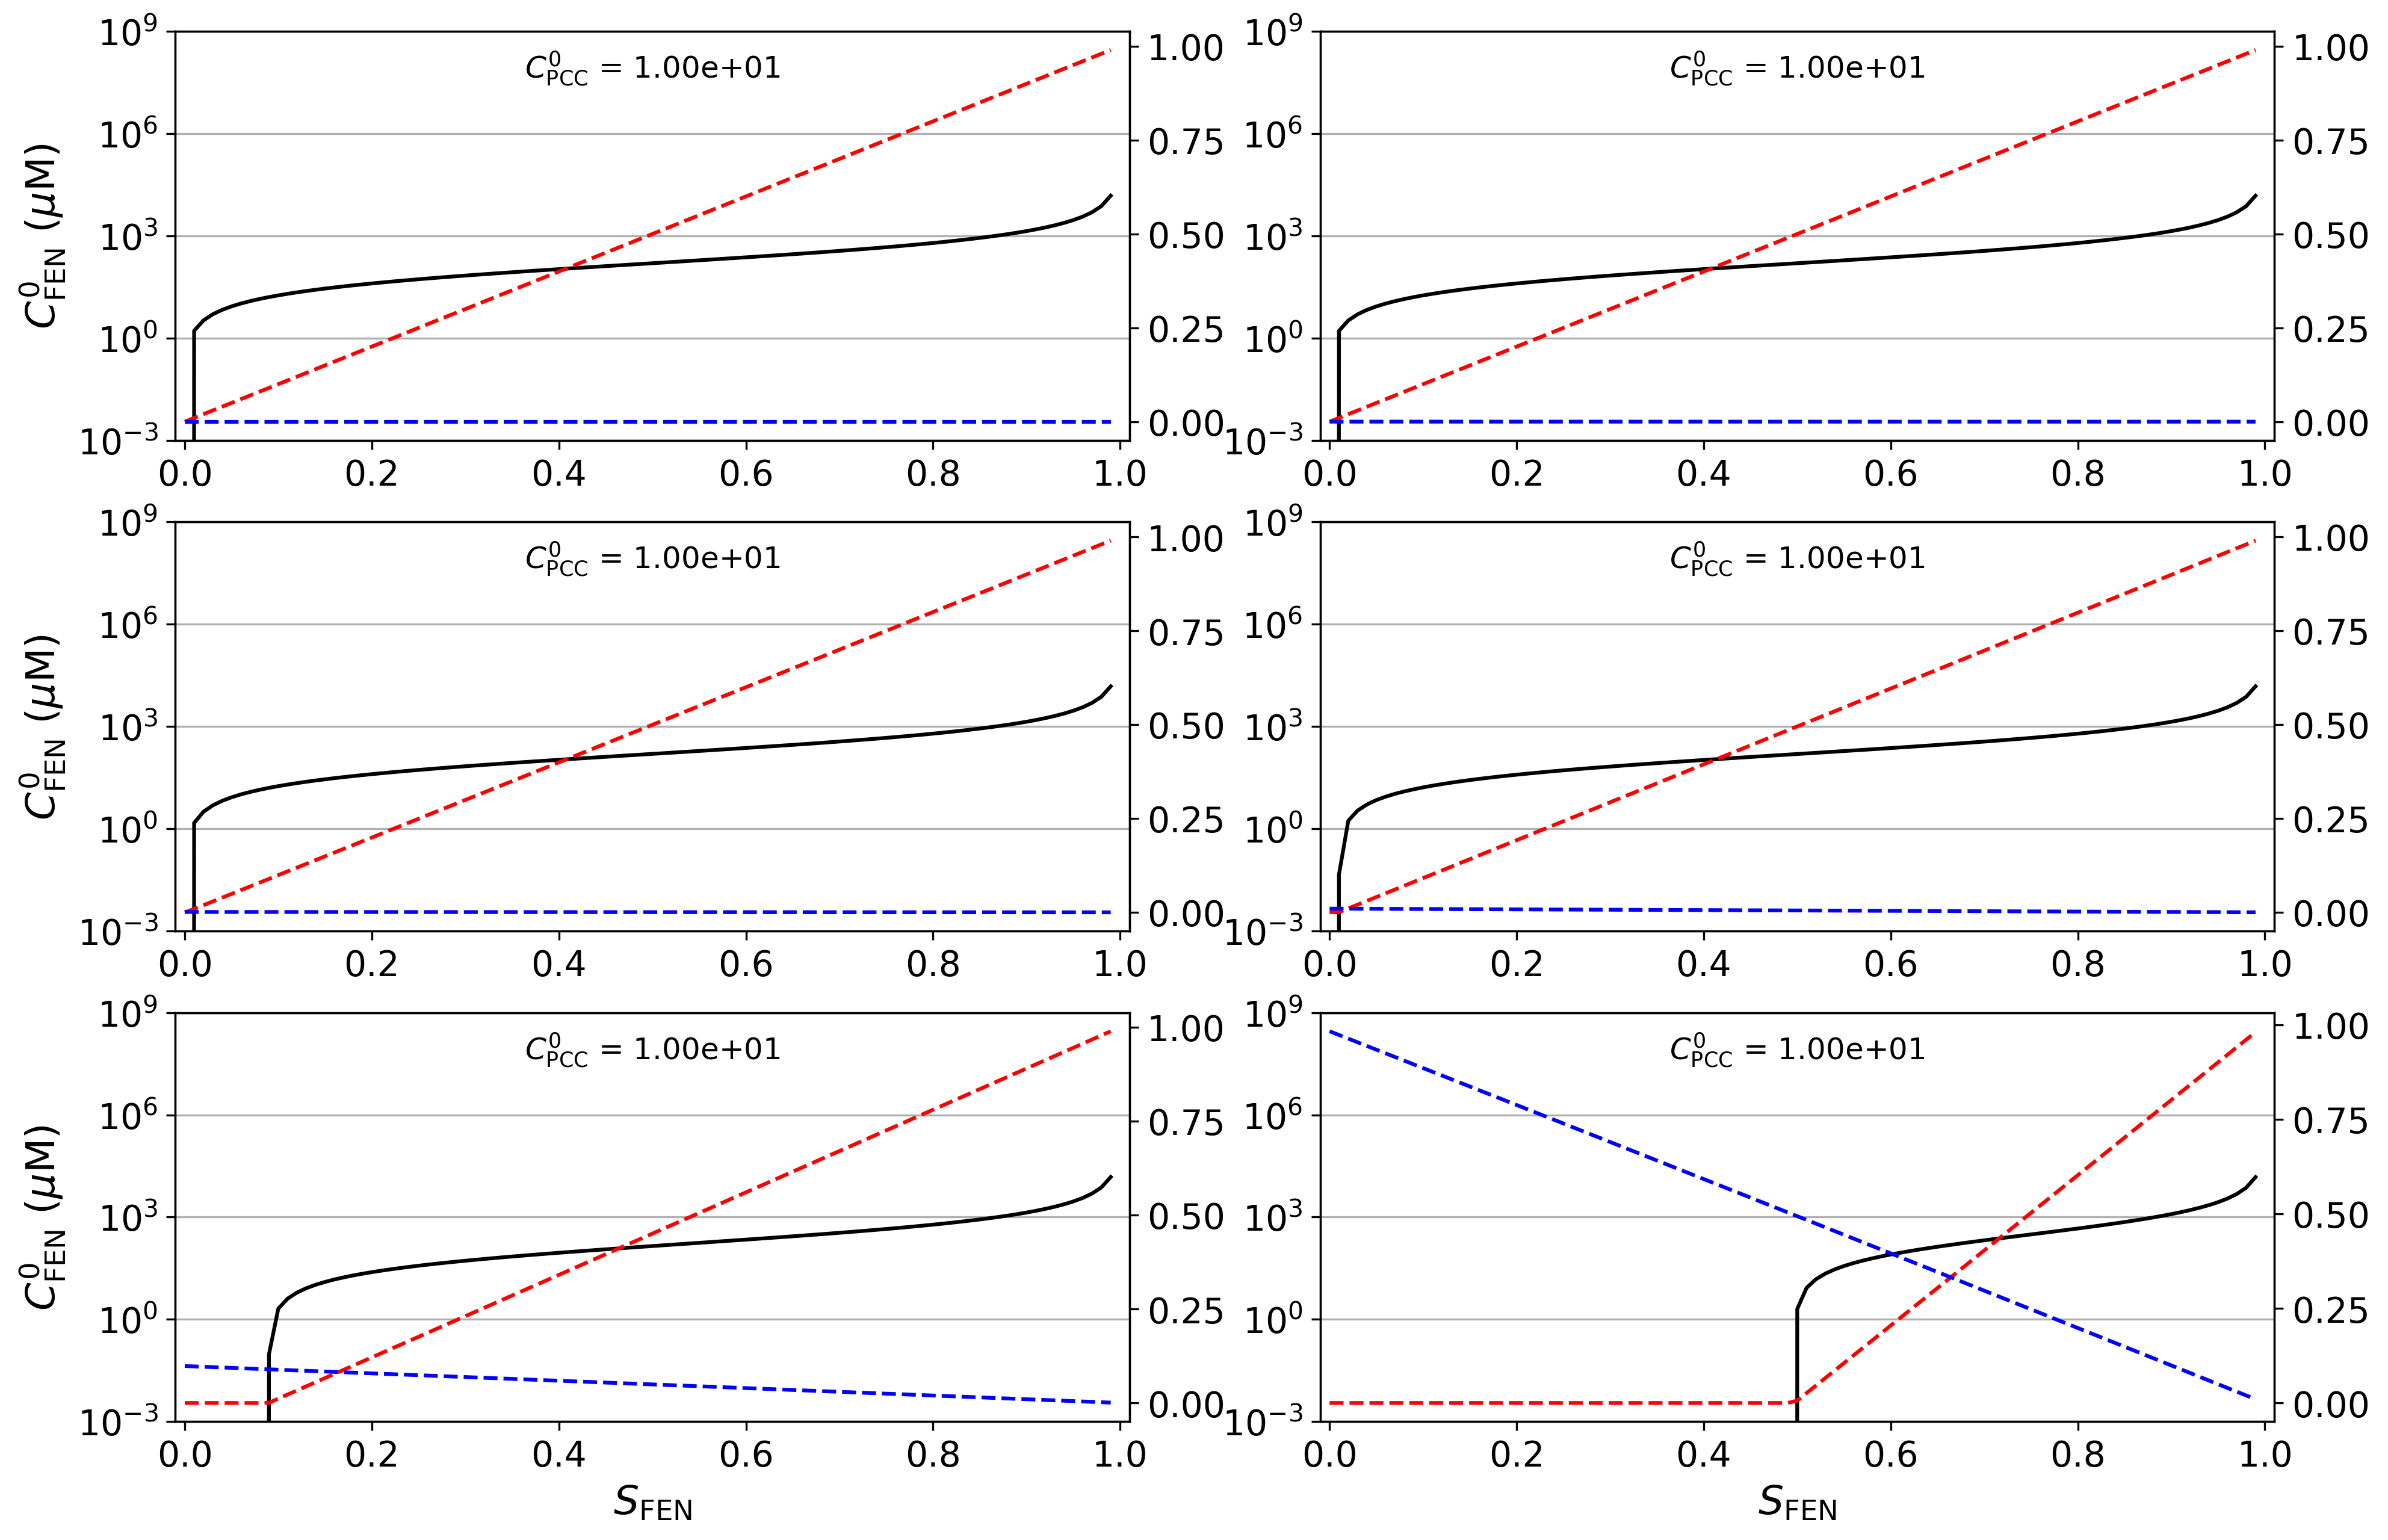

In [141]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e1
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

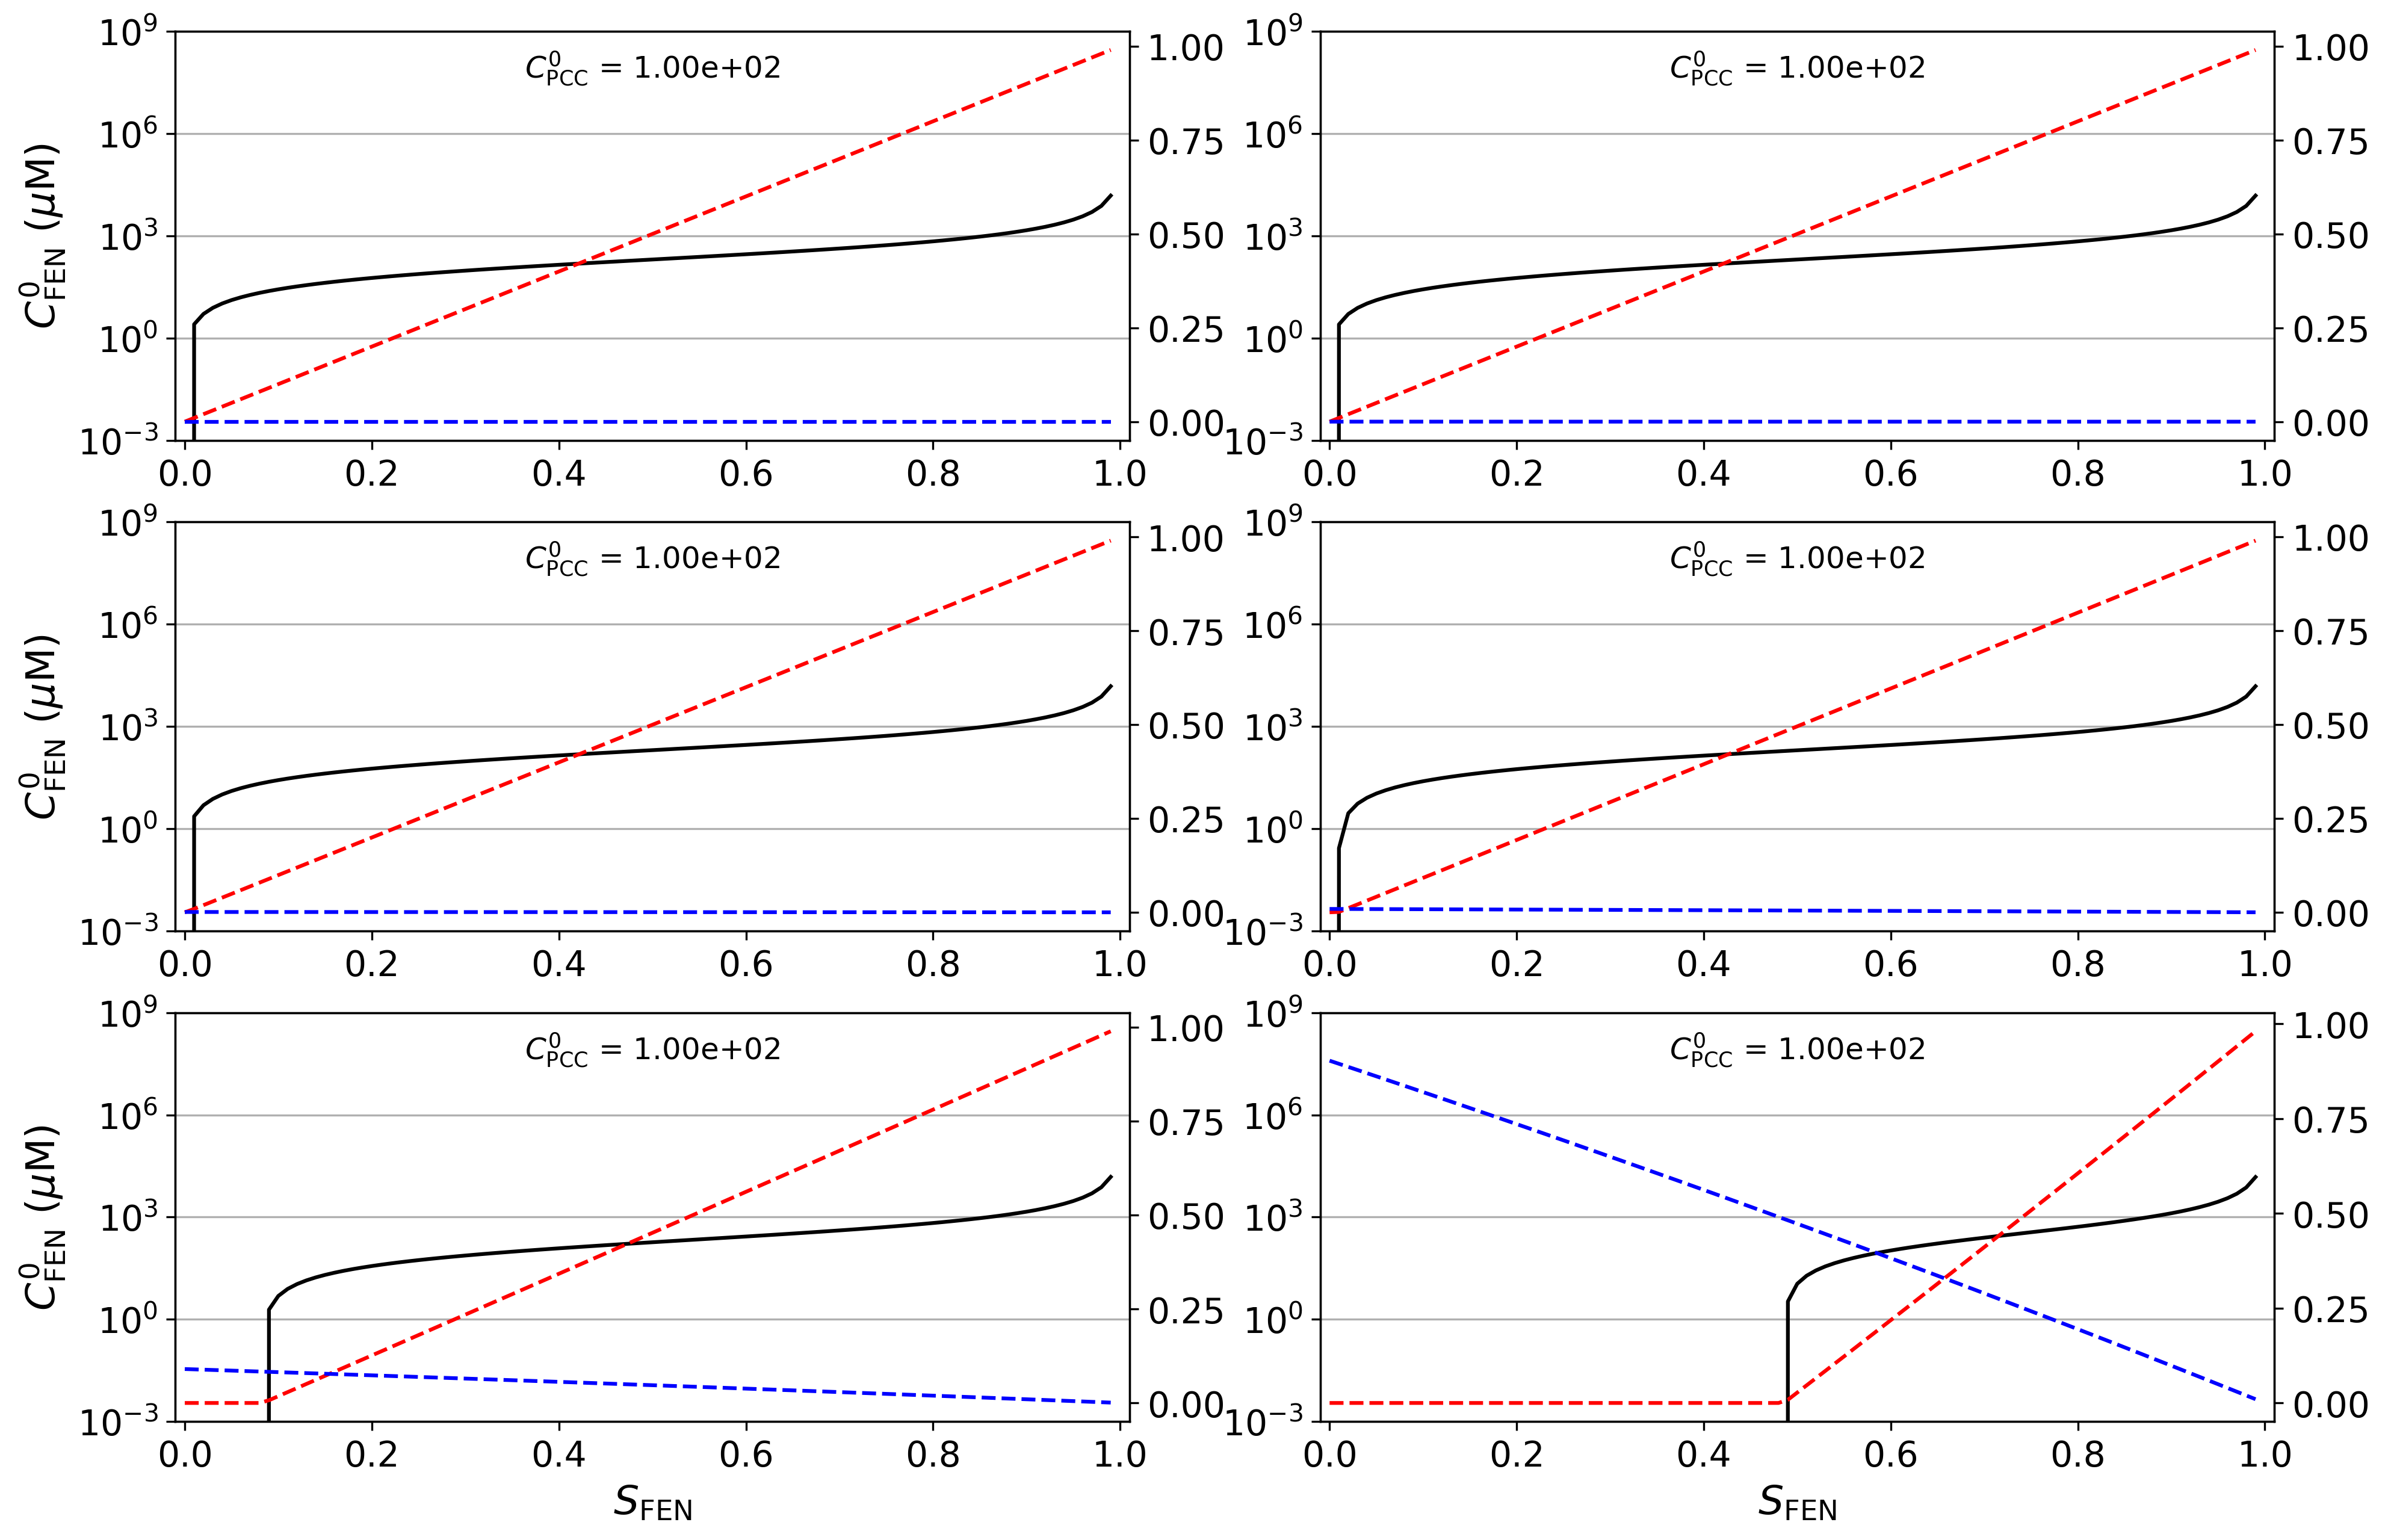

In [142]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e2
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

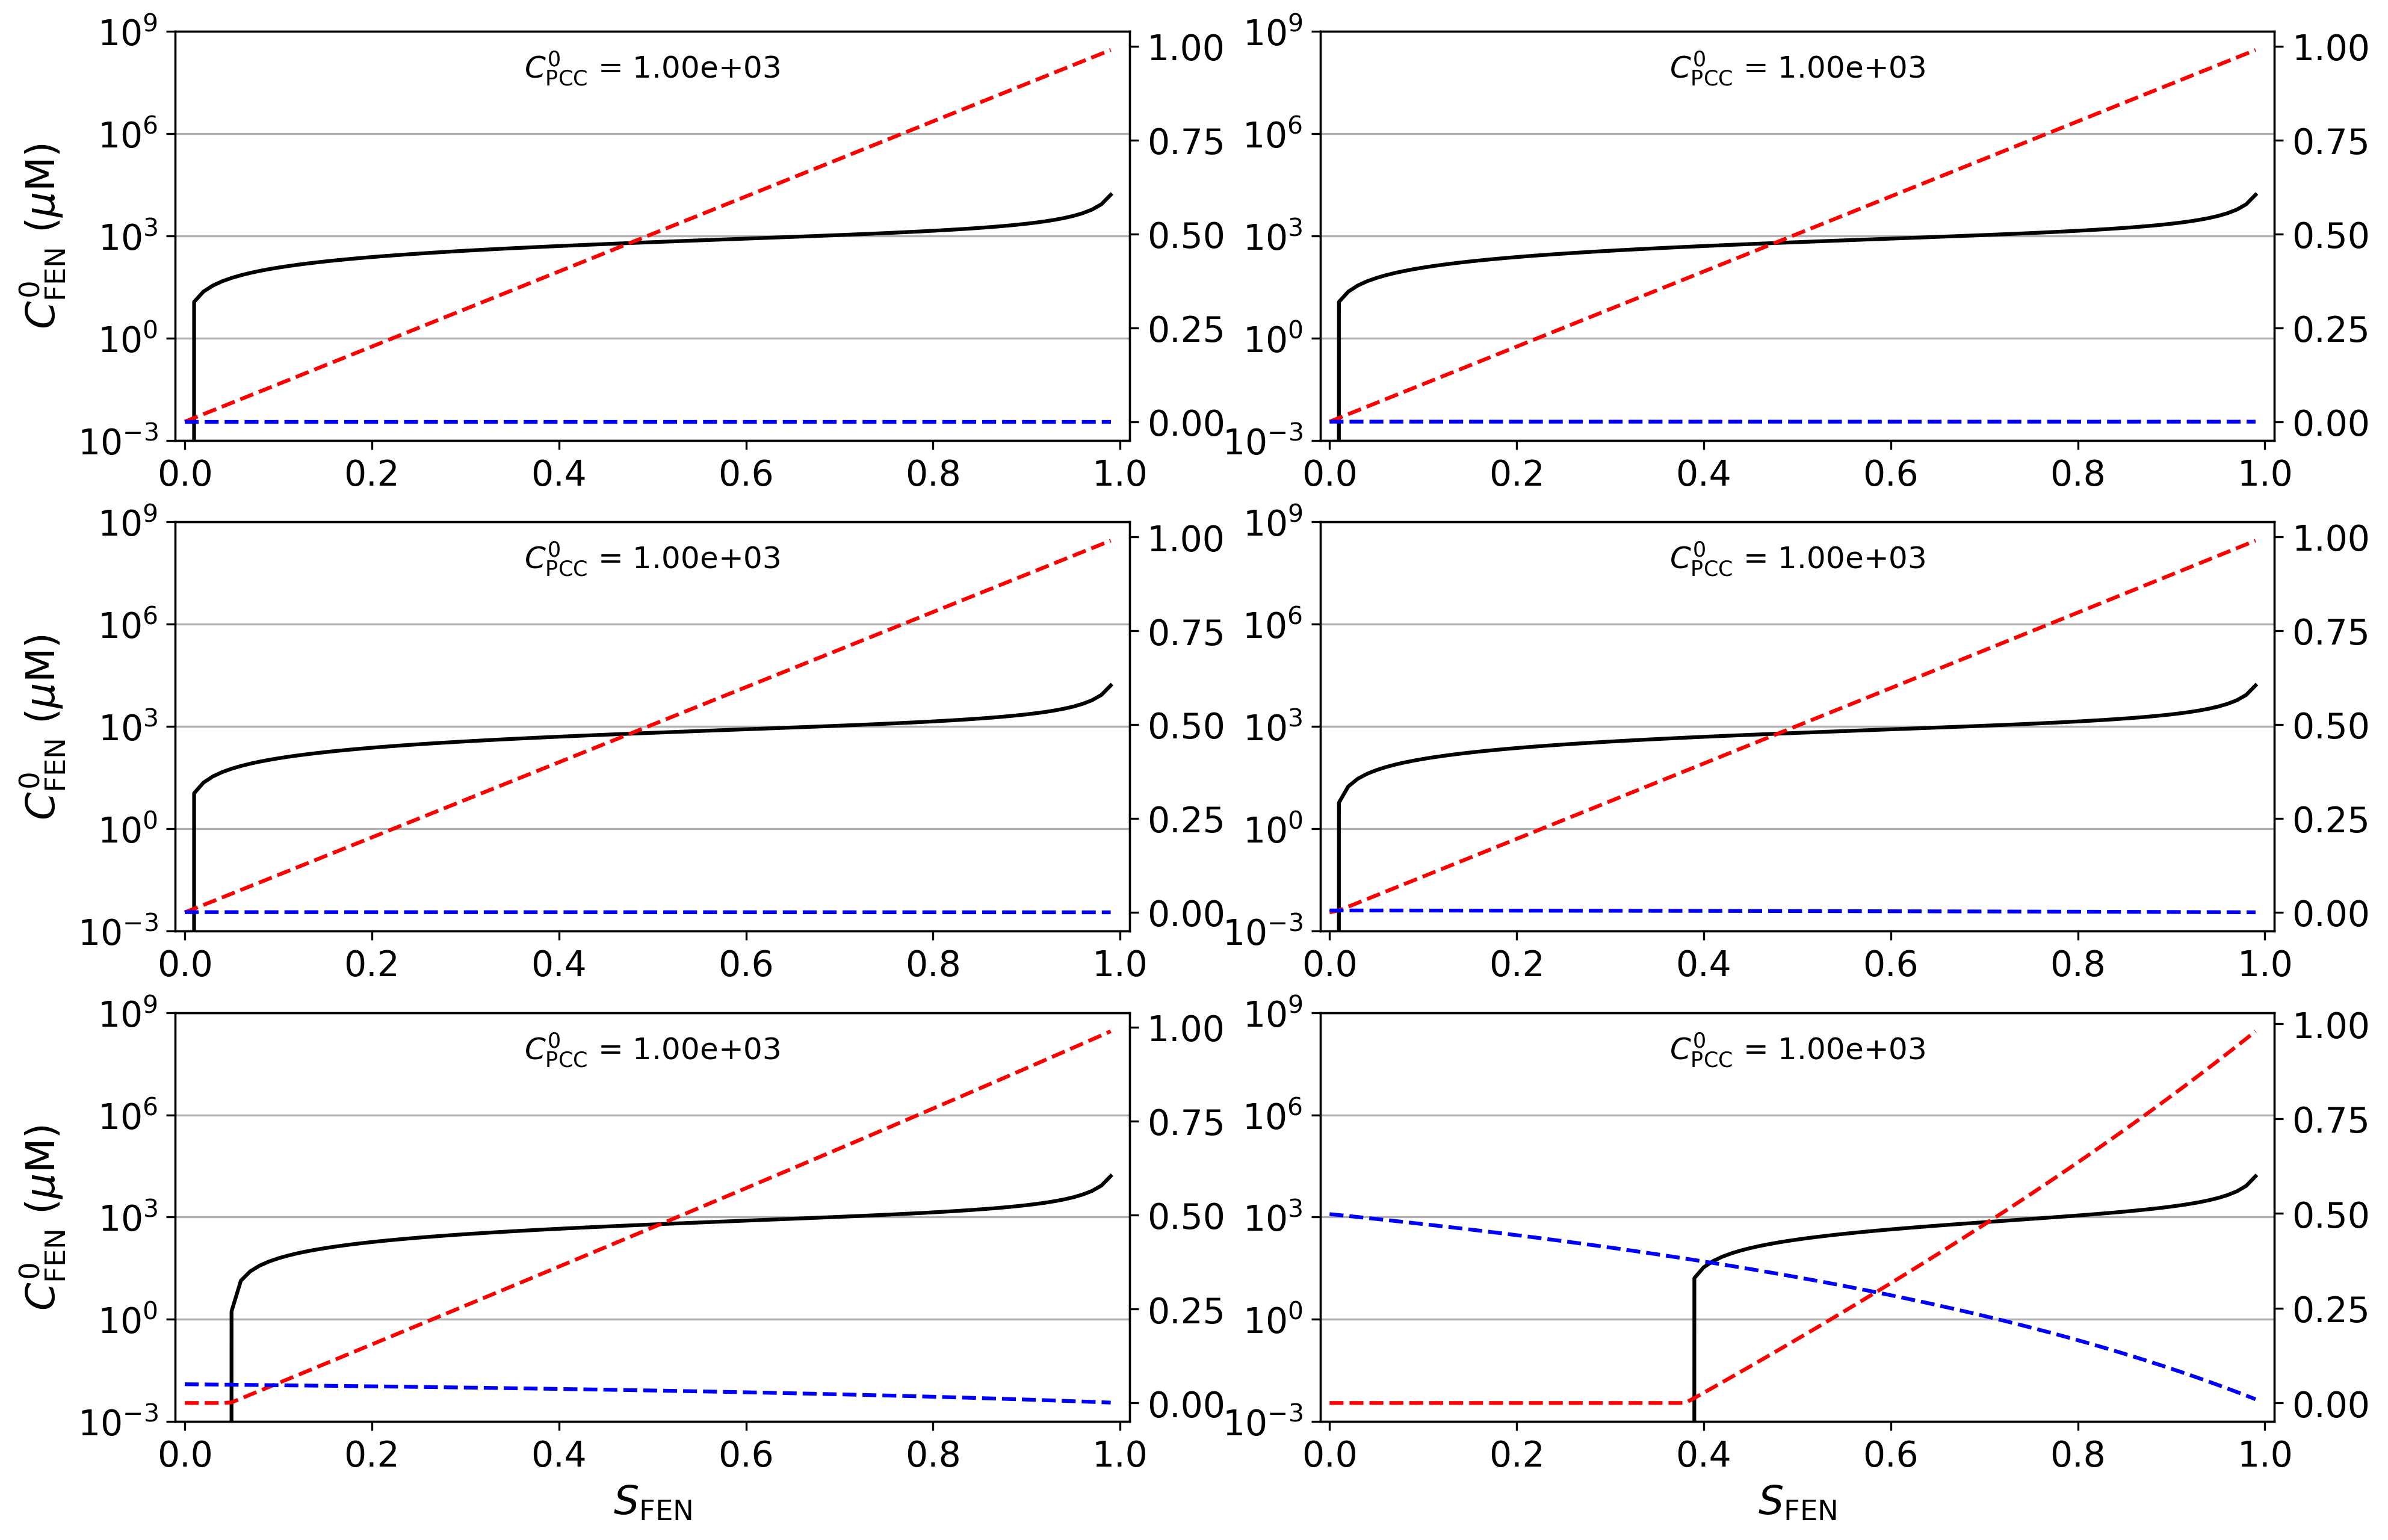

In [143]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(15, 10))
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#8B8BAE']
axs = ax.flatten()

C0_P = 1e3
resA = resP[C0_P]
for i, dataA in enumerate(resA.items()):
    C0_A, (valsC, valsSF, valsSA) = dataA
    ax2 = axs[i].twinx()
    axs[i].grid(True, axis="y")
    axs[i].plot(S_range, valsC, "k")
    axs[i].set_yscale("log")
    axs[i].set_xlim(-0.01, 1.01)
    axs[i].set_ylim(1e-3, 1e9)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_title(r"$C^0_{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    ax2.plot(S_range, np.where(valsSF<0, 0.0, valsSF), "--r")
    ax2.plot(S_range, valsSA, "--b")
    ax2.tick_params(axis="y", labelsize=14)

axs[4].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[5].set_xlabel(r"$S_{\text{FEN}}$", fontsize=16)
axs[0].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[2].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[4].set_ylabel(r"$C^0_{\text{FEN}}$ ($\mu$M)", fontsize=16)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

# Same thing but probing initial concentrations

In [78]:
Kd_F = np.longdouble(152) #muM
Kd_A = np.longdouble(1008) #muM
C0_P = np.longdouble(5e2) #muM
C0_A = np.longdouble(0) #muM
C0_F = np.longdouble(402) #muM

In [79]:
C_P_fun = lambda x: x*(1 + C0_F/(Kd_F + x) + C0_A/(Kd_A + x)) - C0_P
sol = root_scalar(C_P_fun, x0 = C0_P/2)
C_P = sol.root
C_A = C0_A/(1 + C_P/Kd_A)
C_F = C0_F/(1 + C_P/Kd_F)
C_PF = C0_F - C_F
C_PA = C0_A - C_A
S_A = C_PA/C0_P
S_F = C_PF/C0_P
S_T = S_A + S_F
print(f"C_F = {C_F:.3e}")
print(f"C0_F = {C0_F:.3e}")
print(f"C_A = {C_A:.3e}")
print(f"C_P = {C_P:.3e}")
print(f"C_PF = {C_PF:.3e}")
print(f"C_PA = {C_PA:.3e}")
print(f"S_A = {S_A:.3f}")
print(f"S_F = {S_F:.3f}")
print(f"S_A + S_F = {S_A + S_F:.3f}")

C_F = 1.520e+02
C0_F = 4.020e+02
C_A = 0.000e+00
C_P = 2.500e+02
C_PF = 2.500e+02
C_PA = 0.000e+00
S_A = 0.000
S_F = 0.500
S_A + S_F = 0.500


In [4]:
C0_F_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
C0_A_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM

resP = {}
for C0_P in C0_P_range:
    resA = {}
    for C0_A in C0_A_range:
        S_A_vals = np.zeros((len(C0_F_range), ))
        S_F_vals = np.zeros((len(C0_F_range), ))
        for i, C0_F in enumerate(C0_F_range):
            C_P_fun = lambda x: x*(1 + C0_F/(Kd_F + x) + C0_A/(Kd_A + x)) - C0_P
            sol = root_scalar(C_P_fun, x0 = C0_P/2)
            C_P = sol.root
            C_A = C0_A/(1 + C_P/Kd_A)
            C_F = C0_F/(1 + C_P/Kd_F)
            C_PF = C0_F - C_F
            C_PA = C0_A - C_A
            S_A_vals[i] = C_PA/C0_P
            S_F_vals[i] = C_PF/C0_P
        resA[C0_A] = (S_F_vals, S_A_vals)
    resP[C0_P] = resA

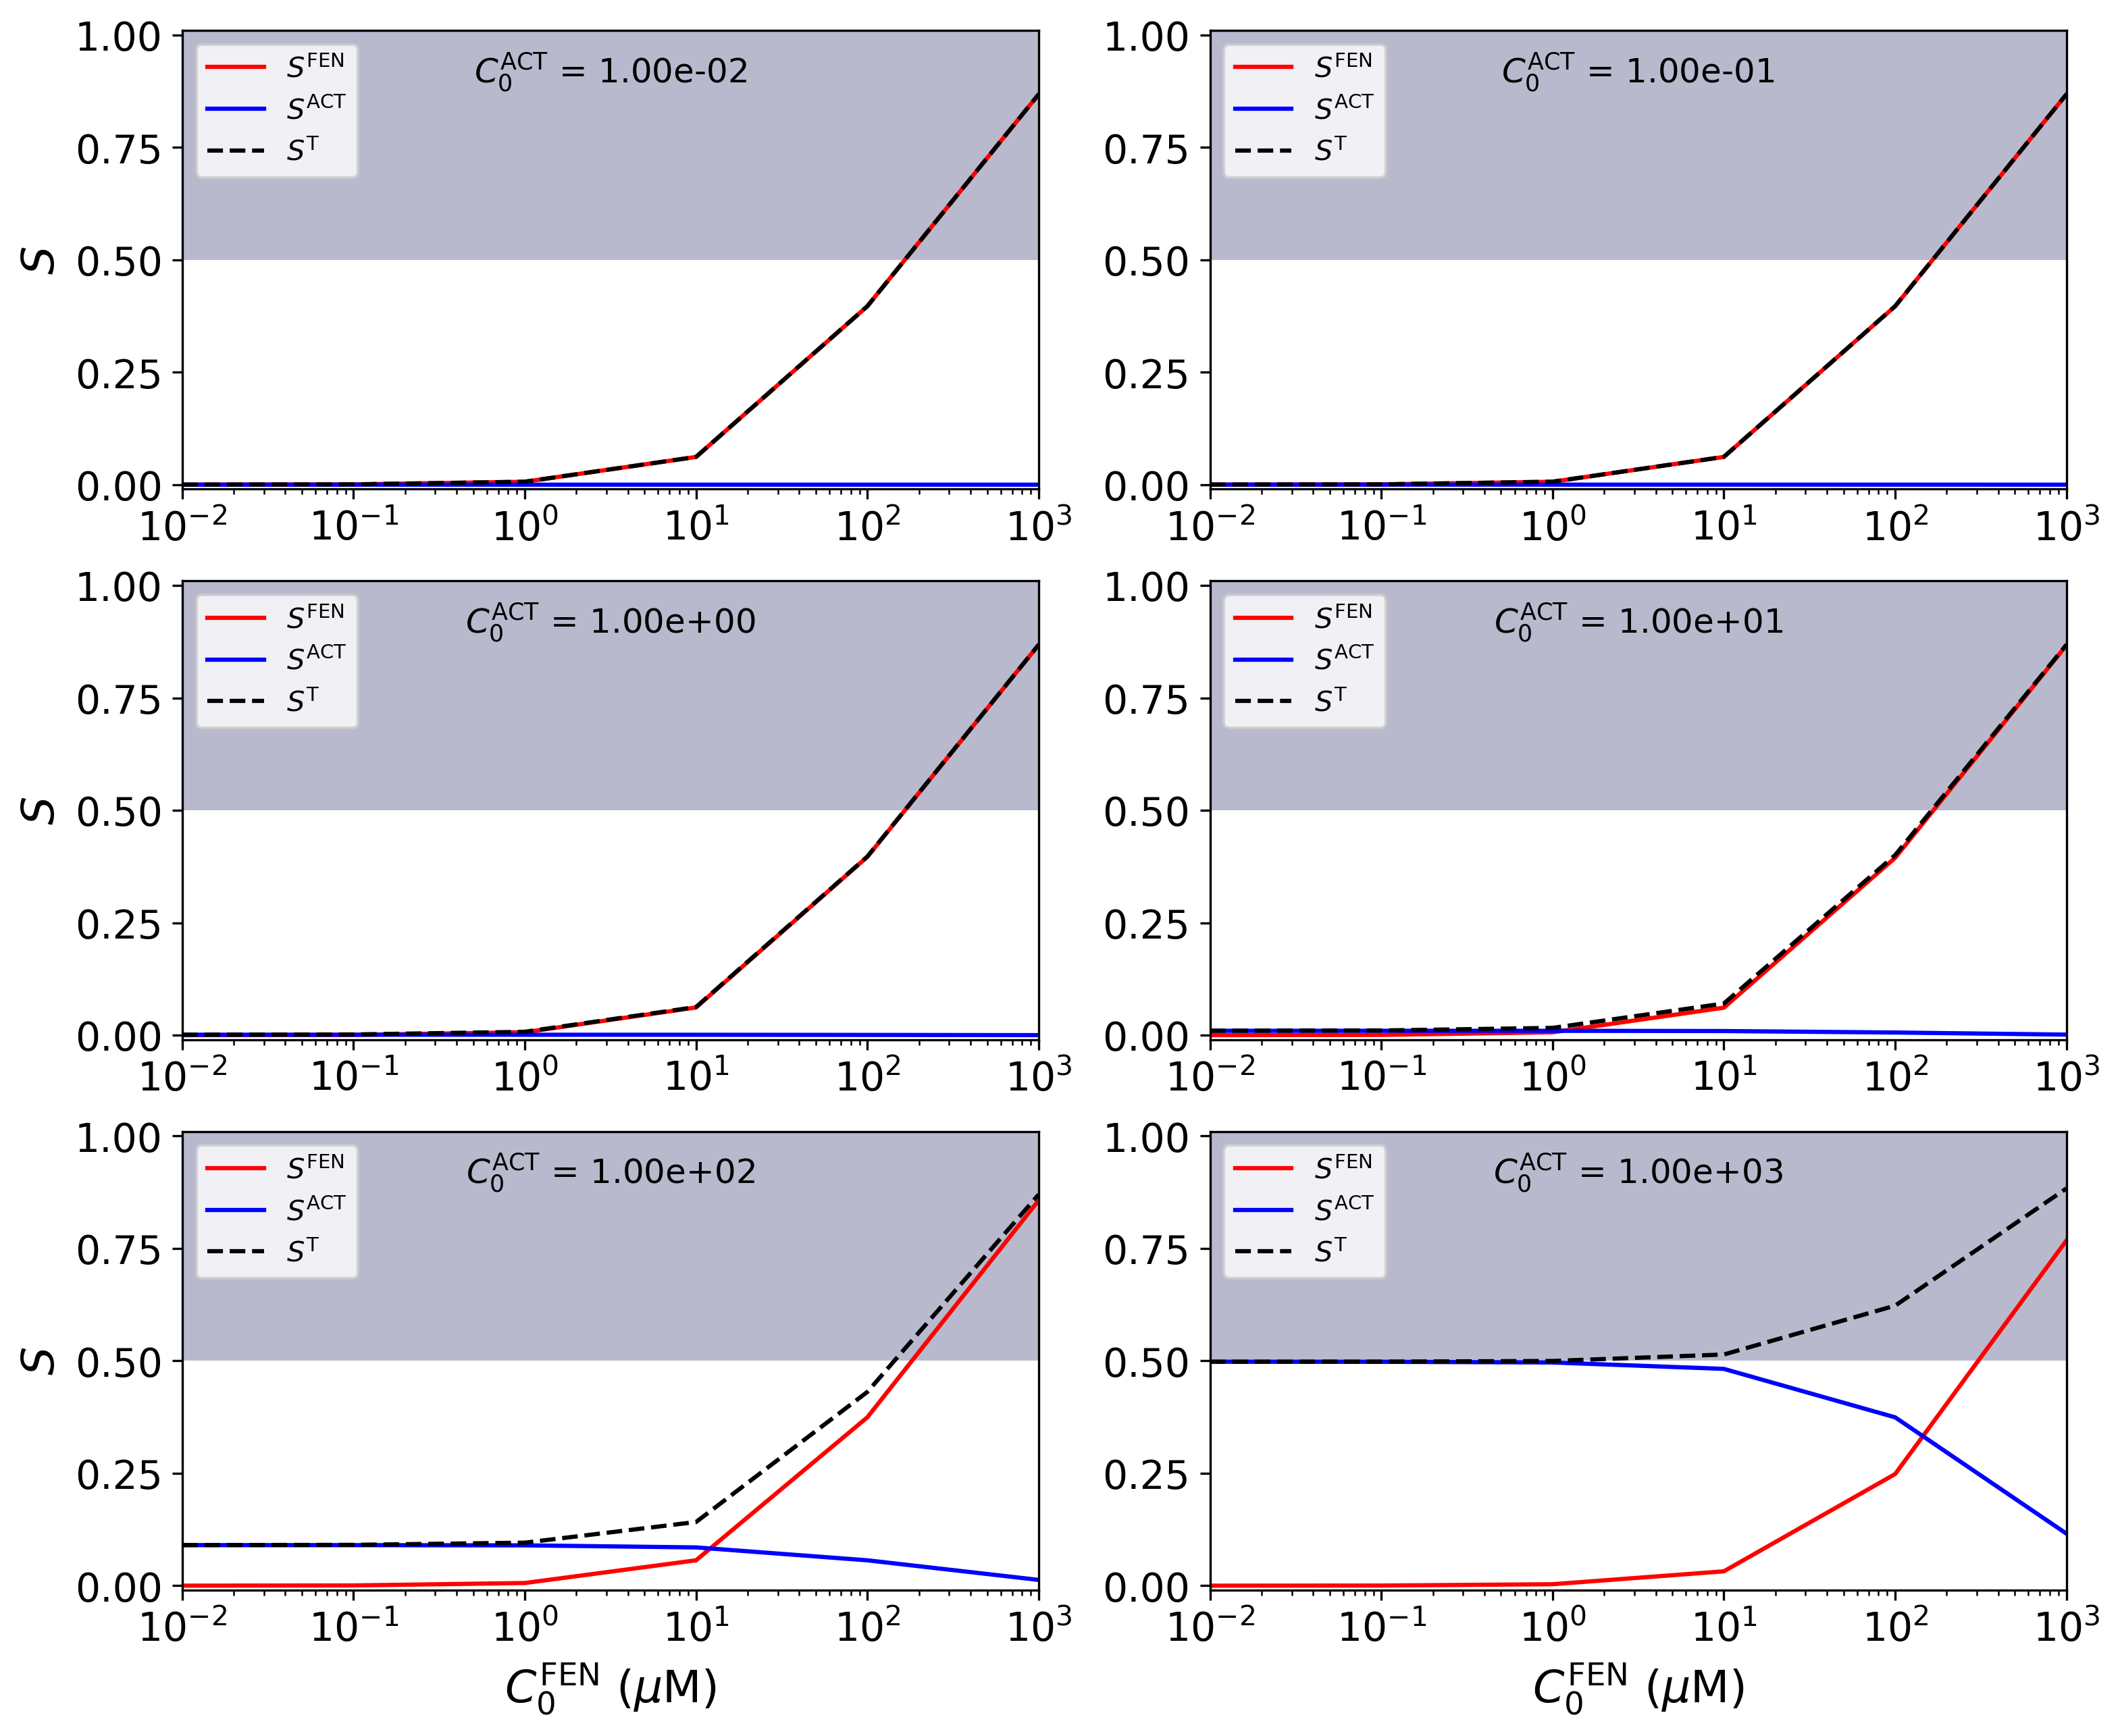

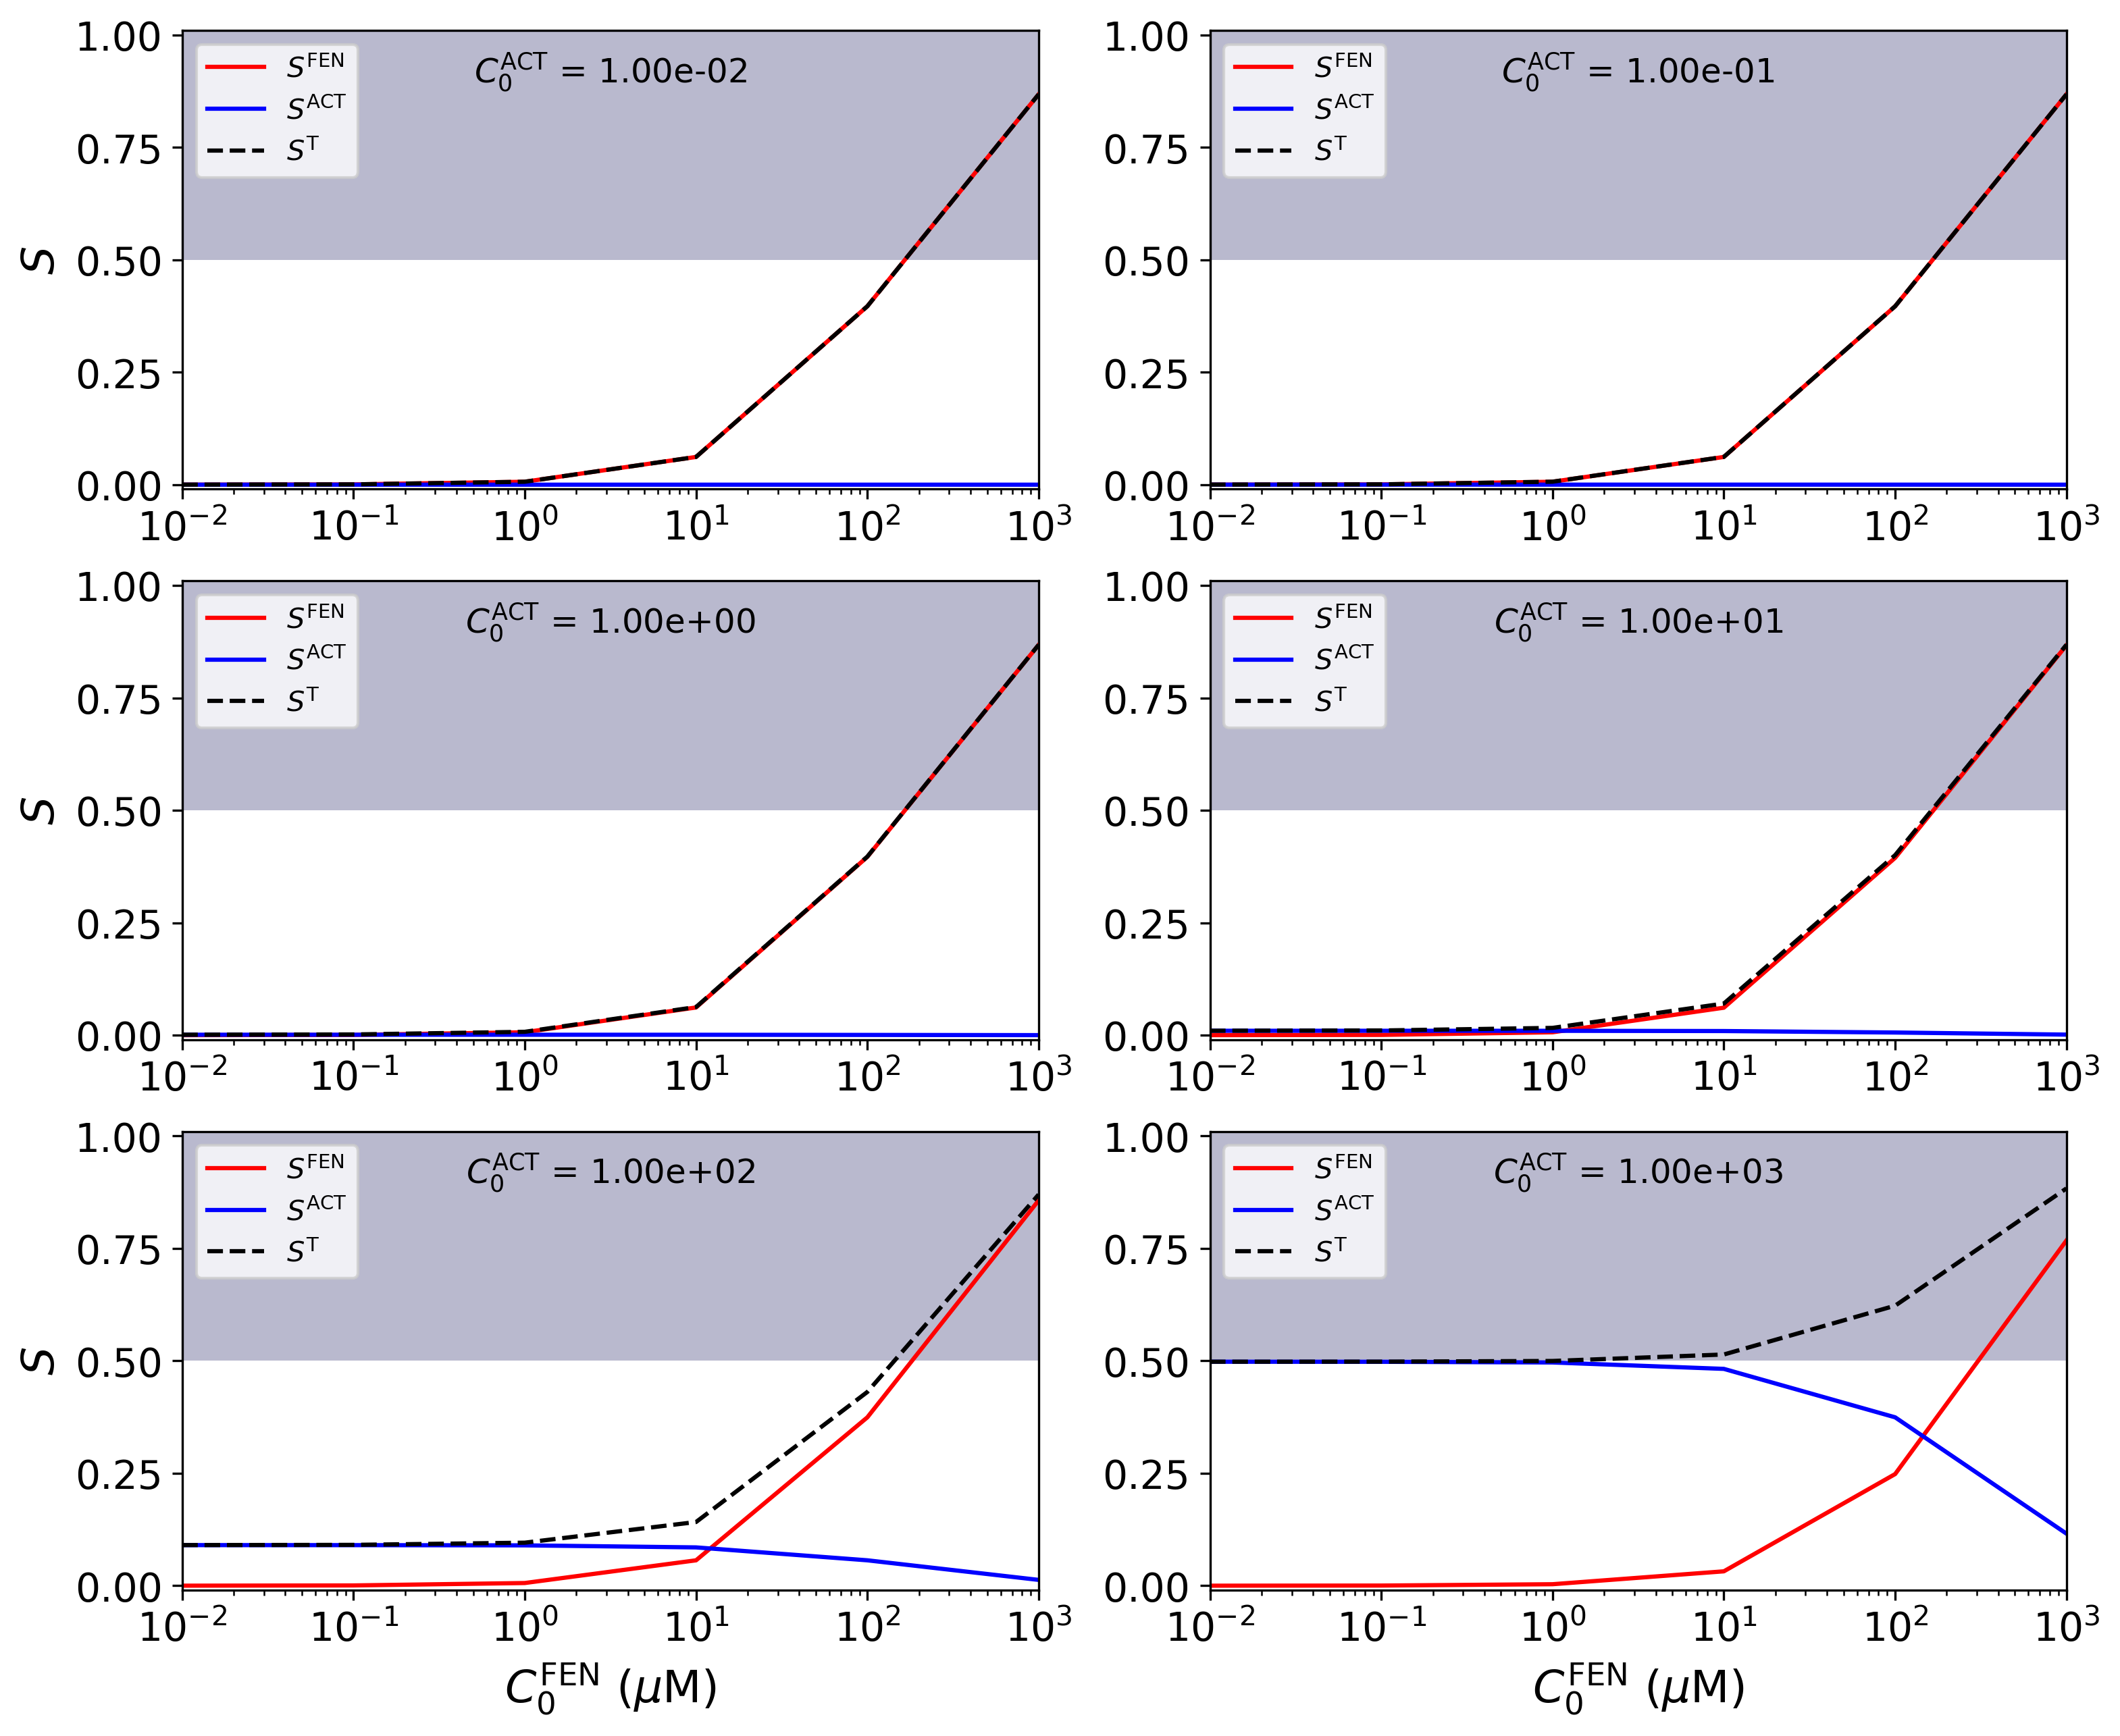

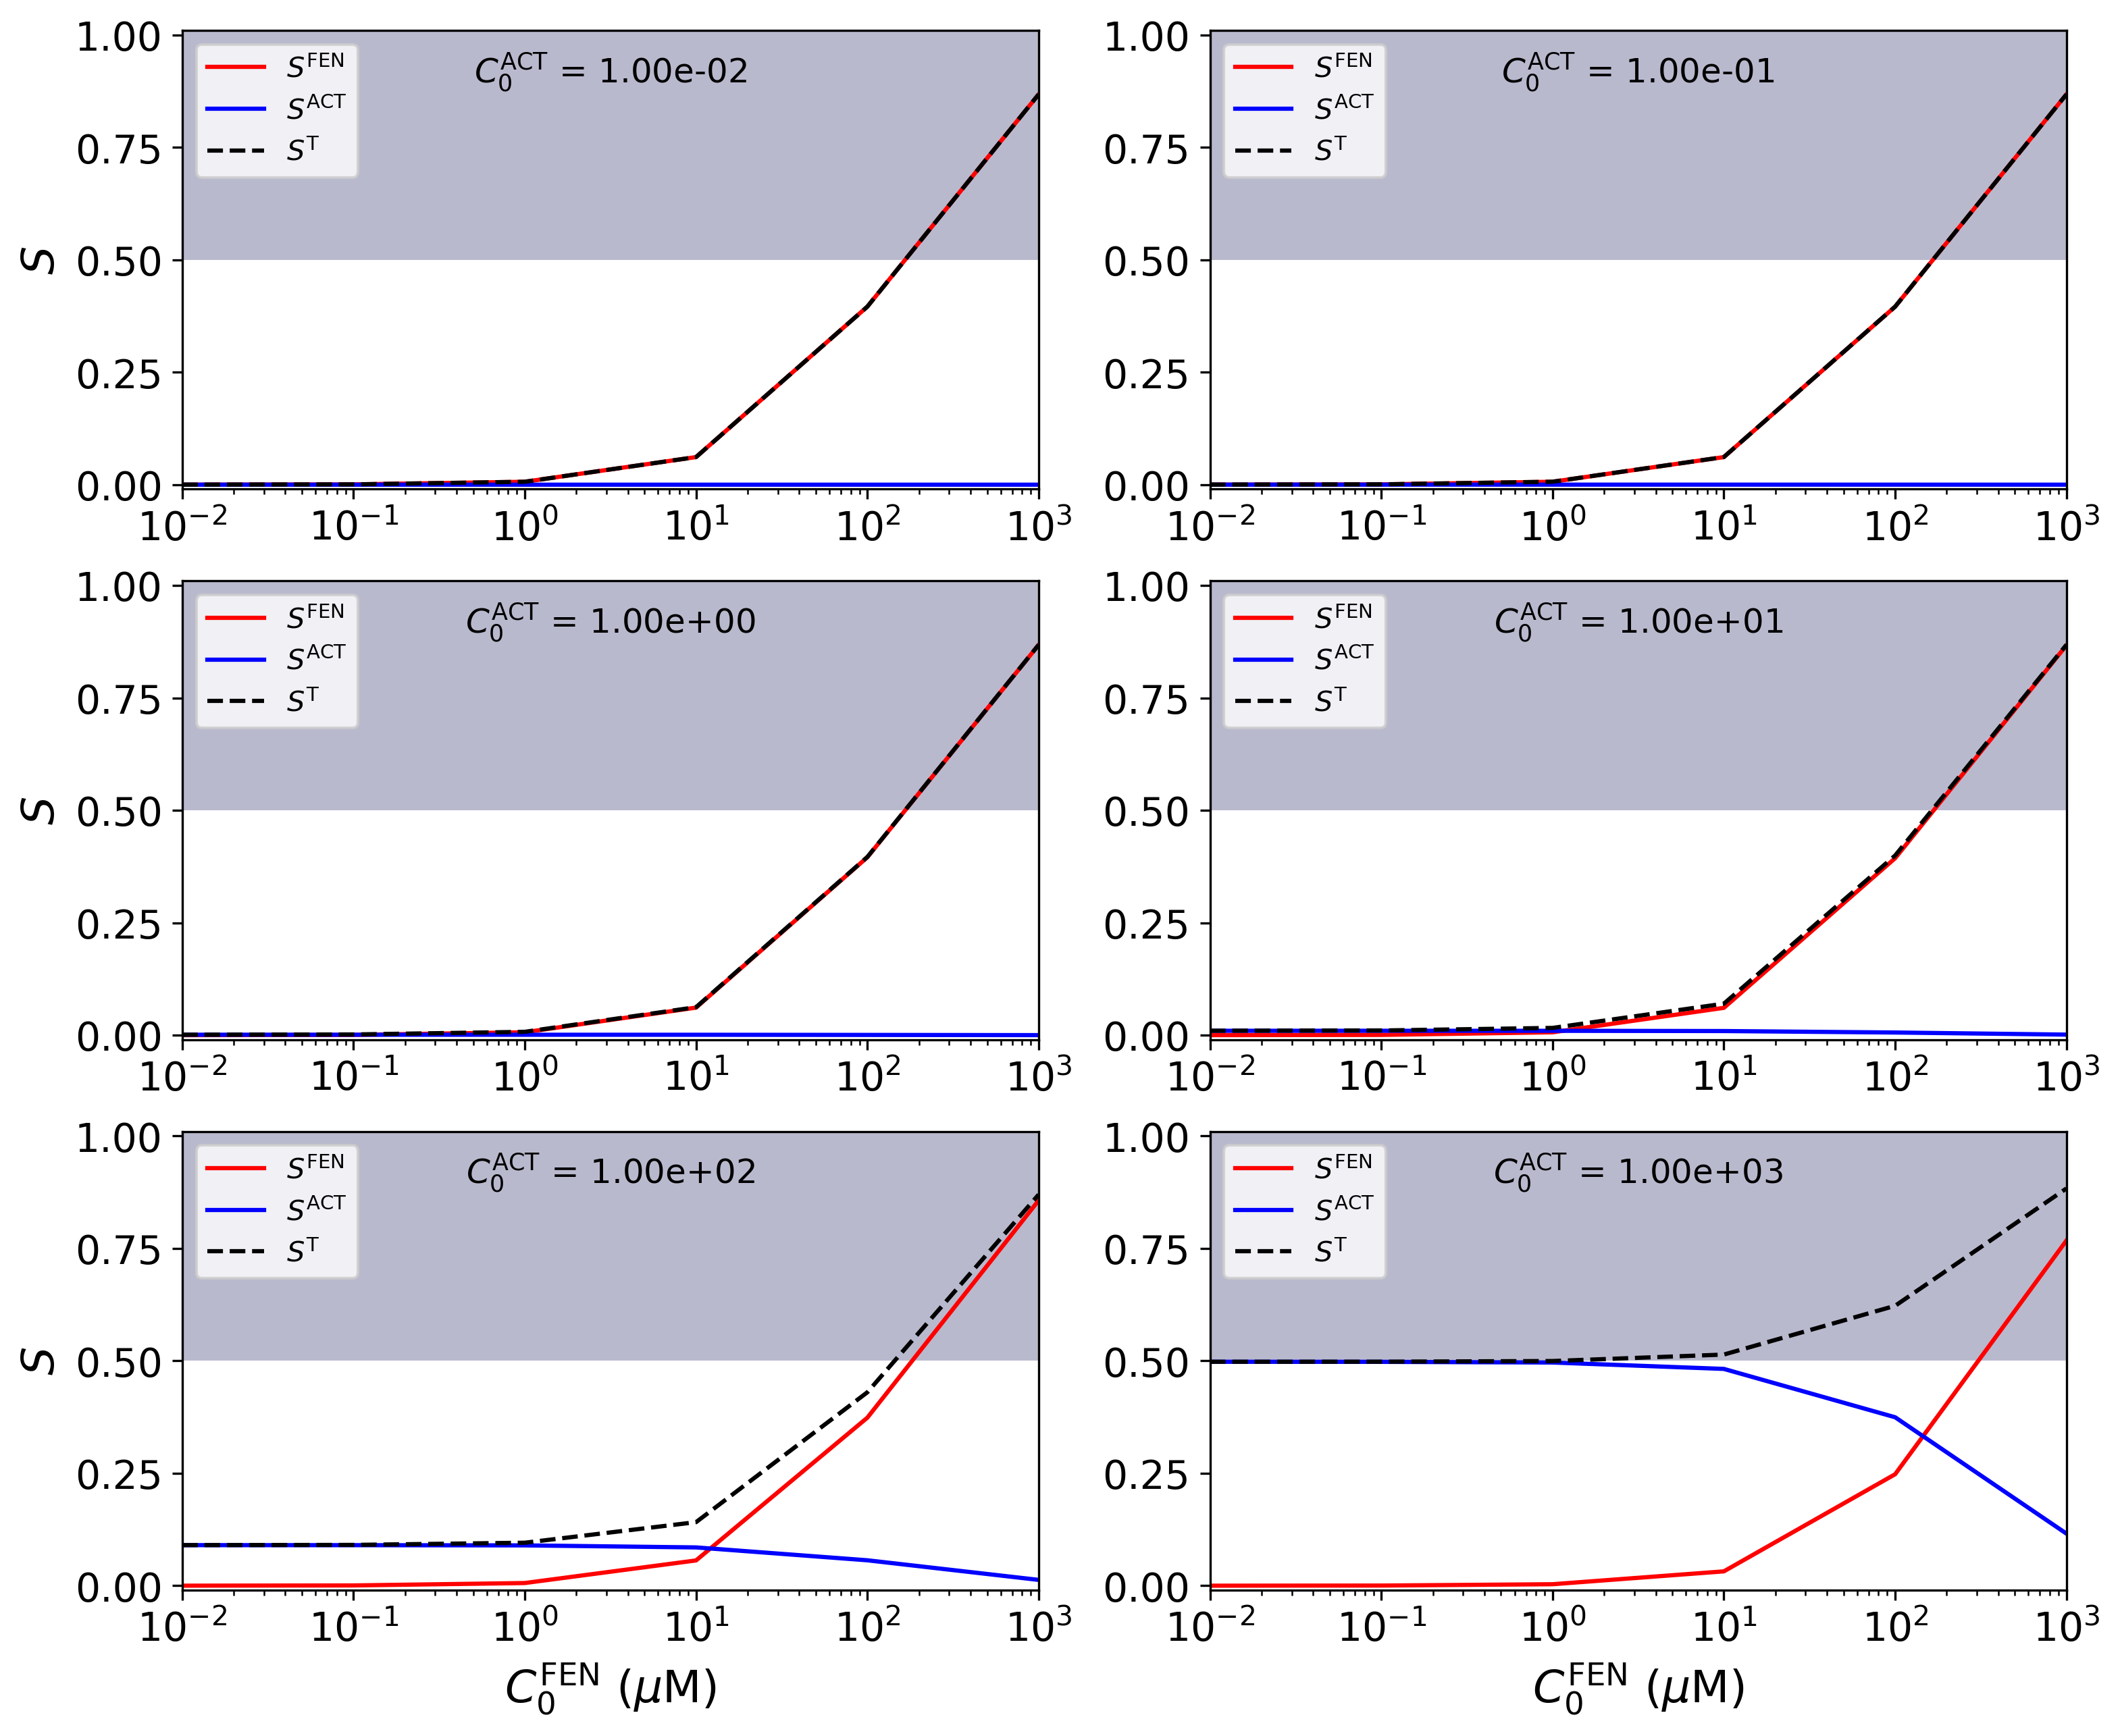

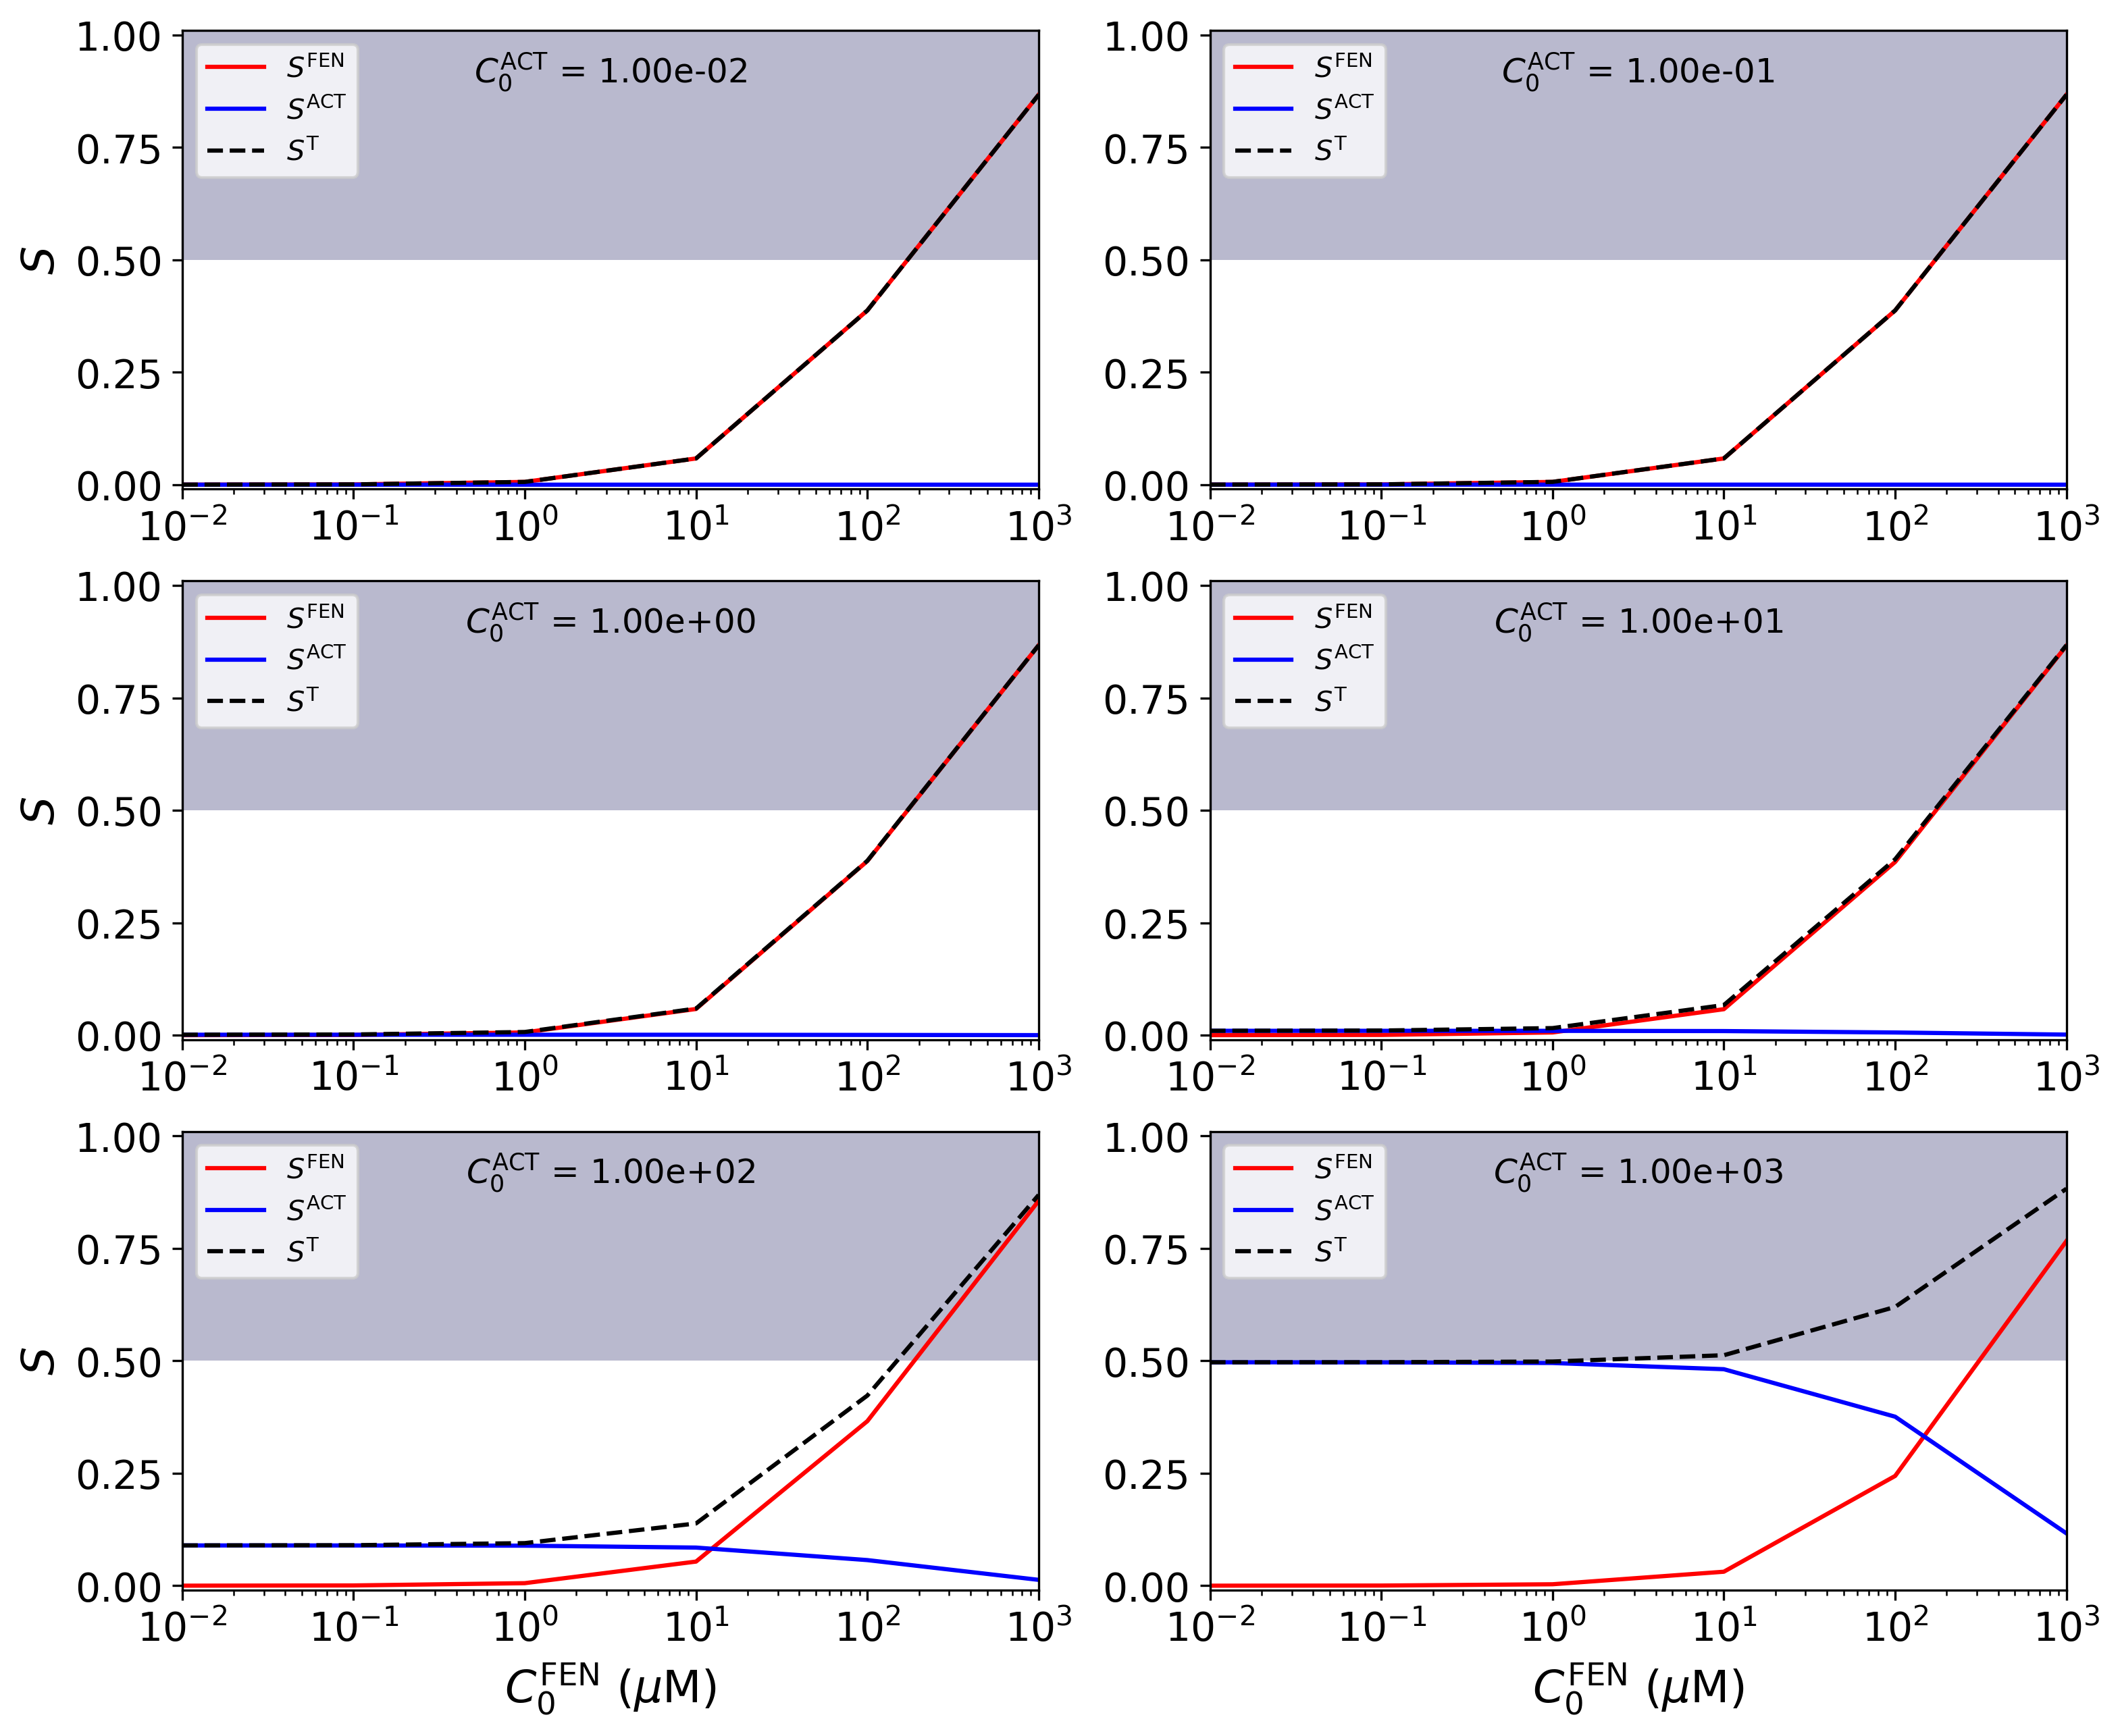

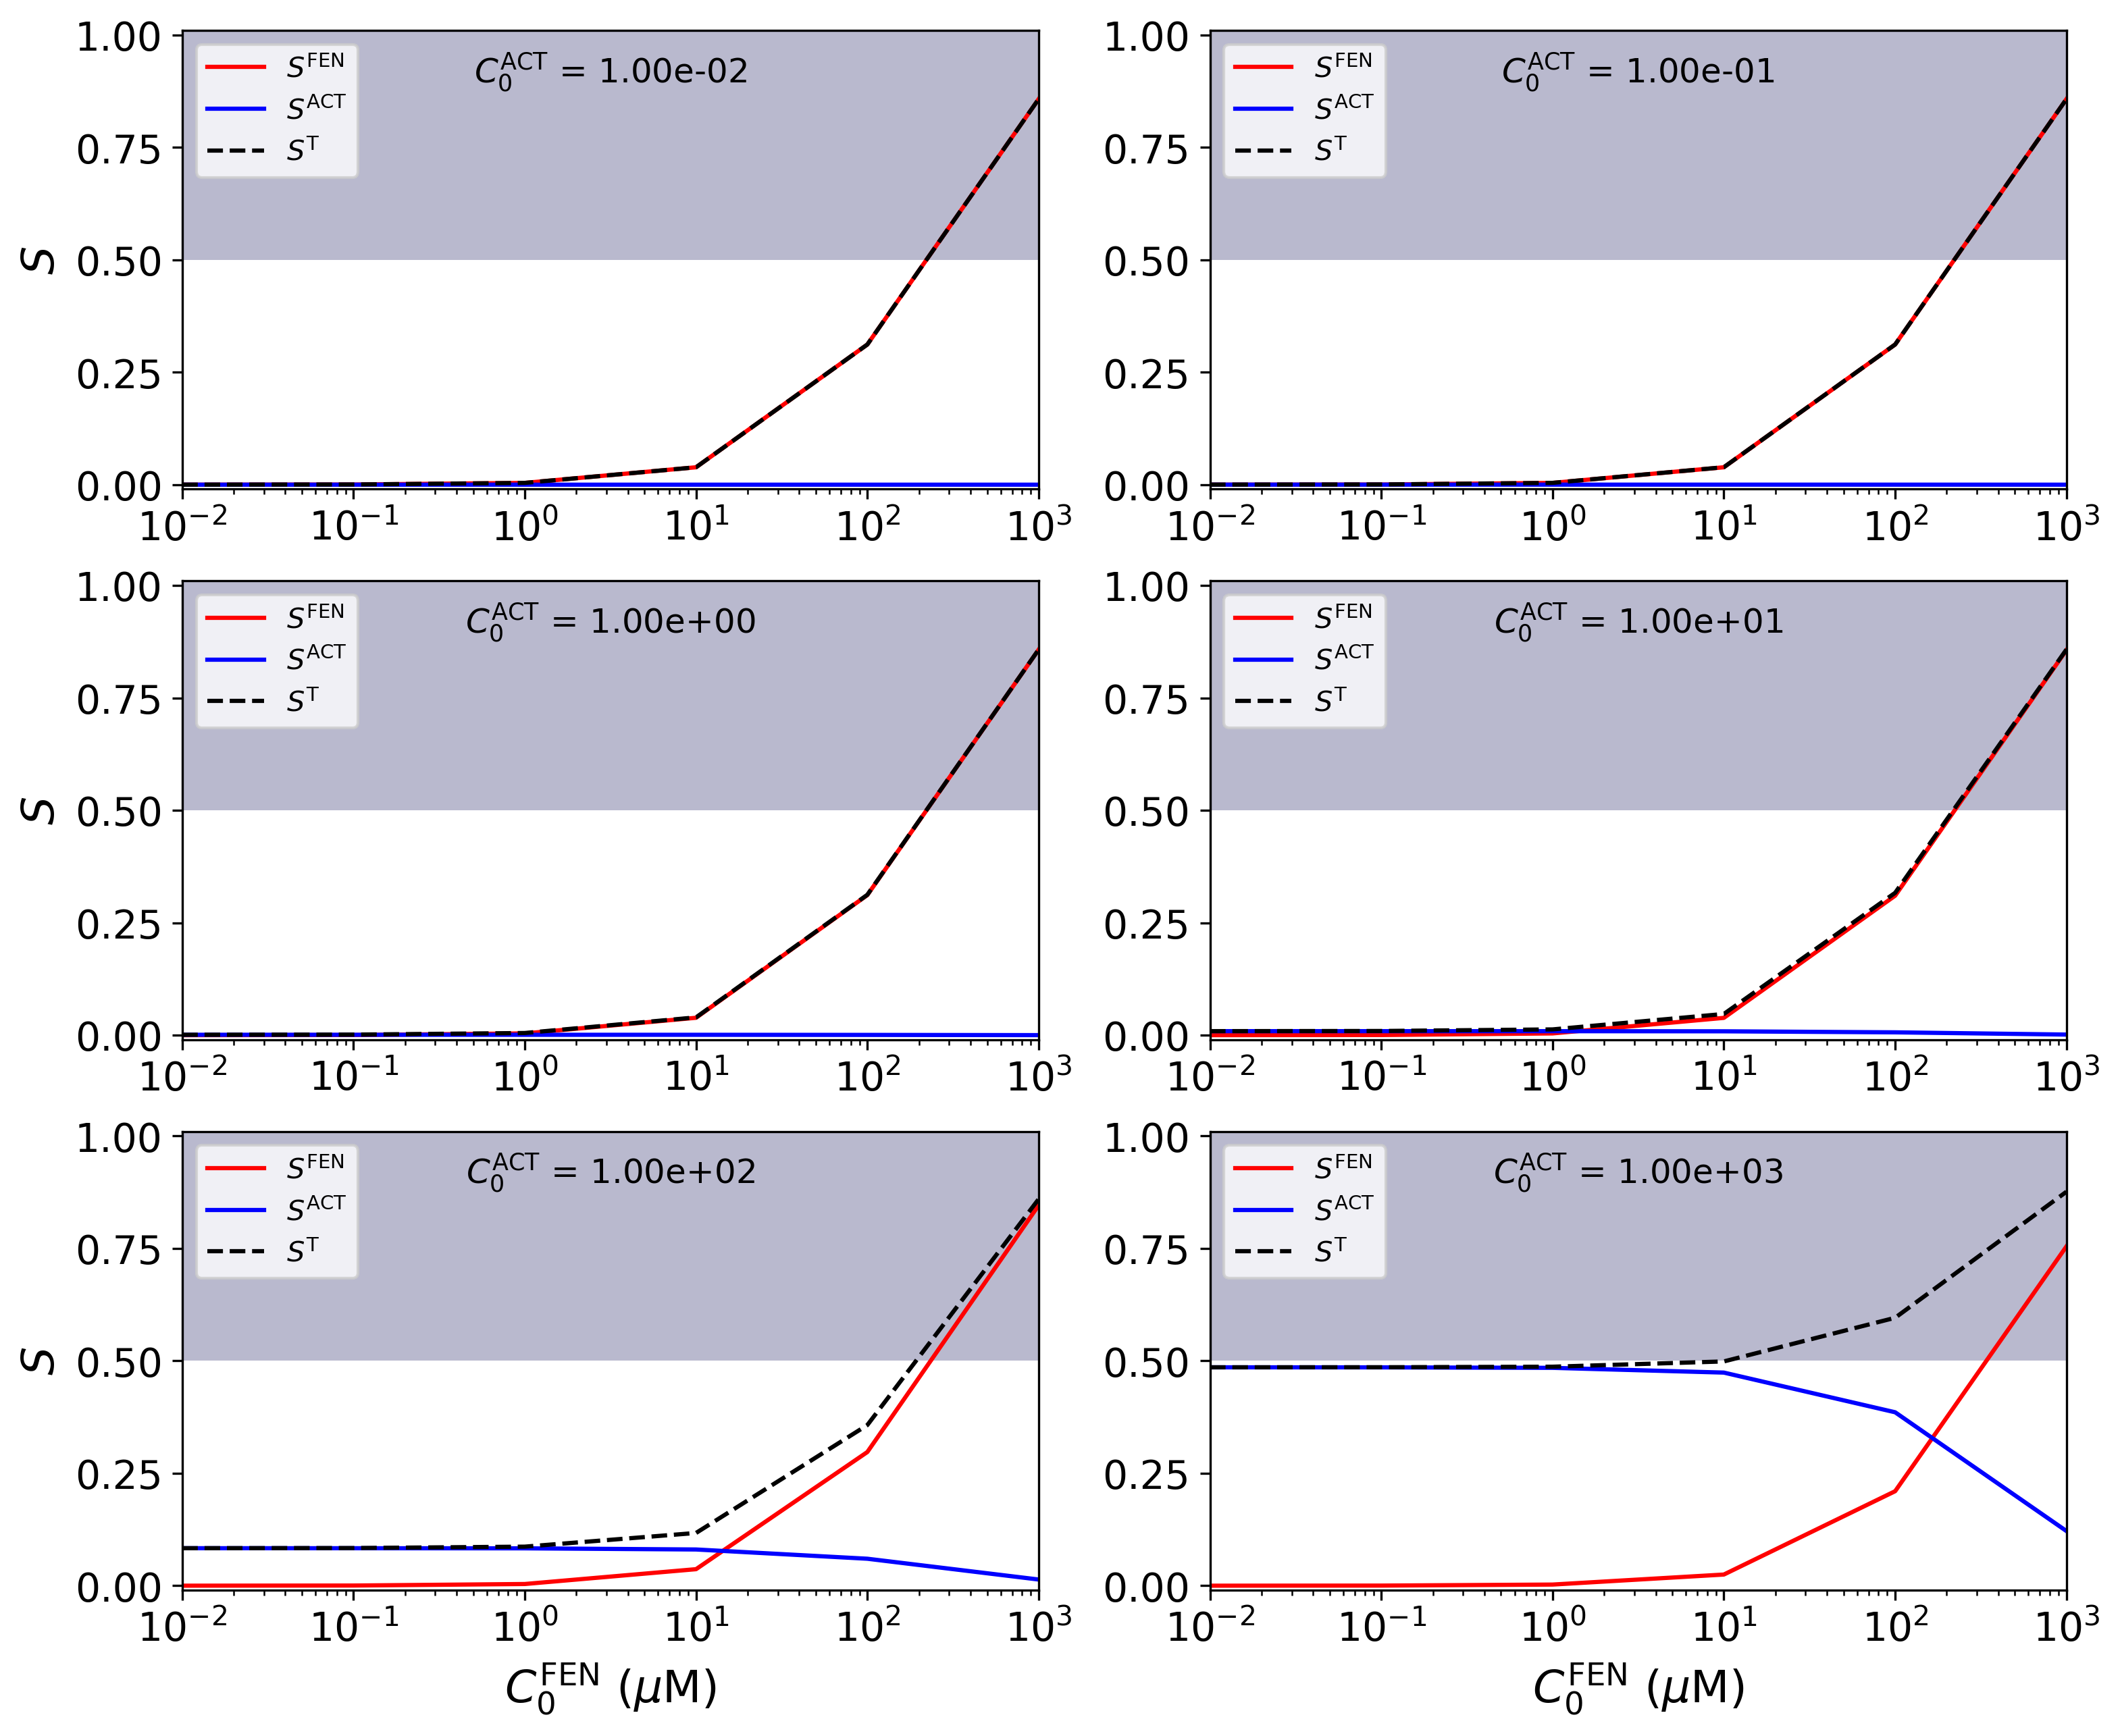

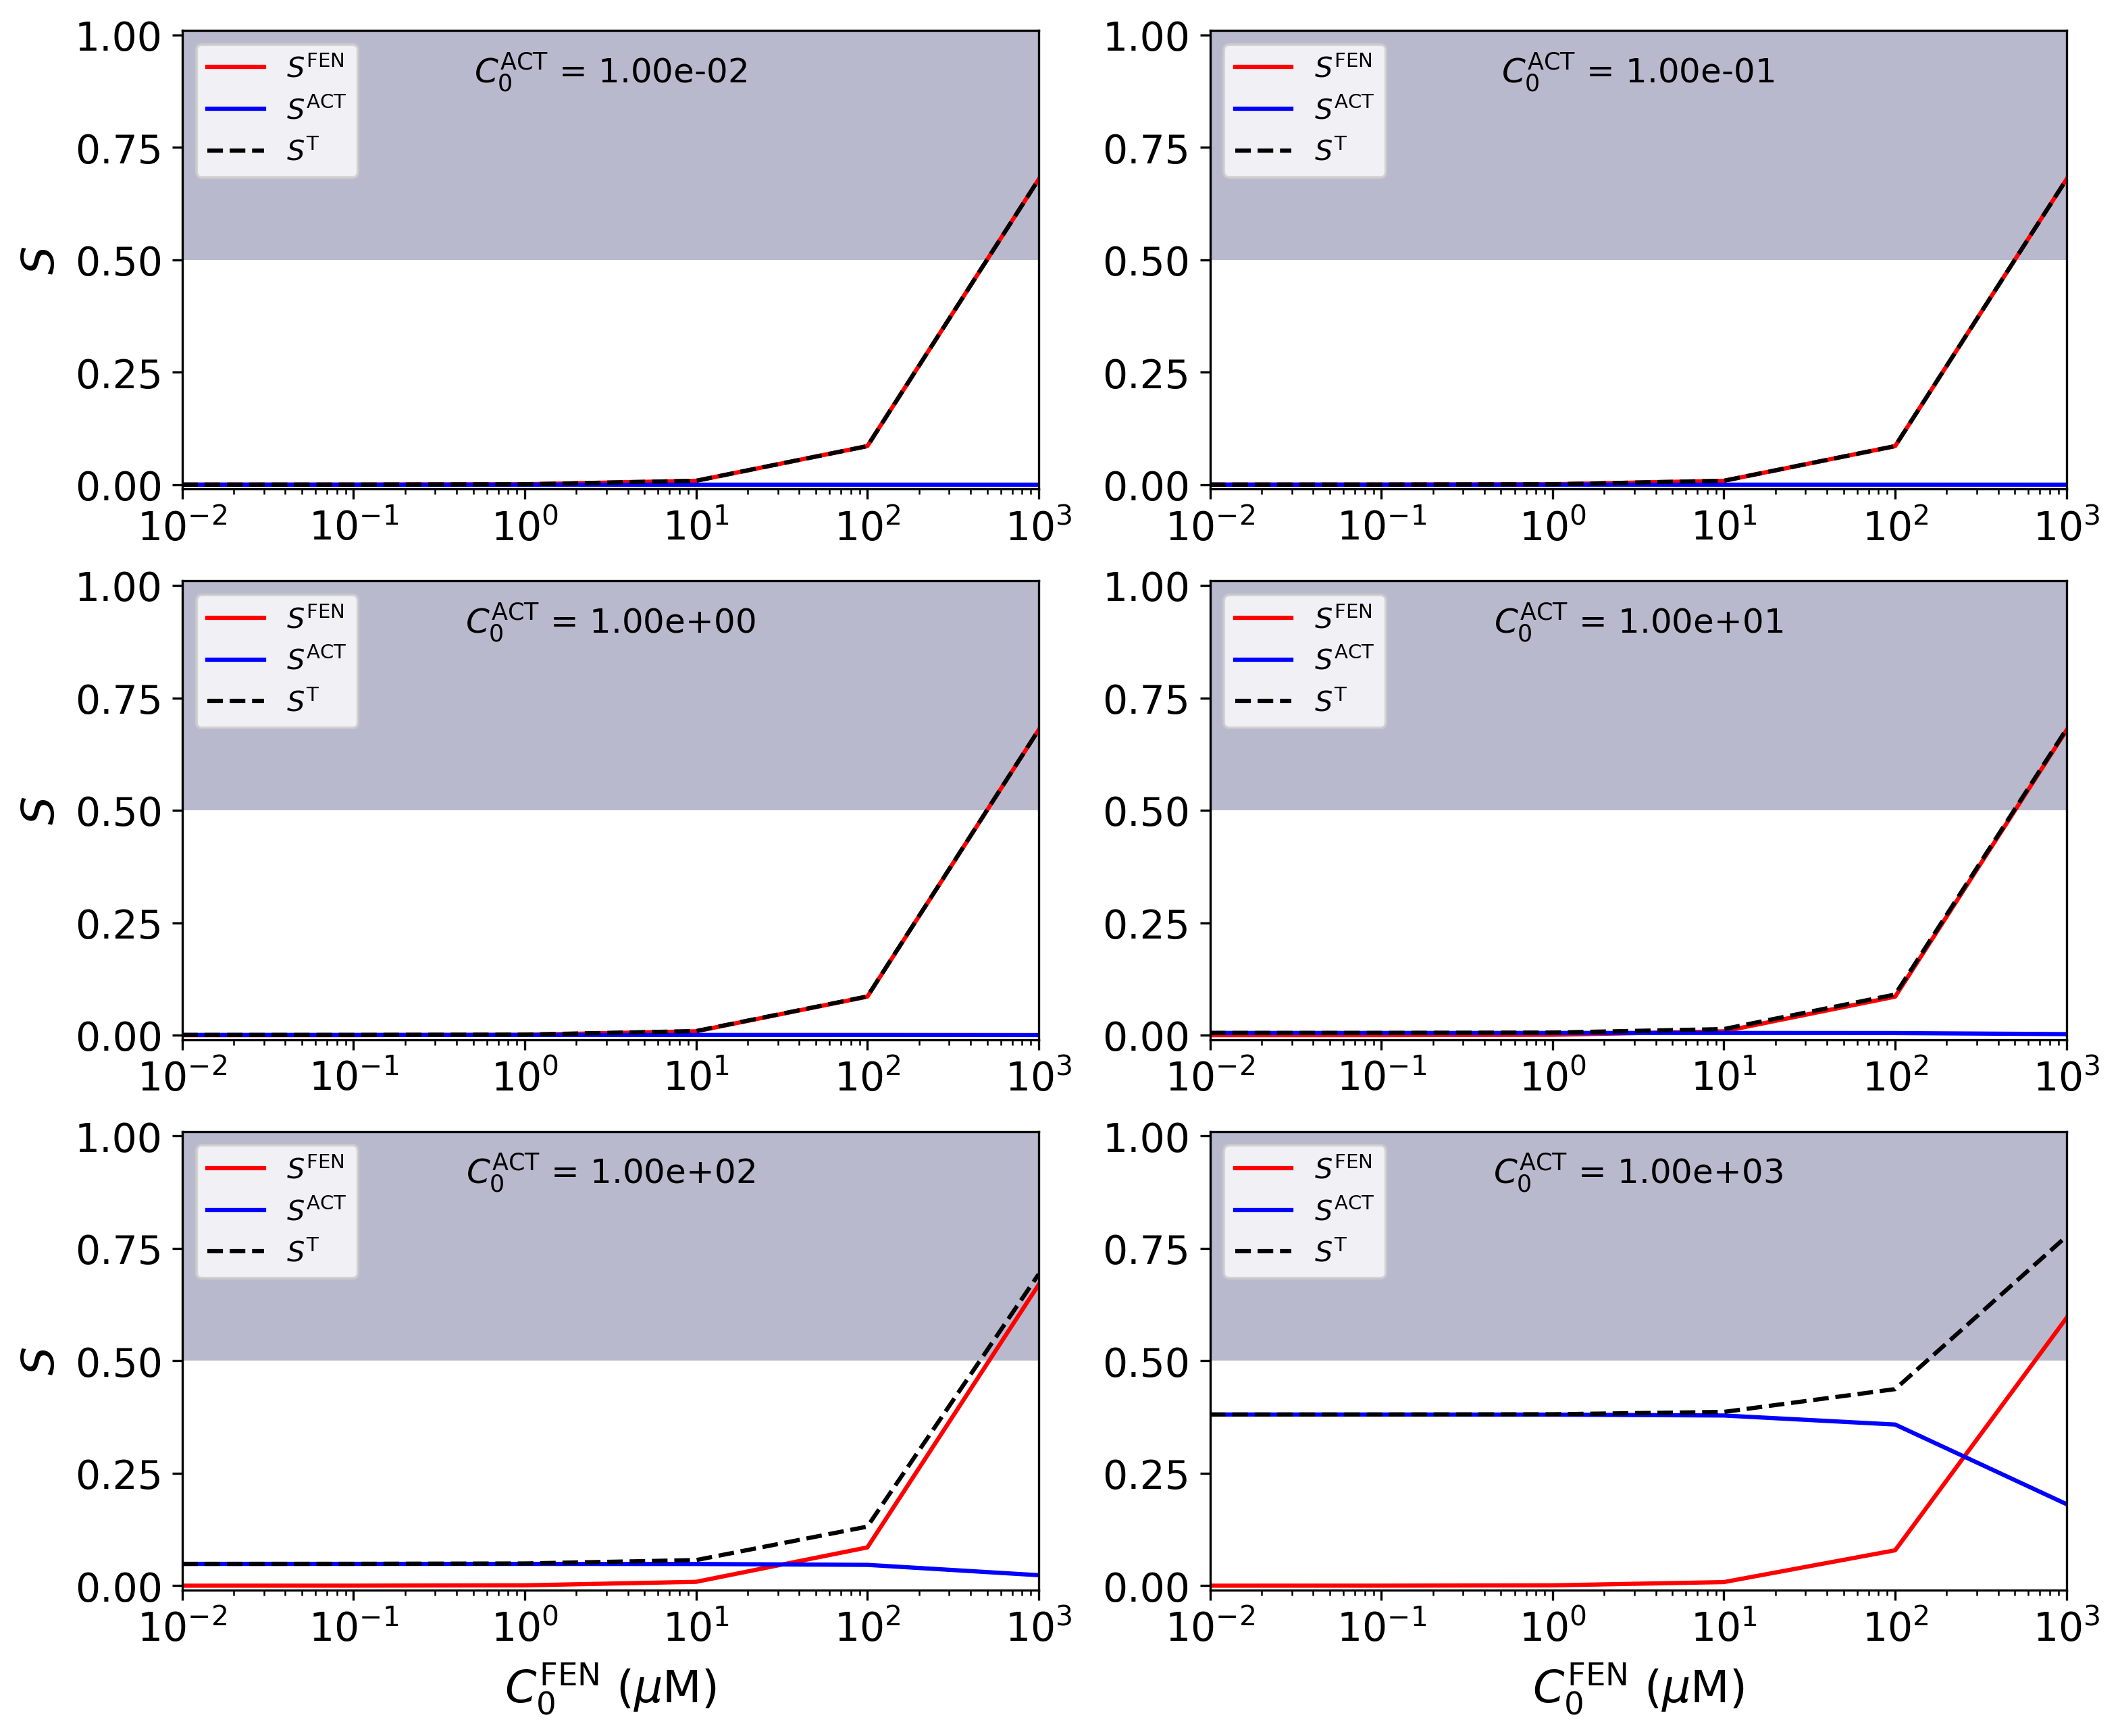

In [5]:
for C0_P in C0_P_range:
    fig, ax = plt.subplots(3, 2, dpi=300, figsize=(12, 10))
    axs = ax.flatten()

    axs[0].set_ylabel(r"$S$", fontsize=16)
    axs[2].set_ylabel(r"$S$", fontsize=16)
    axs[4].set_ylabel(r"$S$", fontsize=16)
    axs[4].set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)
    axs[5].set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)
    resA = resP[C0_P]
    for i, dataA in enumerate(resA.items()):
        C0_A, (valsSF, valsSA) = dataA
        #axs[i].grid(True, axis="both")
        axs[i].plot(C0_F_range, valsSF, "r", label=r"$S^{\text{FEN}}$")
        axs[i].plot(C0_F_range, valsSA, "b", label=r"$S^{\text{ACT}}$")
        axs[i].plot(C0_F_range, valsSF + valsSA, "k--", label=r"$S^{\text{T}}$")
        axs[i].set_xscale("log")
        axs[i].set_ylim(-0.01, 1.01)
        axs[i].set_xlim(1e-2, 1e3)
        axs[i].tick_params(axis="both", labelsize=14)
        axs[i].axvspan(1e-2, 1e3, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
        axs[i].set_title(r"$C_0^{\text{ACT}}$" + f" = {C0_A:.2e}", y=0.85)
        axs[i].legend(loc='upper left')
    plt.savefig(f"/Users/arminsh/Documents/fenHTVS-man/figs/S_C0P_{C0_P:.2e}.png")
    

In [6]:
def get_S(C0_P, C0_A, C0_F):
    C_P_fun = lambda x: x*(1 + C0_F/(Kd_F + x) + C0_A/(Kd_A + x)) - C0_P
    sol = root_scalar(C_P_fun, x0 = C0_P/2)
    C_P = sol.root
    C_A = C0_A/(1 + C_P/Kd_A)
    C_F = C0_F/(1 + C_P/Kd_F)
    C_PF = C0_F - C_F
    C_PA = C0_A - C_A
    S_A = C_PA/C0_P
    S_F = C_PF/C0_P
    S_T = S_A + S_F
    return S_F, S_A, S_T

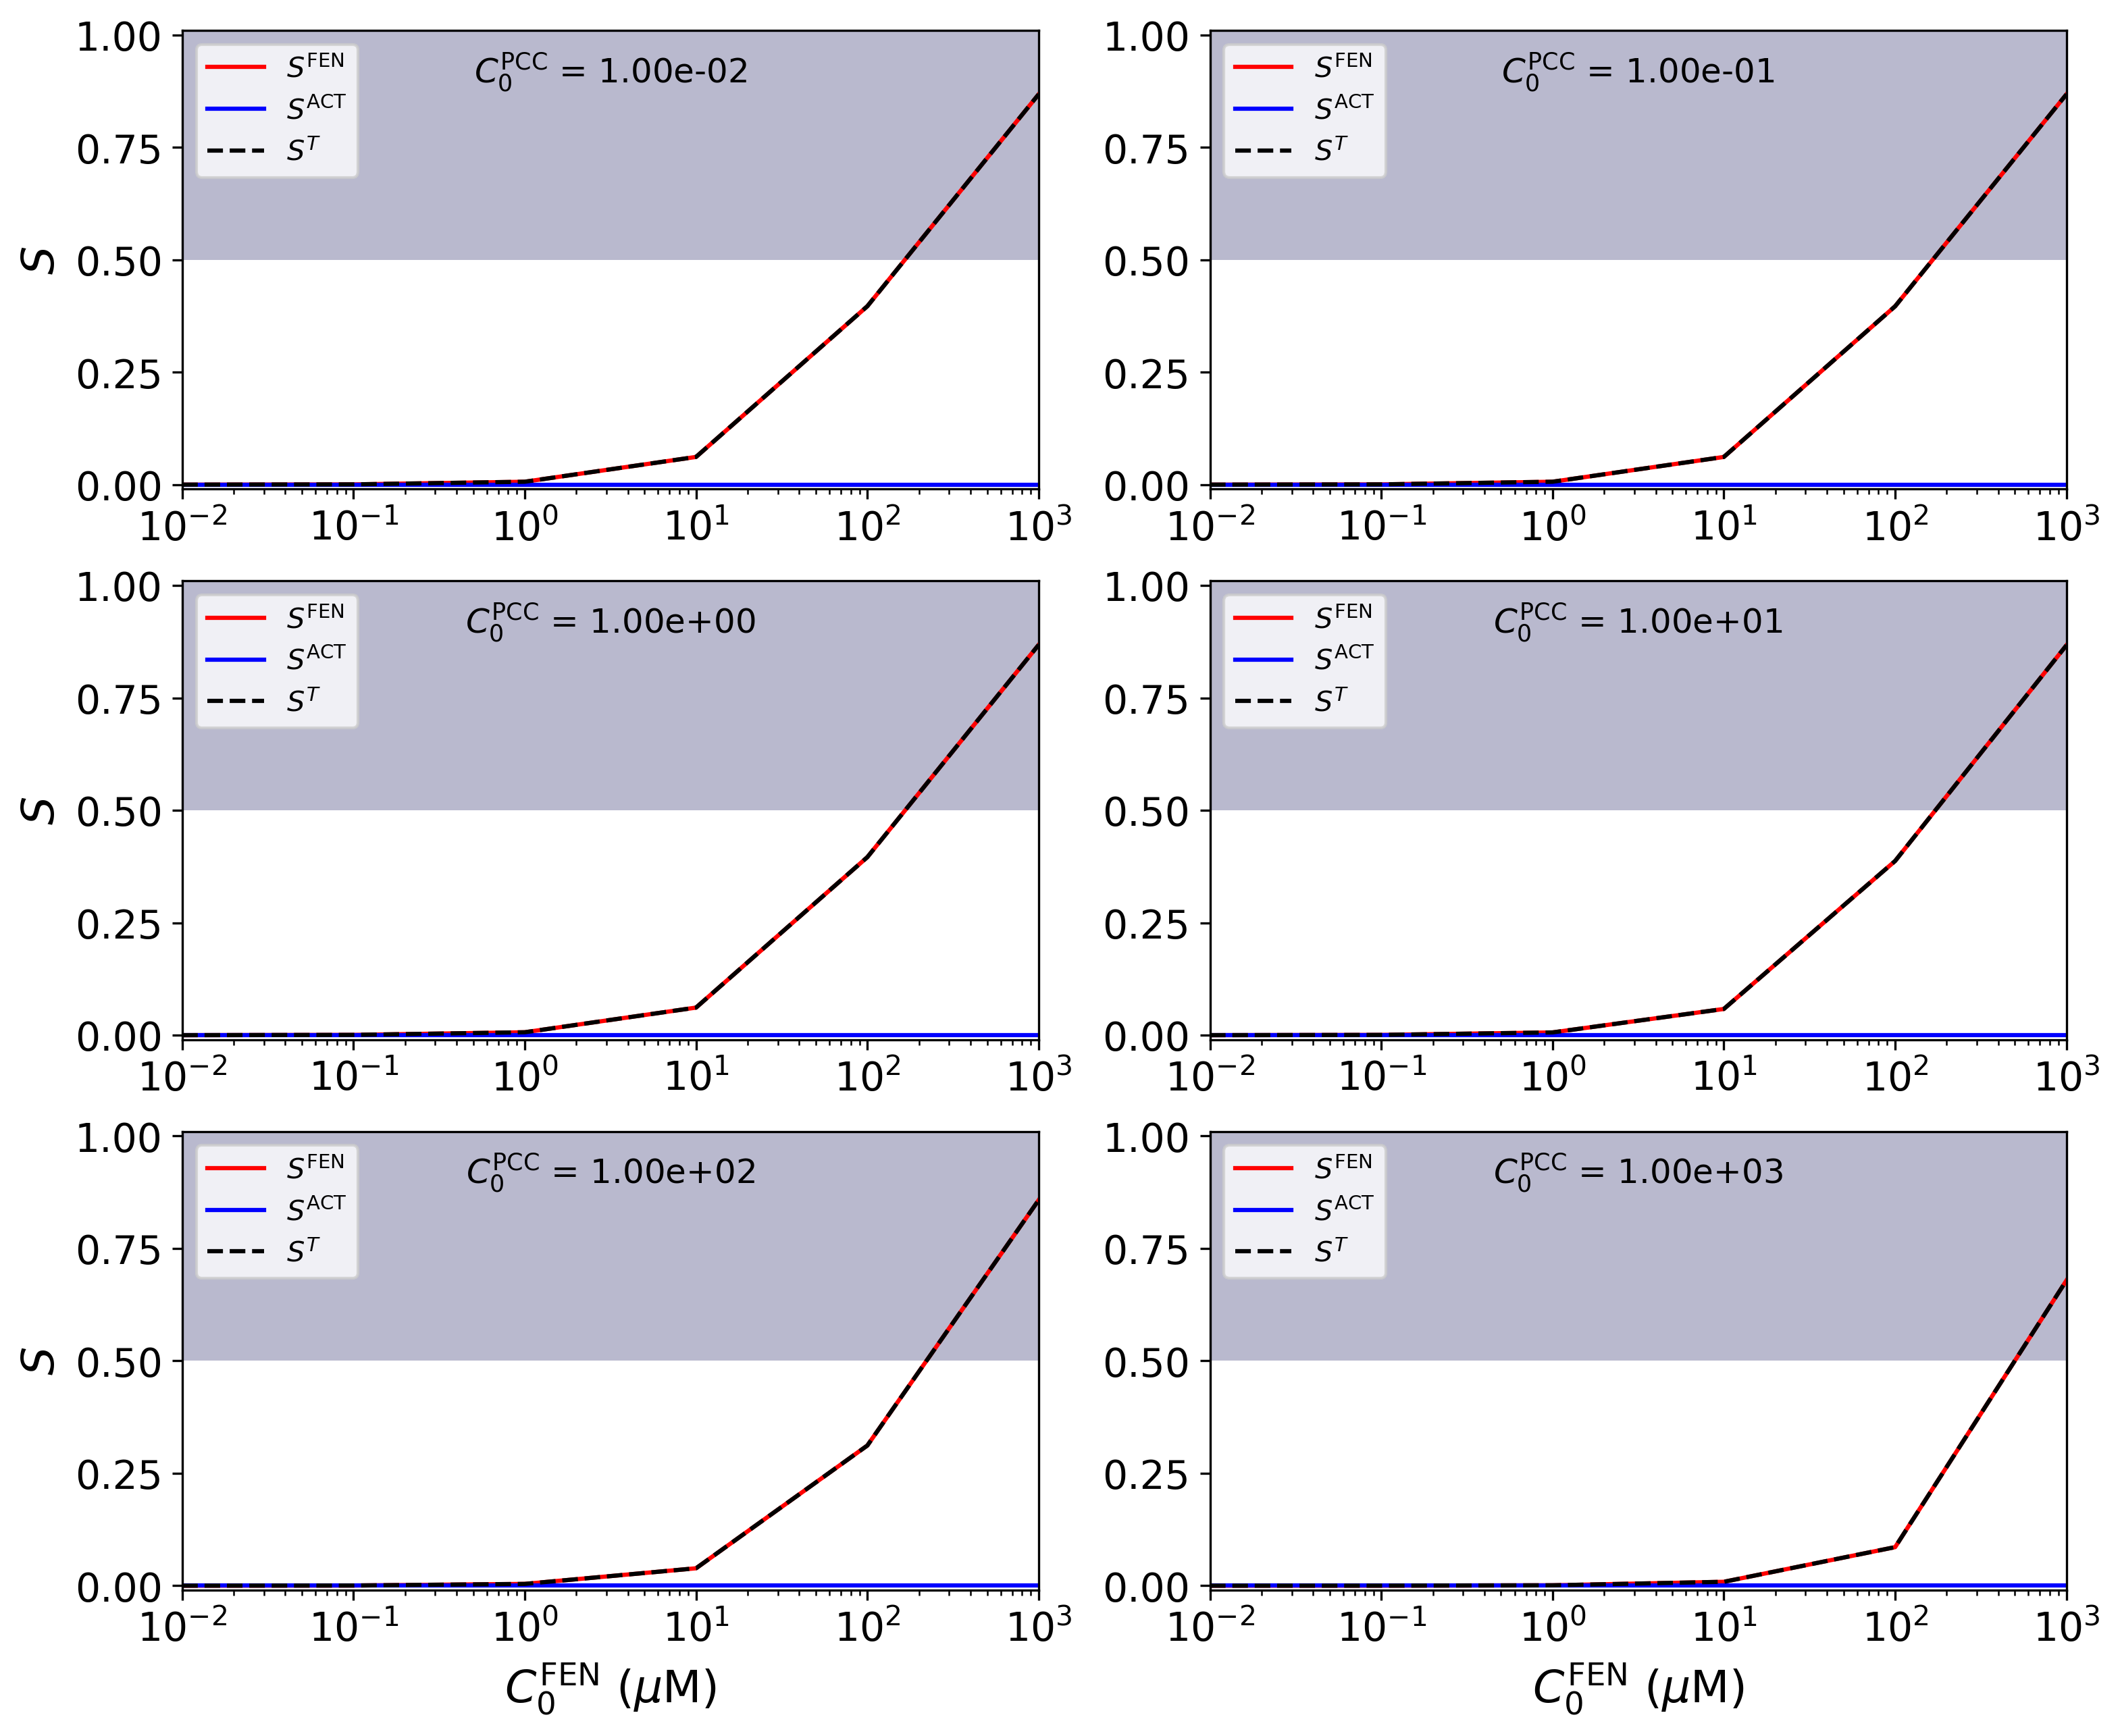

In [12]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(12, 10))
axs = ax.flatten()

axs[0].set_ylabel(r"$S$", fontsize=16)
axs[2].set_ylabel(r"$S$", fontsize=16)
axs[4].set_ylabel(r"$S$", fontsize=16)
axs[4].set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)
axs[5].set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)

# S vs. FEN 
C0_A = 0.0

C0_F_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM

for i, C0_P in enumerate(C0_P_range):
    S_vals = np.asarray([np.asarray(get_S(C0_P, C0_A, x)) for x in C0_F_range])
    axs[i].plot(C0_F_range, S_vals[:, 0], 'r', label=r"$S^{\text{FEN}}$")
    axs[i].plot(C0_F_range, S_vals[:, 1], 'b', label=r"$S^{\text{ACT}}$")
    axs[i].plot(C0_F_range, S_vals[:, 2], 'k--', label=r"$S^T$")
    axs[i].set_xscale("log")
    axs[i].set_ylim(-0.01, 1.01)
    axs[i].set_xlim(1e-2, 1e3)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].axvspan(1e-2, 1e3, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
    axs[i].set_title(r"$C_0^{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    axs[i].legend(loc='upper left')

    

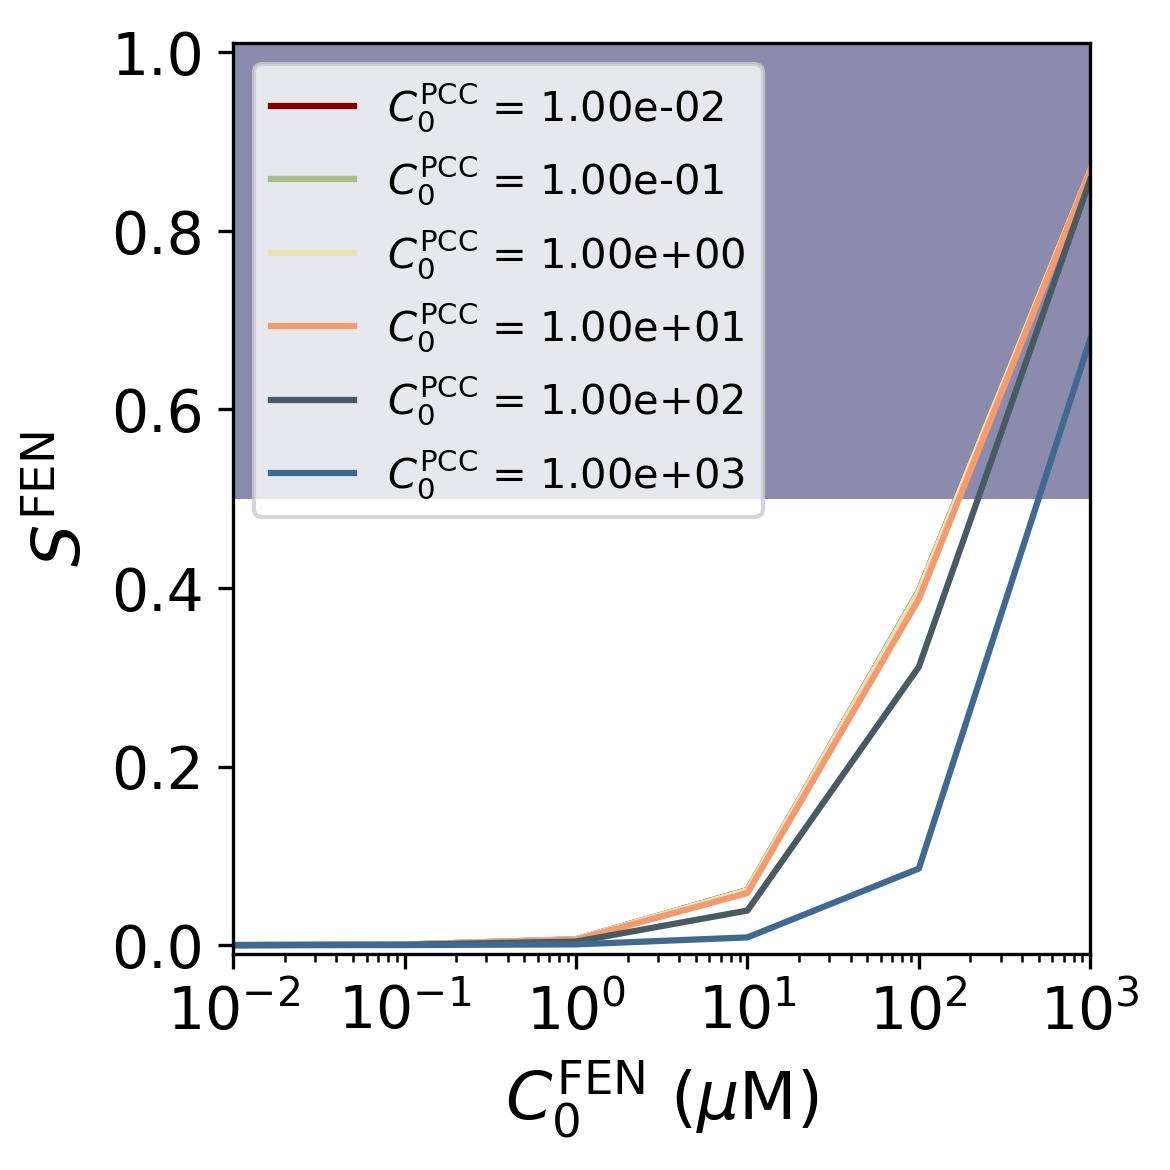

In [28]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4, 4))

ax.set_ylabel(r"$S^{\text{FEN}}$", fontsize=16)
ax.set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)


# S vs. FEN 
C0_A = 0.0

C0_F_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#3E6990']

for i, C0_P in enumerate(C0_P_range):
    S_vals = np.asarray([np.asarray(get_S(C0_P, C0_A, x)) for x in C0_F_range])
    ax.plot(C0_F_range, S_vals[:, 0], c=colors[i], label=r"$C_0^{\text{PCC}}$" + f" = {C0_P:.2e}")
    #axs[i].plot(C0_F_range, S_vals[:, 1], 'b', label=r"$S^{\text{ACT}}$")
    #axs[i].plot(C0_F_range, S_vals[:, 2], 'k--', label=r"$S^T$")
    ax.set_xscale("log")
    ax.set_ylim(-0.01, 1.01)
    ax.set_xlim(1e-2, 1e3)
    ax.tick_params(axis="both", labelsize=14)
    ax.axvspan(1e-2, 1e3, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f"/Users/arminsh/Documents/fenHTVS-man/figs/S_FEN.png")

    

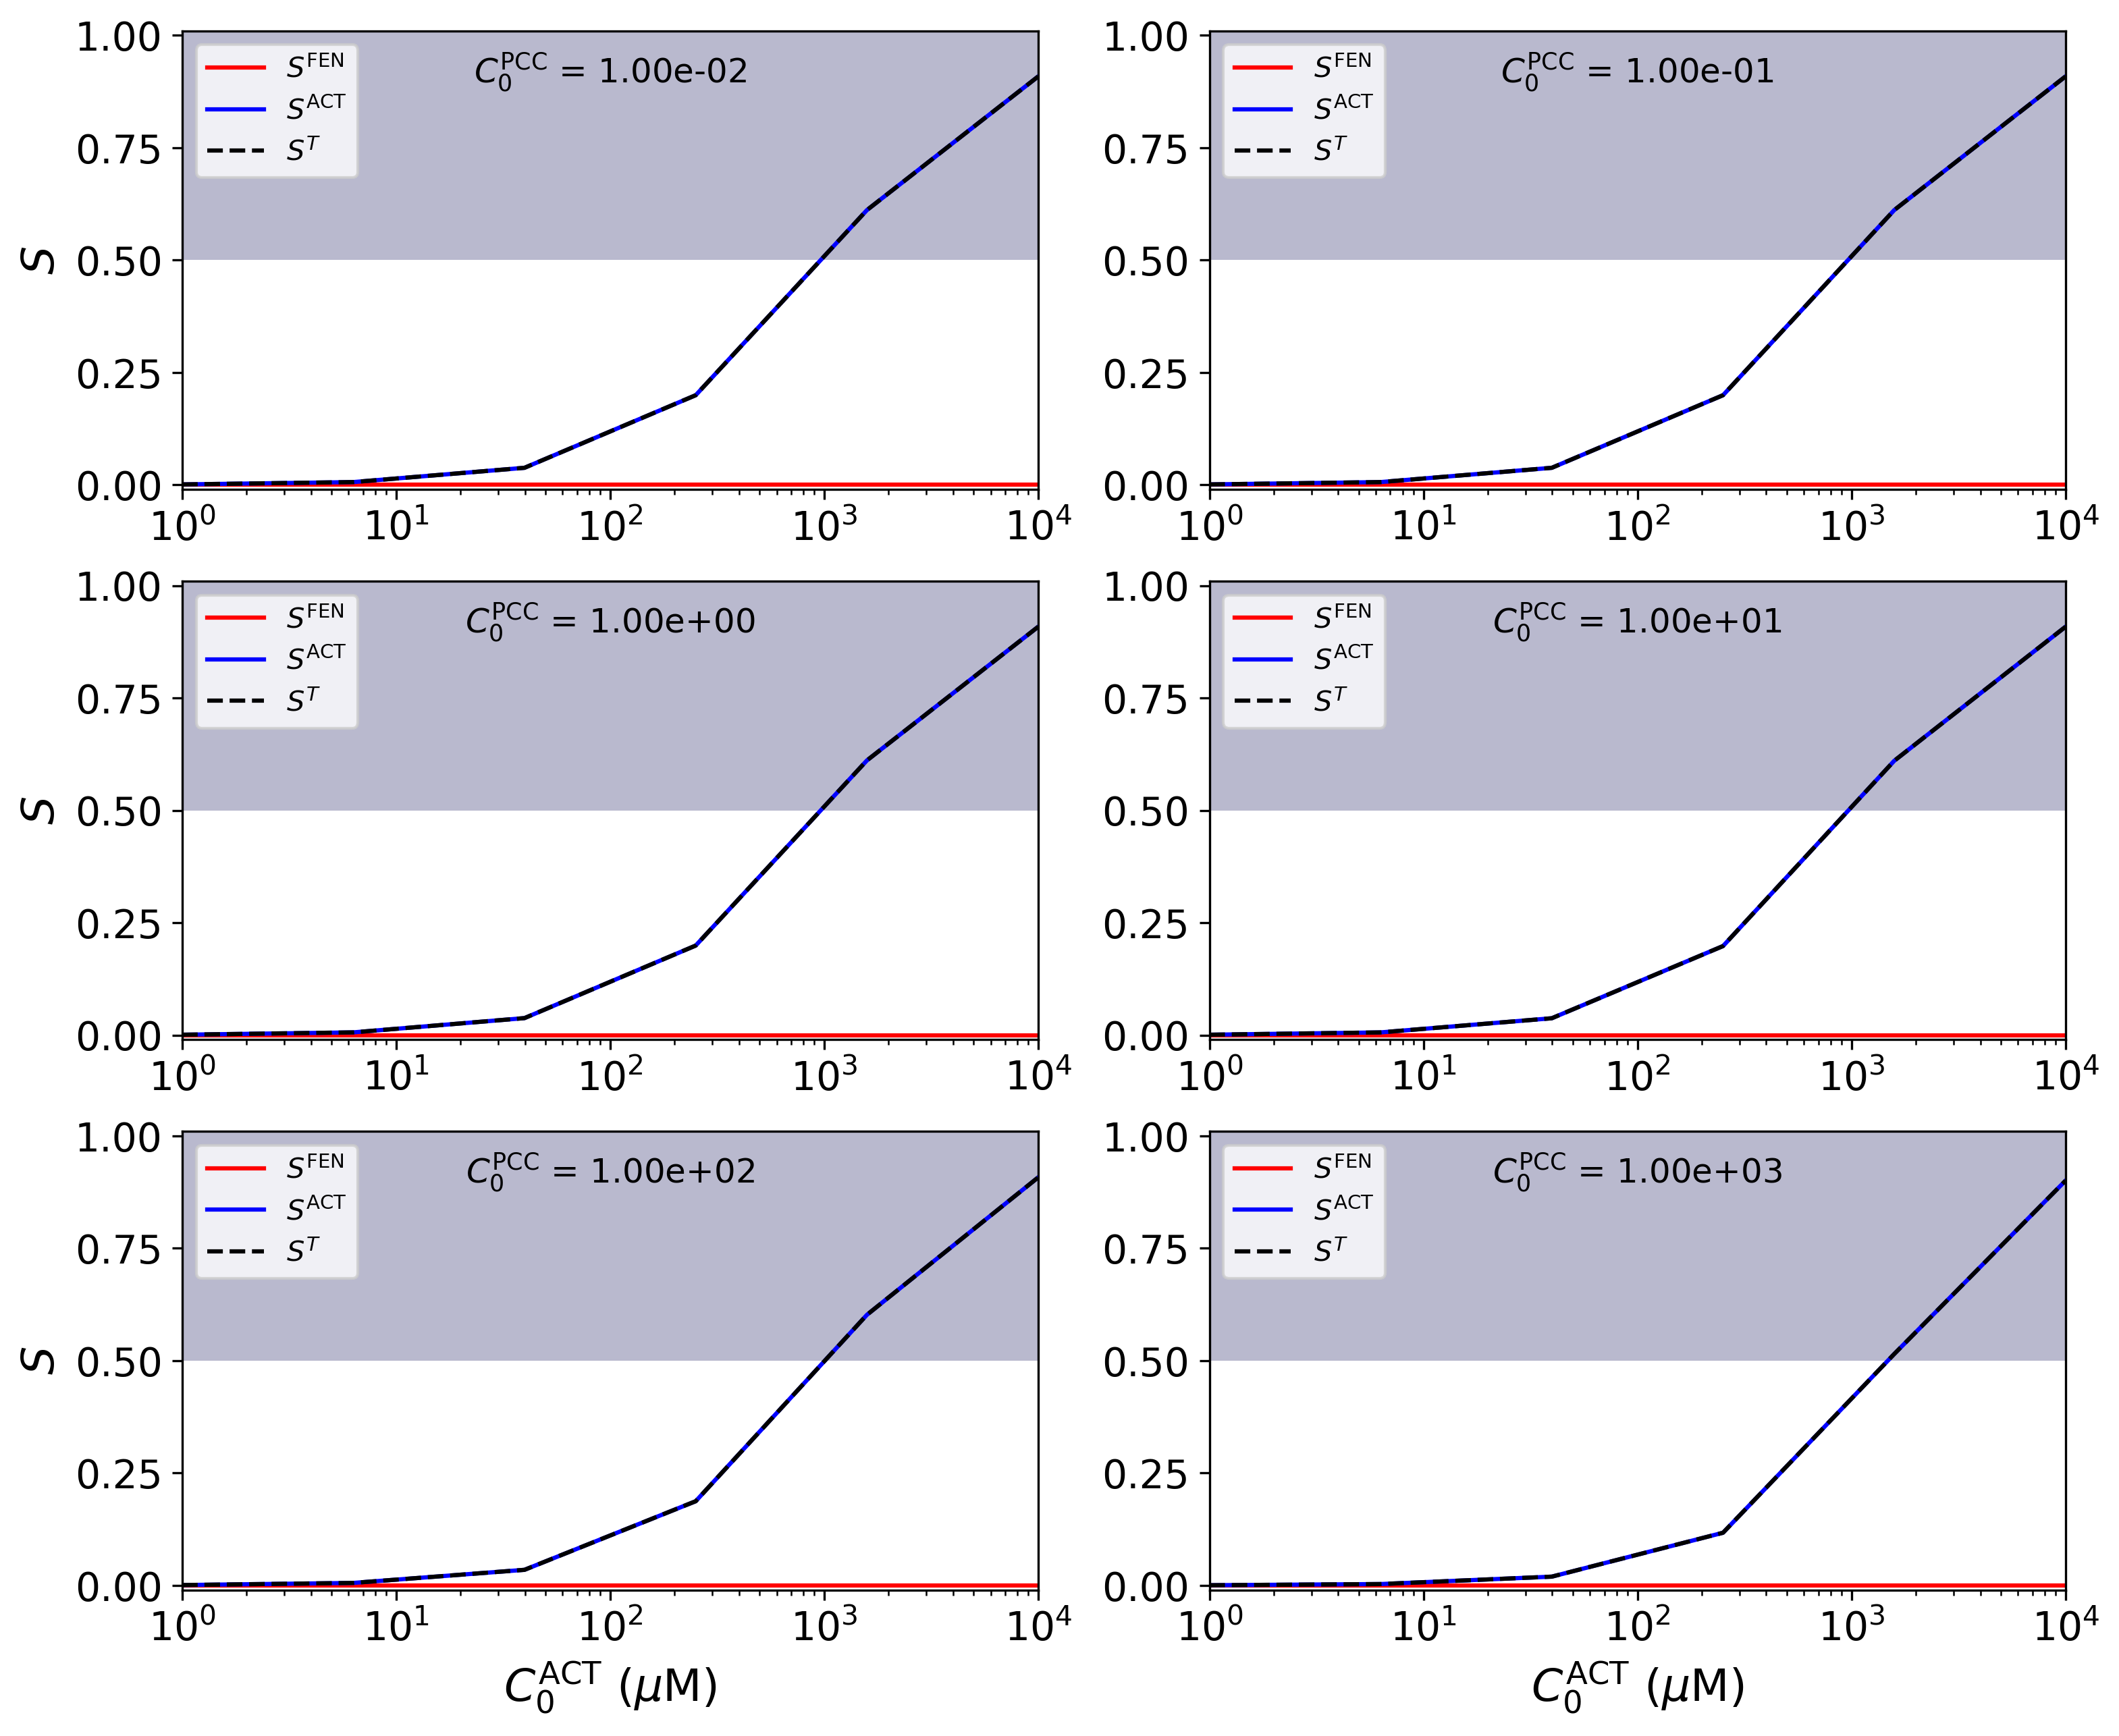

In [16]:
fig, ax = plt.subplots(3, 2, dpi=300, figsize=(12, 10))
axs = ax.flatten()

axs[0].set_ylabel(r"$S$", fontsize=16)
axs[2].set_ylabel(r"$S$", fontsize=16)
axs[4].set_ylabel(r"$S$", fontsize=16)
axs[4].set_xlabel(r"$C_0^{\text{ACT}}$ ($\mu$M)", fontsize=16)
axs[5].set_xlabel(r"$C_0^{\text{ACT}}$ ($\mu$M)", fontsize=16)

# S vs. ACT 
C0_F = 0.0

C0_A_range = np.logspace(0, 4, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM

for i, C0_P in enumerate(C0_P_range):
    S_vals = np.asarray([np.asarray(get_S(C0_P, x, C0_F)) for x in C0_A_range])
    axs[i].plot(C0_A_range, S_vals[:, 0], 'r', label=r"$S^{\text{FEN}}$")
    axs[i].plot(C0_A_range, S_vals[:, 1], 'b', label=r"$S^{\text{ACT}}$")
    axs[i].plot(C0_A_range, S_vals[:, 2], 'k--', label=r"$S^T$")
    axs[i].set_xscale("log")
    axs[i].set_ylim(-0.01, 1.01)
    axs[i].set_xlim(1e0, 1e4)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].axvspan(1e0, 1e4, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
    axs[i].set_title(r"$C_0^{\text{PCC}}$" + f" = {C0_P:.2e}", y=0.85)
    axs[i].legend(loc='upper left')

    

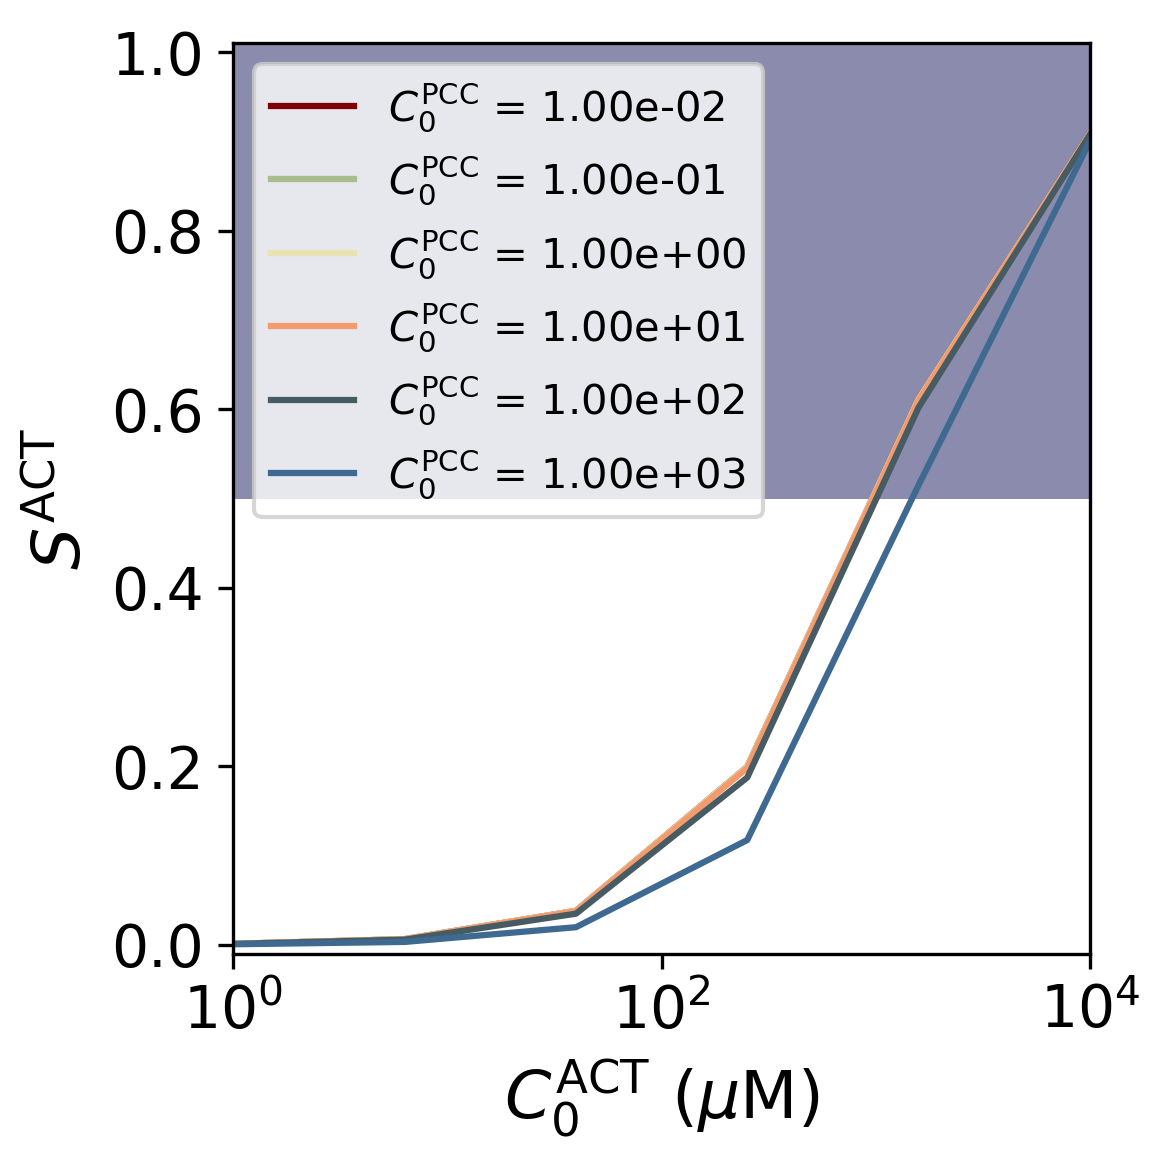

In [27]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4, 4))

ax.set_ylabel(r"$S^{\text{ACT}}$", fontsize=16)
ax.set_xlabel(r"$C_0^{\text{ACT}}$ ($\mu$M)", fontsize=16)


# S vs. ACT 
C0_F = 0.0

C0_A_range = np.logspace(0, 4, 6, dtype=np.longdouble) #muM
C0_P_range = np.logspace(-2, 3, 6, dtype=np.longdouble) #muM
colors = ["#800000", "#AABD8C", "#E9E3B4", "#F39B6D", "#475B63", '#3E6990']

for i, C0_P in enumerate(C0_P_range):
    S_vals = np.asarray([np.asarray(get_S(C0_P, x, C0_F)) for x in C0_A_range])
    ax.plot(C0_A_range, S_vals[:, 1], c=colors[i], label=r"$C_0^{\text{PCC}}$" + f" = {C0_P:.2e}")
    #axs[i].plot(C0_F_range, S_vals[:, 1], 'b', label=r"$S^{\text{ACT}}$")
    #axs[i].plot(C0_F_range, S_vals[:, 2], 'k--', label=r"$S^T$")
    ax.set_xscale("log")
    ax.set_ylim(-0.01, 1.01)
    ax.set_xlim(1e0, 1e4)
    ax.tick_params(axis="both", labelsize=14)
    ax.axvspan(1e0, 1e4, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
    ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(f"/Users/arminsh/Documents/fenHTVS-man/figs/S_ACT.png")

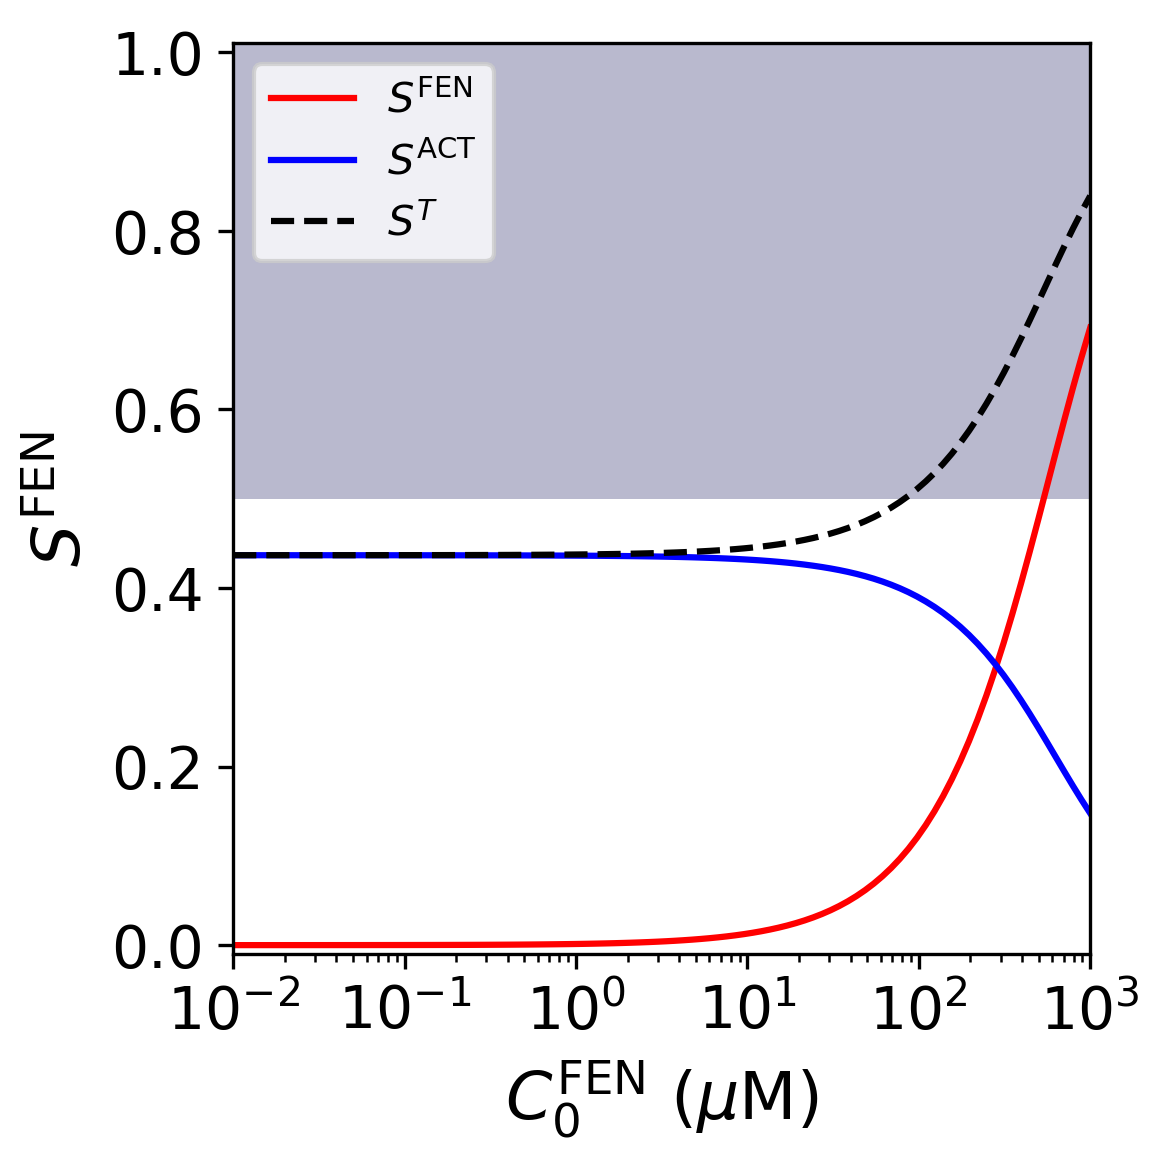

In [69]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4, 4))

ax.set_ylabel(r"$S^{\text{FEN}}$", fontsize=16)
ax.set_xlabel(r"$C_0^{\text{FEN}}$ ($\mu$M)", fontsize=16)


# S vs. FEN 
C0_A = 1e3
C0_P = 5e2

C0_F_range = np.logspace(-2, 3, 100, dtype=np.longdouble) #muM

S_vals = np.asarray([np.asarray(get_S(C0_P, C0_A, x)) for x in C0_F_range])
ax.plot(C0_F_range, S_vals[:, 0], 'r', label=r"$S^{\text{FEN}}$")
ax.plot(C0_F_range, S_vals[:, 1], 'b', label=r"$S^{\text{ACT}}$")
ax.plot(C0_F_range, S_vals[:, 2], 'k--', label=r"$S^{T}$")
ax.set_xscale("log")
ax.set_ylim(-0.01, 1.01)
ax.set_xlim(1e-2, 1e3)
ax.tick_params(axis="both", labelsize=14)
ax.axvspan(1e-2, 1e3, 0.5, 1.0, facecolor='#8B8BAE', alpha=0.6)
ax.legend(loc='upper left')

plt.tight_layout()
#plt.savefig(f"/Users/arminsh/Documents/fenHTVS-man/figs/S_FEN.png")

    